In [31]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [32]:
 #Optional if you are using a GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [33]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')# movenet and multipose
movenet = model.signatures['serving_default']# setting variable


In [34]:
from cv2 import VideoCapture
from cv2 import waitKey

In [ ]:
import cv2

import sys


cpt=0

vidStream=cv2.VideoCapture(0)
while True:
    ret,frame=vidStream.read()

    cv2.imshow("test frame",frame)
    cv2.imwrite(r"C:\v_data\train.jpg"%cpt,frame)
    cpt +=1

    if cv2.waitKey(10)==ord('q'):
        break

In [36]:
cap = cv2.VideoCapture(0)

while True:
      ret, frame = cap.read() #returns ret and the frame
      cv2.imshow('frame',frame)

      if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
#Lorsque j'utilise cv2.waitKey(1),je reçois un flux vidéo en direct continu de la webcam de mon ordinateur portable. 
#Cependant, lorsque j'utilise cv2.waitKey(0), j'obtiens des images fixes. Chaque fois que je ferme la fenêtre, une autre apparaît avec une autre photo prise à l'époque. Pourquoi ne s'affiche-t-il pas en continu ?


In [37]:
cap = cv2.VideoCapture(0)# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):  # to exit the frame
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [38]:
frame

array([[[ 85,  82,  96],
        [ 83,  80,  90],
        [ 83,  82,  86],
        ...,
        [ 30,  13,  18],
        [ 30,  13,  17],
        [ 31,  14,  18]],

       [[ 85,  83,  92],
        [ 84,  82,  88],
        [ 84,  83,  86],
        ...,
        [ 33,  16,  24],
        [ 35,  17,  25],
        [ 35,  17,  25]],

       [[ 85,  83,  92],
        [ 83,  81,  87],
        [ 83,  82,  84],
        ...,
        [ 30,  21,  23],
        [ 31,  21,  22],
        [ 31,  21,  22]],

       ...,

       [[ 32,  30,  30],
        [ 44,  42,  42],
        [ 62,  59,  59],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [141, 141, 141]],

       [[ 37,  33,  31],
        [ 52,  48,  47],
        [ 73,  68,  69],
        ...,
        [131, 130, 126],
        [134, 132, 130],
        [138, 136, 135]],

       [[ 46,  31,  39],
        [ 53,  45,  49],
        [ 62,  62,  62],
        ...,
        [130, 130, 121],
        [134, 133, 124],
        [138, 138, 129]]

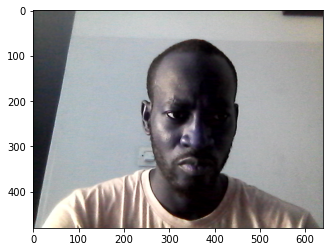

In [39]:
plt.imshow(frame)

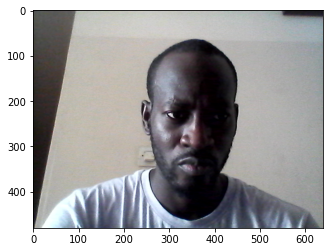

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [41]:
cap = cv2.VideoCapture(0)

while True:
      ret, frame = cap.read() #returns ret and the frame
       # Resize image
      img = frame.copy()
      img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256, 256)
      input_img = tf.cast(img, dtype=tf.int32)
      # Detection section
      results = movenet(input_img)
      print(results)  
      cv2.imshow('frame',frame)

      if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.72173059e-01,  5.87740064e-01,  5.21629810e-01,
          4.98071700e-01,  6.49725318e-01,  5.05437374e-01,
          4.87621933e-01,  5.13720274e-01,  7.55364656e-01,
          5.13976812e-01,  7.01133609e-01,  5.54754138e-01,
          5.00854135e-01,  4.01044309e-01,  6.76679850e-01,
          8.46939743e-01,  9.01857138e-01,  2.97983259e-01,
          7.90120900e-01,  1.94397211e-01,  7.30244756e-01,
          8.69321048e-01,  9.22861218e-01,  1.04200710e-02,
          8.61460865e-01,  1.46822706e-01,  8.14652815e-03,
          8.51706326e-01,  7.52256751e-01,  3.31337564e-02,
          7.92831302e-01,  3.14928025e-01,  1.58275422e-02,
          8.85356367e-01,  6.83333993e-01,  8.86217492e-07,
          8.62872481e-01,  3.25269043e-01,  1.91787399e-06,
          8.27617407e-01,  8.84028375e-01,  9.20755975e-03,
          8.06911051e-01,  3.99051815e-01,  1.20812869e-02,
          3.93324018e-01,  6.943402

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.73824644e-01,  5.65477431e-01,  6.00185752e-01,
          4.97900277e-01,  6.40521944e-01,  4.73929614e-01,
          4.88215625e-01,  4.99608129e-01,  7.69775510e-01,
          5.18280327e-01,  6.97173417e-01,  6.53393447e-01,
          5.00731409e-01,  3.89873505e-01,  7.16295779e-01,
          8.43924880e-01,  8.77577186e-01,  3.05962861e-01,
          8.06413949e-01,  1.74927518e-01,  6.21656120e-01,
          8.68202329e-01,  9.28278029e-01,  7.63001814e-02,
          8.77423406e-01,  7.10285157e-02,  2.37607933e-03,
          8.52657855e-01,  7.58448005e-01,  3.82989421e-02,
          8.17543268e-01,  2.23214358e-01,  2.14939937e-02,
          8.87711644e-01,  6.40680492e-01,  3.82982253e-05,
          8.66225660e-01,  3.22852105e-01,  1.12594734e-09,
          8.29169989e-01,  8.65182042e-01,  9.21352208e-03,
          7.58833289e-01,  3.35645139e-01,  1.15484465e-02,
          4.20635164e-01,  6.429992

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.7595628e-01,  5.6705791e-01,  5.5495185e-01,  5.0263697e-01,
          6.3359660e-01,  5.1172042e-01,  4.9030334e-01,  4.9934107e-01,
          6.8866903e-01,  5.1999664e-01,  6.9892788e-01,  6.6370630e-01,
          4.9878290e-01,  3.8853624e-01,  6.1653048e-01,  8.4857851e-01,
          9.0101451e-01,  2.6744056e-01,  8.0802274e-01,  1.8536244e-01,
          6.2861598e-01,  8.6795908e-01,  9.2668700e-01,  3.1835407e-02,
          8.7771237e-01,  7.2178513e-02,  1.8149765e-03,  8.4748656e-01,
          7.5654024e-01,  3.6825836e-02,  8.1625998e-01,  1.8176195e-01,
          1.8607065e-02,  8.8502288e-01,  6.4596051e-01,  1.3018199e-07,
          8.6597425e-01,  3.2727516e-01,  6.0961930e-11,  8.3553231e-01,
          8.6706674e-01,  6.5975189e-03,  7.9059130e-01,  3.3822978e-01,
          8.8001220e-03,  4.2016208e-01,  6.2976086e-01,  2.4698535e-04,
          4.5285296e-01,  4.2786509e-01,  1.3733951e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.76128423e-01,  5.66173851e-01,  5.35679758e-01,
          5.02234578e-01,  6.33497536e-01,  4.36416864e-01,
          4.89923537e-01,  4.97973323e-01,  6.54277802e-01,
          5.18369973e-01,  6.96489096e-01,  6.71862483e-01,
          4.85223055e-01,  3.89142931e-01,  5.87506950e-01,
          8.46518517e-01,  8.80392551e-01,  2.44909793e-01,
          8.10934007e-01,  1.76536843e-01,  6.23717606e-01,
          8.68303955e-01,  9.25854862e-01,  2.35700980e-02,
          8.76235545e-01,  7.30775967e-02,  1.43575936e-03,
          8.48661005e-01,  7.58859932e-01,  4.17673960e-02,
          8.40193629e-01,  1.39274985e-01,  2.39310898e-02,
          8.87148201e-01,  6.47273540e-01,  3.61408615e-06,
          8.65872324e-01,  3.28365803e-01,  2.49687160e-10,
          8.36497605e-01,  8.82456899e-01,  9.59816948e-03,
          7.70233870e-01,  3.19089174e-01,  6.45044586e-03,
          4.21021134e-01,  6.284310

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.72712541e-01,  5.50727785e-01,  5.26817203e-01,
          4.94782239e-01,  6.24497414e-01,  4.25696164e-01,
          4.84938323e-01,  4.88011569e-01,  6.91009641e-01,
          5.21985292e-01,  6.94613814e-01,  7.13539302e-01,
          4.87774700e-01,  3.90495002e-01,  5.84172964e-01,
          8.53801370e-01,  8.98805976e-01,  3.70113999e-01,
          8.06099296e-01,  1.83338851e-01,  5.65560937e-01,
          8.69151235e-01,  9.26717103e-01,  6.22856542e-02,
          8.77476692e-01,  7.02350065e-02,  9.00701503e-04,
          8.32762778e-01,  7.45559275e-01,  3.12480722e-02,
          8.30390811e-01,  1.38926804e-01,  2.32974831e-02,
          8.85481000e-01,  6.46919429e-01,  1.53168348e-05,
          8.62604022e-01,  3.27119440e-01,  1.89591273e-10,
          8.36365163e-01,  8.51612985e-01,  5.06426161e-03,
          7.88069129e-01,  3.36852700e-01,  4.64913761e-03,
          4.08479452e-01,  6.192908

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.77714860e-01, 5.26236296e-01, 6.65973306e-01, 4.98917550e-01,
         6.08019650e-01, 4.18494970e-01, 4.88669485e-01, 4.64632630e-01,
         7.39004016e-01, 5.17762244e-01, 6.94650948e-01, 6.71382308e-01,
         4.86066729e-01, 3.87552112e-01, 5.79093814e-01, 8.53302300e-01,
         9.07799780e-01, 3.72939825e-01, 8.04695964e-01, 1.81484789e-01,
         6.23856723e-01, 8.71560991e-01, 9.39484775e-01, 3.05860788e-02,
         8.75450313e-01, 7.38213137e-02, 3.25125642e-03, 8.44484329e-01,
         7.42121577e-01, 3.83349881e-02, 8.31565440e-01, 1.83425322e-01,
         2.35991646e-02, 8.85958970e-01, 6.72703803e-01, 1.41261205e-06,
         8.60688925e-01, 3.26767802e-01, 1.30545999e-07, 8.41471553e-01,
         6.78065717e-01, 1.83995266e-03, 8.33066881e-01, 2.44083539e-01,
         1.90466340e-03, 3.35431635e-01, 5.66208601e-01, 2.77328130e-04,
         4.54419881e-01, 3.98863316e-01, 1.97992218e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.67263007e-01,  5.67191422e-01,  6.04312837e-01,
          4.95716959e-01,  6.37452185e-01,  5.40820420e-01,
          4.84300882e-01,  5.01237333e-01,  7.75286198e-01,
          5.20918310e-01,  6.95788383e-01,  7.43664801e-01,
          4.98245090e-01,  3.89357775e-01,  6.09291792e-01,
          8.52697492e-01,  8.98167431e-01,  2.69055396e-01,
          8.10862482e-01,  1.76883250e-01,  5.80456257e-01,
          8.70970964e-01,  9.24627602e-01,  4.26882133e-02,
          8.78184378e-01,  7.29146376e-02,  9.24271182e-04,
          8.51681769e-01,  7.55507708e-01,  4.24833857e-02,
          8.25904250e-01,  1.85119808e-01,  2.52623726e-02,
          8.88397098e-01,  6.45627856e-01,  1.95586854e-05,
          8.64344418e-01,  3.24678898e-01,  3.21878135e-10,
          8.36941302e-01,  8.80343974e-01,  1.26859928e-02,
          7.76830912e-01,  3.36233824e-01,  1.12860436e-02,
          4.10693526e-01,  6.328223

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.68582416e-01,  5.73224366e-01,  6.18300736e-01,
          4.99191701e-01,  6.38311386e-01,  4.51868534e-01,
          4.89041239e-01,  5.06953120e-01,  7.46333659e-01,
          5.28272331e-01,  6.92442834e-01,  5.92969000e-01,
          4.93329793e-01,  3.94136995e-01,  6.39916956e-01,
          8.45618188e-01,  8.74573350e-01,  2.62706310e-01,
          8.04721296e-01,  1.83229089e-01,  6.30978942e-01,
          8.71853769e-01,  9.28027093e-01,  6.78136349e-02,
          8.78124952e-01,  7.30480477e-02,  3.01807746e-03,
          8.50280285e-01,  7.60003209e-01,  3.28198150e-02,
          8.17400575e-01,  2.39198014e-01,  2.08066646e-02,
          8.85795414e-01,  6.28324687e-01,  2.74560261e-05,
          8.67251039e-01,  3.23172808e-01,  6.27379870e-10,
          8.21810484e-01,  8.59245598e-01,  8.99390876e-03,
          7.75843024e-01,  3.38668436e-01,  1.09976539e-02,
          4.20008779e-01,  6.293283

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.64651310e-01, 5.72117269e-01, 6.36481225e-01, 4.96048927e-01,
         6.42559111e-01, 5.99706709e-01, 4.80083823e-01, 5.06254375e-01,
         6.92699909e-01, 5.25345504e-01, 6.93835855e-01, 7.01367080e-01,
         4.90446240e-01, 3.92639637e-01, 6.34060562e-01, 8.52031112e-01,
         8.86627316e-01, 2.57008731e-01, 8.07028830e-01, 1.82860911e-01,
         5.85461378e-01, 8.69054556e-01, 9.27340746e-01, 5.67473955e-02,
         8.79151523e-01, 6.42516091e-02, 1.17955217e-03, 8.52343380e-01,
         7.39025772e-01, 4.34605777e-02, 8.25755060e-01, 1.81921586e-01,
         2.24950612e-02, 8.86133134e-01, 6.29400909e-01, 3.91430585e-05,
         8.66143286e-01, 3.24252605e-01, 3.79259714e-11, 8.36805999e-01,
         8.80647004e-01, 1.15223415e-02, 7.92070150e-01, 3.36375505e-01,
         1.10818697e-02, 4.10566747e-01, 6.31809950e-01, 5.07065444e-04,
         4.49362129e-01, 4.22378272e-01, 1.81563525e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.62184930e-01,  5.74718893e-01,  5.37571132e-01,
          4.93065119e-01,  6.43374026e-01,  5.84906638e-01,
          4.79842037e-01,  5.07200897e-01,  6.61225915e-01,
          5.22514462e-01,  6.97242975e-01,  6.82631493e-01,
          4.97895807e-01,  3.92301381e-01,  6.71679497e-01,
          8.53087902e-01,  8.94424081e-01,  2.96843767e-01,
          8.17441940e-01,  1.75283685e-01,  5.25352597e-01,
          8.68725061e-01,  9.26138461e-01,  2.55897883e-02,
          8.78761590e-01,  7.27634728e-02,  4.39891359e-04,
          8.47176254e-01,  7.57440269e-01,  3.53185236e-02,
          8.14714372e-01,  2.28987858e-01,  1.93267185e-02,
          8.82456005e-01,  6.62978172e-01,  2.50040484e-05,
          8.66008639e-01,  3.41962636e-01,  8.48199874e-13,
          8.29265833e-01,  8.78816187e-01,  1.63027663e-02,
          7.75999844e-01,  3.37292850e-01,  1.16395047e-02,
          4.11983460e-01,  6.343089

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.63419580e-01,  5.71857691e-01,  5.58582306e-01,
          4.92763311e-01,  6.45197570e-01,  6.29327357e-01,
          4.80725706e-01,  5.07211506e-01,  6.75289571e-01,
          5.22367656e-01,  6.95526540e-01,  7.07914770e-01,
          4.97216016e-01,  3.93887490e-01,  6.61409557e-01,
          8.51929247e-01,  8.85713339e-01,  2.70405978e-01,
          8.15735757e-01,  1.64183304e-01,  5.84616184e-01,
          8.70045662e-01,  9.16932046e-01,  5.50599359e-02,
          8.78214002e-01,  7.19224811e-02,  1.06568076e-03,
          8.47801983e-01,  7.61443079e-01,  3.61046493e-02,
          8.26491356e-01,  1.83277026e-01,  1.97390374e-02,
          8.80634189e-01,  6.46857440e-01,  9.55019786e-05,
          8.65195870e-01,  3.25855225e-01,  1.48924373e-10,
          8.24013829e-01,  8.57773185e-01,  1.30627351e-02,
          7.75090694e-01,  3.37452888e-01,  1.16345910e-02,
          4.08332646e-01,  6.342953

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.63649416e-01, 5.74030221e-01, 5.61532795e-01, 4.93489504e-01,
         6.47134483e-01, 6.50833249e-01, 4.81367081e-01, 5.09234667e-01,
         7.13215947e-01, 5.22135973e-01, 6.97168112e-01, 6.88636899e-01,
         4.93218809e-01, 3.93807501e-01, 6.79378152e-01, 8.51220727e-01,
         8.87973785e-01, 2.80308187e-01, 8.07134449e-01, 1.87182948e-01,
         6.55216098e-01, 8.70475054e-01, 9.25074518e-01, 7.51027688e-02,
         8.79712343e-01, 7.18544275e-02, 1.04032876e-03, 8.50631773e-01,
         7.62028635e-01, 4.11268510e-02, 8.14738214e-01, 2.41068542e-01,
         2.19157431e-02, 8.85943711e-01, 6.28196001e-01, 3.73593575e-05,
         8.65782678e-01, 3.25209767e-01, 1.19549995e-10, 8.23342323e-01,
         8.61103177e-01, 1.06733479e-02, 7.96082675e-01, 3.56216460e-01,
         1.31948506e-02, 4.21639055e-01, 6.42925858e-01, 5.04543597e-04,
         4.50713009e-01, 4.47565585e-01, 1.37749594e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.63400328e-01,  5.69367588e-01,  6.31959081e-01,
          4.93252844e-01,  6.39381945e-01,  5.20132363e-01,
          4.80751336e-01,  5.05475104e-01,  6.79608524e-01,
          5.20479858e-01,  6.96961761e-01,  7.15817928e-01,
          4.88041908e-01,  3.97515774e-01,  6.69367373e-01,
          8.51853251e-01,  8.88330460e-01,  2.39813045e-01,
          8.06163609e-01,  1.87165767e-01,  6.59417510e-01,
          8.66311789e-01,  9.25016224e-01,  3.16864625e-02,
          8.76964867e-01,  7.30683506e-02,  1.10092585e-03,
          8.49368870e-01,  7.58809745e-01,  3.96296307e-02,
          8.28785360e-01,  1.79548487e-01,  2.38270648e-02,
          8.84303510e-01,  6.29794121e-01,  9.71156169e-06,
          8.66101027e-01,  3.28240573e-01,  1.35744532e-11,
          8.35076511e-01,  8.82248998e-01,  1.30486134e-02,
          7.75246322e-01,  3.37524176e-01,  9.86358151e-03,
          4.22829419e-01,  6.423128

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.64164340e-01,  5.67032695e-01,  6.13679051e-01,
          4.95072842e-01,  6.43536150e-01,  6.31903410e-01,
          4.80462939e-01,  5.04192054e-01,  7.18550801e-01,
          5.21891892e-01,  6.98064983e-01,  6.92803860e-01,
          4.85804945e-01,  3.94962639e-01,  6.90507233e-01,
          8.45700204e-01,  8.76582146e-01,  2.85775185e-01,
          8.06736887e-01,  1.77535847e-01,  6.48146033e-01,
          8.64089251e-01,  8.99648845e-01,  4.09048572e-02,
          8.76676798e-01,  7.30523095e-02,  1.35992479e-03,
          8.51182759e-01,  7.59112954e-01,  4.64648269e-02,
          8.16537380e-01,  2.39331380e-01,  2.39160024e-02,
          8.81083786e-01,  6.32021368e-01,  6.58358549e-05,
          8.71023476e-01,  2.59635746e-01,  2.66138483e-11,
          8.28380823e-01,  8.76501799e-01,  1.14157405e-02,
          7.93108523e-01,  3.39412004e-01,  1.08246030e-02,
          4.21010375e-01,  6.301541

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.62528431e-01,  5.70028901e-01,  5.74093223e-01,
          4.93156523e-01,  6.46415353e-01,  6.19414866e-01,
          4.78320748e-01,  5.06394029e-01,  6.42535746e-01,
          5.23280203e-01,  6.98944271e-01,  6.93698585e-01,
          4.91636336e-01,  3.93229157e-01,  6.27689838e-01,
          8.52805495e-01,  8.84130359e-01,  3.10112178e-01,
          8.16797435e-01,  1.76559329e-01,  6.08991325e-01,
          8.69688392e-01,  9.28150535e-01,  6.06894828e-02,
          8.79116416e-01,  7.22843632e-02,  5.56408137e-04,
          8.51007283e-01,  7.62485385e-01,  3.54488976e-02,
          8.26943874e-01,  1.81223318e-01,  2.29965709e-02,
          8.84706974e-01,  6.41829431e-01,  6.10539937e-05,
          8.68707716e-01,  3.48047465e-01,  1.79367961e-11,
          8.32950830e-01,  8.79117727e-01,  1.20040346e-02,
          7.75057852e-01,  3.39819640e-01,  1.36057511e-02,
          4.10494864e-01,  6.345262

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.6877494e-01,  5.6712806e-01,  6.5542924e-01,  5.0088847e-01,
          6.3188779e-01,  4.8593369e-01,  4.8338583e-01,  5.0175363e-01,
          6.7714465e-01,  5.2470607e-01,  6.9473970e-01,  6.9644904e-01,
          4.9649876e-01,  3.9162287e-01,  6.4543325e-01,  8.4591514e-01,
          8.7952781e-01,  2.3600395e-01,  8.0569553e-01,  1.8469365e-01,
          6.1010826e-01,  8.7014598e-01,  9.2648047e-01,  3.7058610e-02,
          8.7724549e-01,  7.1927108e-02,  2.2160644e-03,  8.5038054e-01,
          7.6321447e-01,  2.9678585e-02,  8.1349289e-01,  2.4156019e-01,
          1.9546404e-02,  8.8545650e-01,  6.3218927e-01,  8.9560926e-06,
          8.6646849e-01,  3.2424945e-01,  2.6726549e-10,  8.2188207e-01,
          8.5883296e-01,  6.7255585e-03,  7.7514571e-01,  3.3795998e-01,
          1.1137484e-02,  4.1192880e-01,  6.1872900e-01,  3.0786754e-04,
          4.4602871e-01,  4.1954142e-01,  1.9016656e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.6033319e-01,  5.6492728e-01,  6.0296381e-01,  4.9123409e-01,
          6.3677984e-01,  5.4616642e-01,  4.8072523e-01,  5.0202310e-01,
          6.5267313e-01,  5.2078116e-01,  6.9543028e-01,  6.9937706e-01,
          4.8959243e-01,  3.9274618e-01,  6.6854250e-01,  8.5041410e-01,
          8.8773698e-01,  2.8530031e-01,  8.0879456e-01,  1.7599010e-01,
          5.9545475e-01,  8.7091464e-01,  9.2729360e-01,  2.2392521e-02,
          8.7634730e-01,  7.3403932e-02,  8.5830671e-04,  8.4969962e-01,
          7.6145399e-01,  3.8524393e-02,  8.2557613e-01,  2.2717451e-01,
          2.4915542e-02,  8.8894600e-01,  6.3034910e-01,  6.2757858e-06,
          8.6747271e-01,  3.3195159e-01,  9.8664403e-11,  8.3634871e-01,
          8.8103932e-01,  7.5012599e-03,  8.1541592e-01,  3.5822985e-01,
          8.4416028e-03,  4.2106223e-01,  6.2790841e-01,  4.1862059e-04,
          4.5629701e-01,  4.2560816e-01,  2.1459744e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.65900087e-01,  5.64732611e-01,  5.58559418e-01,
          4.93110299e-01,  6.33134663e-01,  6.17284060e-01,
          4.83025104e-01,  5.01020074e-01,  7.65038371e-01,
          5.20458519e-01,  6.92582548e-01,  6.56019449e-01,
          4.97780532e-01,  3.88346612e-01,  5.84435642e-01,
          8.49260867e-01,  8.94692242e-01,  3.37965965e-01,
          8.15571606e-01,  1.62050769e-01,  5.77574074e-01,
          8.71838033e-01,  9.26102638e-01,  2.89828051e-02,
          8.75737786e-01,  7.20684752e-02,  1.12824549e-03,
          8.50745976e-01,  7.63385057e-01,  3.01513989e-02,
          8.16293418e-01,  2.25354120e-01,  1.92522518e-02,
          8.85270894e-01,  6.46940172e-01,  5.36339940e-06,
          8.68044555e-01,  3.48339766e-01,  6.41590323e-11,
          8.37133765e-01,  8.83652568e-01,  1.06907990e-02,
          7.92196453e-01,  3.40014488e-01,  8.34287237e-03,
          4.10840034e-01,  6.300667

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.6163359e-01,  5.7099468e-01,  5.3808546e-01,  4.9169916e-01,
          6.4763981e-01,  6.0208207e-01,  4.7902614e-01,  5.0510675e-01,
          7.0696110e-01,  5.2073139e-01,  7.0043975e-01,  6.6048706e-01,
          4.9061015e-01,  3.9633179e-01,  6.6404474e-01,  8.5069847e-01,
          8.8358635e-01,  3.5579807e-01,  8.1680661e-01,  1.7715564e-01,
          6.1102211e-01,  8.6962599e-01,  9.2851764e-01,  4.4879913e-02,
          8.7859136e-01,  7.3627792e-02,  5.3192925e-04,  8.5032994e-01,
          7.6604635e-01,  3.4425620e-02,  8.3067405e-01,  1.8088451e-01,
          2.4545174e-02,  8.8495708e-01,  6.3095599e-01,  1.3704741e-05,
          8.6630827e-01,  3.2777047e-01,  9.8514061e-12,  8.2820475e-01,
          8.7861133e-01,  1.3316258e-02,  8.1187767e-01,  3.4006903e-01,
          1.2869059e-02,  4.1092485e-01,  6.3341671e-01,  5.0047395e-04,
          4.4991502e-01,  4.2244783e-01,  1.5319680e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.67354798e-01,  5.67891598e-01,  6.50773525e-01,
          4.97662961e-01,  6.40979111e-01,  4.52401072e-01,
          4.83686656e-01,  4.99880970e-01,  7.56499827e-01,
          5.20130754e-01,  6.97965622e-01,  6.92319095e-01,
          4.93512243e-01,  3.91861618e-01,  6.53623462e-01,
          8.46715093e-01,  8.89444709e-01,  2.71975368e-01,
          8.09794843e-01,  1.74904630e-01,  5.78685522e-01,
          8.69964659e-01,  9.25872087e-01,  6.79109246e-02,
          8.77226174e-01,  7.23555535e-02,  9.99185257e-04,
          8.50245595e-01,  7.59391725e-01,  4.07946892e-02,
          8.29194367e-01,  1.79840937e-01,  2.38108598e-02,
          8.87138844e-01,  6.45177901e-01,  2.76533719e-05,
          8.65657508e-01,  3.25622767e-01,  9.10480788e-11,
          8.36372674e-01,  8.82133901e-01,  1.07078664e-02,
          7.94102907e-01,  3.55514050e-01,  1.19965449e-02,
          4.10509825e-01,  6.333539

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.6741118e-01,  5.6379861e-01,  5.8594525e-01,  4.9627507e-01,
          6.4067286e-01,  4.7818553e-01,  4.8222476e-01,  4.9937513e-01,
          7.4483001e-01,  5.2065676e-01,  6.9606781e-01,  7.1951258e-01,
          4.9033737e-01,  3.9158842e-01,  6.5099746e-01,  8.4663939e-01,
          8.7680495e-01,  2.7474710e-01,  8.0713403e-01,  1.8590488e-01,
          6.4313704e-01,  8.6977339e-01,  9.2637610e-01,  6.9526173e-02,
          8.7782413e-01,  7.0457861e-02,  1.6734652e-03,  8.4686857e-01,
          7.5903141e-01,  4.2940203e-02,  8.2781470e-01,  1.8098336e-01,
          2.2238720e-02,  8.8483781e-01,  6.3068414e-01,  4.3201340e-05,
          8.6428338e-01,  3.2679912e-01,  3.9154160e-10,  8.3554417e-01,
          8.4864110e-01,  8.0071818e-03,  7.7165264e-01,  3.1752241e-01,
          8.9179454e-03,  4.2226034e-01,  6.3044024e-01,  2.8731549e-04,
          4.5498377e-01,  4.2126572e-01,  2.4730824e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.66110313e-01,  5.66286385e-01,  6.46987915e-01,
          5.00204325e-01,  6.35484636e-01,  4.93974715e-01,
          4.84196961e-01,  4.99709129e-01,  7.68150151e-01,
          5.24354577e-01,  6.95461035e-01,  7.26553738e-01,
          5.01831114e-01,  3.93747628e-01,  7.51414001e-01,
          8.45533669e-01,  8.77217770e-01,  2.94125885e-01,
          8.06368291e-01,  1.86269909e-01,  6.69505835e-01,
          8.65581989e-01,  9.28515494e-01,  4.03790213e-02,
          8.77394199e-01,  7.03202412e-02,  2.17993185e-03,
          8.51029098e-01,  7.58938253e-01,  4.62310947e-02,
          8.39899898e-01,  1.39208868e-01,  2.17434186e-02,
          8.86711657e-01,  6.42873645e-01,  2.82521651e-05,
          8.64110947e-01,  3.23867828e-01,  3.42170270e-09,
          8.26649725e-01,  8.48301828e-01,  9.92146879e-03,
          7.94627547e-01,  3.37328911e-01,  1.40338456e-02,
          4.12308514e-01,  6.288568

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.69067538e-01,  5.63748598e-01,  6.04227483e-01,
          4.98706579e-01,  6.31921053e-01,  5.04157782e-01,
          4.86975133e-01,  4.96877015e-01,  6.61539197e-01,
          5.20087659e-01,  6.96407437e-01,  7.02745616e-01,
          5.02213717e-01,  3.89649719e-01,  6.70961797e-01,
          8.48037064e-01,  8.88554573e-01,  3.10956866e-01,
          8.08173716e-01,  1.86201587e-01,  6.06359124e-01,
          8.68862569e-01,  9.25507069e-01,  7.25070313e-02,
          8.77335727e-01,  7.27281943e-02,  1.37002161e-03,
          8.48871291e-01,  7.57640302e-01,  4.27098535e-02,
          8.26453984e-01,  1.81618929e-01,  2.31358707e-02,
          8.87480855e-01,  6.73277795e-01,  1.13346628e-04,
          8.61000717e-01,  3.26877058e-01,  2.03741135e-10,
          8.35012376e-01,  8.80132318e-01,  1.21112345e-02,
          8.13983440e-01,  3.55916679e-01,  9.95747373e-03,
          4.22811478e-01,  6.320251

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.66608131e-01,  5.63007951e-01,  5.51854610e-01,
          4.92632866e-01,  6.34154081e-01,  6.61398292e-01,
          4.81882393e-01,  4.96231884e-01,  6.62089348e-01,
          5.19028604e-01,  6.96202099e-01,  7.16114223e-01,
          4.94290292e-01,  3.88761699e-01,  5.84015727e-01,
          8.52389753e-01,  8.98353517e-01,  2.95830876e-01,
          8.07670593e-01,  1.86014041e-01,  5.96093535e-01,
          8.71367395e-01,  9.26889420e-01,  3.71356681e-02,
          8.76241684e-01,  7.31237680e-02,  5.24714414e-04,
          8.51384878e-01,  7.57368147e-01,  4.25672904e-02,
          8.28037500e-01,  1.81793913e-01,  2.36894097e-02,
          8.86463642e-01,  6.44143760e-01,  2.70237942e-05,
          8.64230096e-01,  3.27907532e-01,  2.55670624e-10,
          8.36229324e-01,  8.50380063e-01,  7.93983229e-03,
          7.92526841e-01,  3.38764340e-01,  8.94853100e-03,
          4.10955966e-01,  6.321592

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.7546163e-01,  5.6636244e-01,  5.2968746e-01,  5.0607187e-01,
          6.3174689e-01,  5.1011002e-01,  4.9369732e-01,  5.0243247e-01,
          6.5028715e-01,  5.2378529e-01,  6.9389594e-01,  6.9555420e-01,
          4.9068403e-01,  3.9051422e-01,  6.4530444e-01,  8.4528166e-01,
          8.8822252e-01,  2.5479117e-01,  8.1076050e-01,  1.6357557e-01,
          6.1427224e-01,  8.7008661e-01,  9.2658371e-01,  2.6435956e-02,
          8.7661111e-01,  7.1277604e-02,  2.1814215e-03,  8.4936357e-01,
          7.6035833e-01,  4.3891117e-02,  8.1573367e-01,  2.2540765e-01,
          2.4617519e-02,  8.8575339e-01,  6.3075256e-01,  1.6063512e-06,
          8.6833626e-01,  2.5673413e-01,  2.5836936e-08,  8.2891804e-01,
          8.4795046e-01,  7.0403703e-03,  8.1182694e-01,  3.3942071e-01,
          6.5546031e-03,  4.1769949e-01,  6.1904633e-01,  1.9645844e-04,
          4.6552014e-01,  4.2703190e-01,  1.7413273e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.67162633e-01,  5.66198468e-01,  6.38553619e-01,
          4.94739532e-01,  6.43223703e-01,  5.62860489e-01,
          4.83133197e-01,  5.01965404e-01,  7.64537990e-01,
          5.21181464e-01,  7.01238334e-01,  6.50071740e-01,
          4.94725794e-01,  3.93164277e-01,  6.81443095e-01,
          8.44161391e-01,  8.88662696e-01,  3.06158811e-01,
          8.03782523e-01,  1.86296850e-01,  6.41439140e-01,
          8.70063066e-01,  9.26687777e-01,  7.27139339e-02,
          8.76861870e-01,  7.24647120e-02,  2.06710701e-03,
          8.50435197e-01,  7.55907059e-01,  4.22966443e-02,
          8.15158546e-01,  2.26027519e-01,  2.33346634e-02,
          8.87433290e-01,  6.28096581e-01,  2.83112913e-05,
          8.65859270e-01,  3.24228793e-01,  7.67211961e-10,
          8.26666176e-01,  8.47488284e-01,  9.19922628e-03,
          7.92028487e-01,  3.37876350e-01,  1.17672477e-02,
          4.08922285e-01,  6.331716

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.66179872e-01, 5.64693272e-01, 6.10866606e-01, 4.96520877e-01,
         6.35830283e-01, 5.96519589e-01, 4.84820068e-01, 4.99310315e-01,
         7.32316196e-01, 5.21695077e-01, 6.99460447e-01, 6.71881795e-01,
         4.97743160e-01, 3.92777145e-01, 6.54279113e-01, 8.49072874e-01,
         8.89727414e-01, 2.98017442e-01, 8.08659017e-01, 1.87568396e-01,
         6.56374156e-01, 8.70986760e-01, 9.27508175e-01, 3.64806391e-02,
         8.78289998e-01, 7.44612291e-02, 1.15936517e-03, 8.50756586e-01,
         7.57066131e-01, 3.54486853e-02, 8.29643607e-01, 2.40797162e-01,
         2.10145321e-02, 8.89315724e-01, 6.44948483e-01, 9.41485814e-06,
         8.64807785e-01, 3.26677889e-01, 4.76889583e-10, 8.35840642e-01,
         8.46738040e-01, 8.00717995e-03, 8.14590991e-01, 3.39418352e-01,
         1.14686079e-02, 4.13031489e-01, 6.32456362e-01, 3.31866293e-04,
         4.47167069e-01, 4.22984689e-01, 1.84722722e-03, 2.

KeyboardInterrupt: 

In [ ]:
y, x, score* 17

In [42]:
results

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
 array([[[5.66179872e-01, 5.64693272e-01, 6.10866606e-01, 4.96520877e-01,
          6.35830283e-01, 5.96519589e-01, 4.84820068e-01, 4.99310315e-01,
          7.32316196e-01, 5.21695077e-01, 6.99460447e-01, 6.71881795e-01,
          4.97743160e-01, 3.92777145e-01, 6.54279113e-01, 8.49072874e-01,
          8.89727414e-01, 2.98017442e-01, 8.08659017e-01, 1.87568396e-01,
          6.56374156e-01, 8.70986760e-01, 9.27508175e-01, 3.64806391e-02,
          8.78289998e-01, 7.44612291e-02, 1.15936517e-03, 8.50756586e-01,
          7.57066131e-01, 3.54486853e-02, 8.29643607e-01, 2.40797162e-01,
          2.10145321e-02, 8.89315724e-01, 6.44948483e-01, 9.41485814e-06,
          8.64807785e-01, 3.26677889e-01, 4.76889583e-10, 8.35840642e-01,
          8.46738040e-01, 8.00717995e-03, 8.14590991e-01, 3.39418352e-01,
          1.14686079e-02, 4.13031489e-01, 6.32456362e-01, 3.31866293e-04,
          4.47167069e-01, 4.22984689e-01, 1.847

In [43]:
results.keys()

dict_keys(['output_0'])

In [44]:
results['output_0'].numpy()[ : , : , :51]# 51 values represnet the keypoints

array([[[5.66179872e-01, 5.64693272e-01, 6.10866606e-01, 4.96520877e-01,
         6.35830283e-01, 5.96519589e-01, 4.84820068e-01, 4.99310315e-01,
         7.32316196e-01, 5.21695077e-01, 6.99460447e-01, 6.71881795e-01,
         4.97743160e-01, 3.92777145e-01, 6.54279113e-01, 8.49072874e-01,
         8.89727414e-01, 2.98017442e-01, 8.08659017e-01, 1.87568396e-01,
         6.56374156e-01, 8.70986760e-01, 9.27508175e-01, 3.64806391e-02,
         8.78289998e-01, 7.44612291e-02, 1.15936517e-03, 8.50756586e-01,
         7.57066131e-01, 3.54486853e-02, 8.29643607e-01, 2.40797162e-01,
         2.10145321e-02, 8.89315724e-01, 6.44948483e-01, 9.41485814e-06,
         8.64807785e-01, 3.26677889e-01, 4.76889583e-10, 8.35840642e-01,
         8.46738040e-01, 8.00717995e-03, 8.14590991e-01, 3.39418352e-01,
         1.14686079e-02, 4.13031489e-01, 6.32456362e-01, 3.31866293e-04,
         4.47167069e-01, 4.22984689e-01, 1.84722722e-03],
        [9.21446621e-01, 9.71678436e-01, 8.18768591e-02, 8.3517134

In [ ]:
cap = cv2.VideoCapture(0)

while True:
      ret, frame = cap.read() #returns ret and the frame
       # Resize image
      img = frame.copy()
      img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256, 256)
      input_img = tf.cast(img, dtype=tf.int32)
      # Detection section
      results = movenet(input_img)
      print(results)  
      cv2.imshow('frame',frame)

      if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    print(keypoints_with_scores)
    
    # Render keypoints 
    #loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [45]:
cap = cv2.VideoCapture(0)# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    print(keypoints_with_scores)
    
    # Render keypoints 
    #loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[[ 6.58188879e-01  6.14686012e-01  6.02807701e-01]
  [ 5.59762001e-01  6.89712465e-01  4.66989160e-01]
  [ 5.46669543e-01  5.29510438e-01  5.87027252e-01]
  [ 5.60657501e-01  7.41661549e-01  5.34359217e-01]
  [ 5.17448425e-01  4.04662848e-01  4.67614114e-01]
  [ 8.57961833e-01  9.00698066e-01  2.08529472e-01]
  [ 7.93143094e-01  1.81772083e-01  5.87374866e-01]
  [ 8.69765699e-01  9.29321945e-01  5.26081957e-03]
  [ 8.70466411e-01  8.19956958e-02  1.45596433e-02]
  [ 8.44387829e-01  8.35135758e-01  3.59587446e-02]
  [ 8.44753087e-01  3.39713722e-01  2.86187381e-02]
  [ 8.88295591e-01  6.58770919e-01  1.07624444e-04]
  [ 8.59119833e-01  2.66137570e-01  1.71757638e-04]
  [ 7.87946403e-01  8.20136726e-01  4.53278655e-03]
  [ 7.71371186e-01  3.99119496e-01  3.84890884e-02]
  [ 3.50218534e-01  6.27989709e-01  5.45200368e-04]
  [ 4.64954406e-01  4.32106078e-01  4.32710908e-03]]

 [[ 9.27625358e-01  9.78795171e-01  9.85319167e-02]
  [ 8.82094204e-01  9.56950843e-01  1.78763028e-02]
  [ 8.9279

[[[ 6.10940754e-01  6.15087211e-01  5.64416885e-01]
  [ 5.28420210e-01  6.87320590e-01  5.21080673e-01]
  [ 5.09675920e-01  5.36100388e-01  6.27142429e-01]
  [ 5.52559614e-01  7.42917776e-01  5.77262521e-01]
  [ 5.00973284e-01  4.11948085e-01  6.79864764e-01]
  [ 8.46152961e-01  8.95256221e-01  1.12044580e-01]
  [ 8.04413259e-01  1.60699278e-01  5.08841693e-01]
  [ 8.64126503e-01  9.29978371e-01  2.32125483e-02]
  [ 8.75815034e-01  7.30302557e-02  2.09311047e-03]
  [ 8.43599379e-01  7.95388043e-01  4.84494790e-02]
  [ 8.17464769e-01  2.43761420e-01  2.26073824e-02]
  [ 8.79091740e-01  6.06176317e-01  5.68142184e-07]
  [ 8.69738698e-01  2.35477507e-01  1.60987196e-11]
  [ 8.29047918e-01  8.88145328e-01  7.28217466e-03]
  [ 7.82763898e-01  3.45778286e-01  1.12003395e-02]
  [ 4.17090118e-01  5.27859092e-01  1.09344488e-04]
  [ 4.76664394e-01  4.15541053e-01  1.69077248e-03]]

 [[ 9.28214371e-01  9.78767753e-01  1.00670829e-01]
  [ 8.80367577e-01  9.61381912e-01  2.62400527e-02]
  [ 8.9082

[[[6.11301005e-01 6.02279842e-01 5.91205180e-01]
  [5.31513989e-01 6.76539183e-01 5.25289953e-01]
  [5.10369360e-01 5.31577766e-01 5.85191488e-01]
  [5.51137507e-01 7.44188726e-01 6.02772593e-01]
  [5.02635598e-01 4.11516577e-01 6.60727262e-01]
  [8.46641660e-01 8.96301031e-01 1.11558951e-01]
  [8.08132708e-01 1.63471207e-01 6.49590492e-01]
  [8.63671958e-01 9.14618909e-01 1.10331103e-02]
  [8.74644399e-01 7.51678720e-02 2.87368521e-03]
  [8.46263468e-01 7.96115041e-01 4.66708206e-02]
  [8.30688417e-01 2.44740888e-01 2.33854093e-02]
  [8.78730416e-01 5.64918041e-01 4.75283992e-03]
  [8.70127082e-01 2.19886422e-01 1.25132137e-04]
  [8.09218764e-01 8.58350992e-01 5.24619594e-03]
  [7.70764649e-01 3.42458546e-01 1.82844047e-02]
  [4.15409893e-01 6.53720438e-01 2.35737331e-04]
  [4.77968276e-01 4.14022624e-01 1.77142466e-03]]

 [[2.63462663e-01 6.83477223e-02 2.24486226e-03]
  [2.23541141e-01 6.02712072e-02 1.03457703e-03]
  [2.21090704e-01 7.72138387e-02 1.32707553e-03]
  [2.55397409e-01 

[[[ 6.07665658e-01  5.99407256e-01  5.67552924e-01]
  [ 5.28744042e-01  6.80459380e-01  5.84853649e-01]
  [ 5.10074556e-01  5.29777408e-01  6.13599420e-01]
  [ 5.52410781e-01  7.42051542e-01  5.99069774e-01]
  [ 4.92847502e-01  4.13439453e-01  6.38398111e-01]
  [ 8.53254020e-01  9.05991971e-01  1.48792848e-01]
  [ 8.03896904e-01  1.73634037e-01  6.42460108e-01]
  [ 8.60356033e-01  9.15107489e-01  1.31365797e-02]
  [ 8.76841068e-01  7.36252293e-02  3.45913065e-03]
  [ 8.43775213e-01  7.97853291e-01  4.35819812e-02]
  [ 8.19371343e-01  2.48161897e-01  2.07269974e-02]
  [ 8.80662680e-01  5.79867959e-01  2.64539430e-08]
  [ 8.70080531e-01  2.37389162e-01  3.32436456e-09]
  [ 8.36340547e-01  8.92654359e-01  6.43578079e-03]
  [ 7.82912791e-01  3.41191620e-01  1.09266853e-02]
  [ 4.15129930e-01  6.62001312e-01  2.09960985e-04]
  [ 4.78747725e-01  4.10612375e-01  2.38872529e-03]]

 [[ 9.17876720e-01  9.69848216e-01  9.18414891e-02]
  [ 8.44283462e-01  9.41652596e-01  2.57855263e-02]
  [ 8.8667

[[[5.97768903e-01 5.64581156e-01 4.71908957e-01]
  [5.14814615e-01 6.49012923e-01 4.77053523e-01]
  [5.09160161e-01 4.97879595e-01 6.64456666e-01]
  [5.36052883e-01 7.37305164e-01 6.63734853e-01]
  [4.98204917e-01 4.00648415e-01 5.57617426e-01]
  [8.52369905e-01 9.25532103e-01 3.61024827e-01]
  [8.08660507e-01 1.71828687e-01 4.71052378e-01]
  [8.65277886e-01 9.30404544e-01 4.82977293e-02]
  [8.77182782e-01 7.57231414e-02 4.35704505e-03]
  [8.42186213e-01 7.97800303e-01 3.22991796e-02]
  [8.46742213e-01 1.63199157e-01 2.55299993e-02]
  [8.89318407e-01 6.74795091e-01 1.01031840e-03]
  [8.66760015e-01 3.41055095e-01 1.34515692e-03]
  [8.62072945e-01 7.34473526e-01 1.67219609e-03]
  [8.12951803e-01 3.42879117e-01 3.28366808e-03]
  [3.33620489e-01 5.71782529e-01 1.51108063e-04]
  [4.65778381e-01 4.07458425e-01 1.58548506e-03]]

 [[5.97768903e-01 5.64581156e-01 4.71908957e-01]
  [5.14814615e-01 6.49012923e-01 4.77053523e-01]
  [5.09160161e-01 4.97879595e-01 6.64456666e-01]
  [5.36052883e-01 

[[[ 6.04460537e-01  5.79450190e-01  5.29091477e-01]
  [ 5.16829252e-01  6.62188768e-01  4.41867203e-01]
  [ 5.10868788e-01  5.04396021e-01  6.87650025e-01]
  [ 5.37280202e-01  7.42850363e-01  7.52864659e-01]
  [ 4.99548197e-01  4.02899683e-01  5.48770487e-01]
  [ 8.52685153e-01  9.12540734e-01  3.65257561e-01]
  [ 8.06015909e-01  1.62136644e-01  5.19755244e-01]
  [ 8.65646839e-01  9.30603206e-01  3.94830517e-02]
  [ 8.74232590e-01  7.39857107e-02  9.76702431e-04]
  [ 8.43570352e-01  8.12450469e-01  4.49238643e-02]
  [ 8.43640566e-01  1.84039667e-01  3.11595034e-02]
  [ 8.88230026e-01  6.75206840e-01  3.66101926e-06]
  [ 8.66213679e-01  3.27890754e-01  3.01812548e-08]
  [ 8.43441069e-01  8.12714458e-01  2.93113152e-03]
  [ 7.80695260e-01  3.41975510e-01  5.50270919e-03]
  [ 3.64048600e-01  5.98776042e-01  2.41846545e-04]
  [ 4.66263711e-01  4.09262627e-01  1.28841004e-03]]

 [[ 9.20259416e-01  9.69854295e-01  9.54677165e-02]
  [ 8.45851183e-01  9.39418137e-01  2.73338445e-02]
  [ 8.3697

[[[ 5.97715914e-01  6.02518320e-01  6.54757619e-01]
  [ 5.17761230e-01  6.80438280e-01  4.76402104e-01]
  [ 4.98358577e-01  5.31748056e-01  6.98060095e-01]
  [ 5.40663660e-01  7.44166553e-01  6.23315930e-01]
  [ 4.98228341e-01  4.12713498e-01  7.01232493e-01]
  [ 8.44608188e-01  8.94374490e-01  1.15302399e-01]
  [ 7.94257402e-01  1.73134387e-01  5.84929526e-01]
  [ 8.57249737e-01  9.01289821e-01  1.26017444e-02]
  [ 8.74843836e-01  7.42960721e-02  4.66664508e-03]
  [ 8.28555107e-01  7.98814178e-01  2.41283812e-02]
  [ 8.16520035e-01  2.46887505e-01  2.09764075e-02]
  [ 8.80027533e-01  6.29124463e-01  2.10168189e-03]
  [ 8.69683743e-01  2.37602308e-01  4.59901930e-05]
  [ 8.11783433e-01  8.84336293e-01  5.17755654e-03]
  [ 7.70045102e-01  3.72495204e-01  1.25581305e-02]
  [ 4.20908809e-01  6.66435242e-01  1.74637491e-04]
  [ 4.60595250e-01  4.19136614e-01  1.72202941e-03]]

 [[ 2.64994532e-01  7.62026459e-02  2.03444273e-03]
  [ 2.22966582e-01  5.92704639e-02  7.29334773e-04]
  [ 2.2056

[[[ 5.91968060e-01  6.08114839e-01  5.51234901e-01]
  [ 5.13759911e-01  6.82333589e-01  5.44740379e-01]
  [ 4.96459246e-01  5.33866346e-01  6.75617576e-01]
  [ 5.36068082e-01  7.44367599e-01  6.04776680e-01]
  [ 5.00169754e-01  4.11947519e-01  7.11619496e-01]
  [ 8.56888950e-01  9.20156181e-01  1.42997786e-01]
  [ 8.02447915e-01  1.62649825e-01  6.16757393e-01]
  [ 8.64730060e-01  9.29997265e-01  1.24354893e-02]
  [ 8.76034439e-01  7.66633824e-02  2.90414970e-03]
  [ 8.27567518e-01  7.93144345e-01  2.61001624e-02]
  [ 8.36511791e-01  1.83464289e-01  2.26553902e-02]
  [ 8.80919695e-01  6.20809674e-01  8.14331003e-08]
  [ 8.68895411e-01  2.35994726e-01  5.45946732e-10]
  [ 8.20364952e-01  8.56930017e-01  6.24980871e-03]
  [ 7.78482080e-01  4.06818956e-01  1.33042587e-02]
  [ 4.09125447e-01  6.67389154e-01  3.25599161e-04]
  [ 4.38881874e-01  4.31951493e-01  1.44227408e-03]]

 [[ 9.14369345e-01  9.70073998e-01  9.05128494e-02]
  [ 8.40303659e-01  9.43635046e-01  2.62717959e-02]
  [ 8.3331

[[[ 5.93556166e-01  6.10419869e-01  5.93496799e-01]
  [ 5.10469019e-01  6.87304676e-01  5.34919977e-01]
  [ 4.93376523e-01  5.32264292e-01  6.19797468e-01]
  [ 5.37780881e-01  7.44268179e-01  6.56039357e-01]
  [ 5.02883554e-01  4.10629809e-01  7.28428483e-01]
  [ 8.55456412e-01  9.08861995e-01  1.65622830e-01]
  [ 8.00848484e-01  1.61976278e-01  5.78022003e-01]
  [ 8.66131365e-01  9.29296076e-01  2.05849092e-02]
  [ 8.76482427e-01  7.65068606e-02  1.56849984e-03]
  [ 8.27461720e-01  7.96801269e-01  2.75295805e-02]
  [ 8.44747663e-01  1.83100984e-01  2.28006188e-02]
  [ 8.75900269e-01  6.06194258e-01  4.01662952e-08]
  [ 8.64984810e-01  3.23045611e-01  2.02054970e-10]
  [ 8.11532438e-01  8.56028378e-01  7.39718834e-03]
  [ 7.94495106e-01  4.05468166e-01  1.32046053e-02]
  [ 3.65144968e-01  6.23640776e-01  3.34783021e-04]
  [ 4.38698798e-01  4.31234032e-01  1.37243676e-03]]

 [[ 9.17968452e-01  9.70752895e-01  9.35677215e-02]
  [ 8.41235459e-01  9.41525280e-01  2.47611236e-02]
  [ 8.3392

[[[ 5.8492064e-01  6.0326260e-01  6.1278957e-01]
  [ 5.0799346e-01  6.7932314e-01  5.1148129e-01]
  [ 4.9051893e-01  5.3010869e-01  7.4989688e-01]
  [ 5.2552509e-01  7.3966724e-01  6.1617452e-01]
  [ 4.9264613e-01  4.1260558e-01  6.4630616e-01]
  [ 8.5455149e-01  9.1819382e-01  1.8350682e-01]
  [ 8.0317950e-01  1.6282514e-01  5.1616395e-01]
  [ 8.6244255e-01  9.1529363e-01  1.9715158e-02]
  [ 8.7617809e-01  7.7124089e-02  1.8364550e-03]
  [ 8.2914424e-01  7.9873192e-01  2.1309445e-02]
  [ 8.1757826e-01  2.4569026e-01  2.1499736e-02]
  [ 8.8120478e-01  6.5805030e-01  1.9113484e-06]
  [ 8.6797583e-01  3.4333554e-01  2.5129107e-11]
  [ 8.4018421e-01  9.1797233e-01  9.5563037e-03]
  [ 7.9122877e-01  4.0587819e-01  1.3600008e-02]
  [ 4.0958878e-01  6.7809445e-01  5.5536622e-04]
  [ 4.4704708e-01  4.3987292e-01  1.2902726e-03]]

 [[ 9.1999334e-01  9.7342771e-01  8.4603570e-02]
  [ 8.4315473e-01  9.4288427e-01  2.9748023e-02]
  [ 8.3924413e-01  9.2082727e-01  1.6072214e-02]
  [ 8.2684046e-01 

[[[ 5.8815020e-01  6.0112906e-01  5.7318240e-01]
  [ 5.0720286e-01  6.7718560e-01  4.6837720e-01]
  [ 4.9069065e-01  5.3075153e-01  7.0088768e-01]
  [ 5.2629501e-01  7.4378610e-01  5.5624390e-01]
  [ 4.8822898e-01  4.1152015e-01  6.3966751e-01]
  [ 8.5442770e-01  9.2438781e-01  1.2987699e-01]
  [ 8.1126773e-01  1.6326915e-01  5.3744090e-01]
  [ 8.6291629e-01  9.1673118e-01  5.4310644e-03]
  [ 8.7785333e-01  7.4126810e-02  7.9239387e-04]
  [ 8.3097976e-01  7.9955435e-01  1.8050222e-02]
  [ 8.2090831e-01  2.4832189e-01  1.8689632e-02]
  [ 8.8172364e-01  6.3014495e-01  2.5207680e-03]
  [ 8.6924332e-01  2.5625286e-01  5.4022872e-05]
  [ 8.4025735e-01  9.2052889e-01  4.9781110e-03]
  [ 7.9952383e-01  3.6064744e-01  5.3130551e-03]
  [ 4.1178948e-01  6.6364801e-01  4.1021171e-04]
  [ 4.4013673e-01  4.2862561e-01  1.1546664e-03]]

 [[ 6.3256317e-01  5.7343364e-01  4.9424553e-03]
  [ 5.9545517e-01  6.6171861e-01  5.1467276e-05]
  [ 6.0230625e-01  4.8949549e-01  4.4257790e-04]
  [ 6.1641335e-01 

[[[ 5.84798276e-01  5.97576141e-01  5.97021043e-01]
  [ 5.08660972e-01  6.74016833e-01  5.33104658e-01]
  [ 4.95252669e-01  5.30535460e-01  6.46847665e-01]
  [ 5.31157196e-01  7.39908278e-01  5.84390819e-01]
  [ 4.91523296e-01  4.13440377e-01  6.23212337e-01]
  [ 8.53496253e-01  9.10381854e-01  1.23511590e-01]
  [ 8.11894774e-01  1.62048340e-01  5.82968891e-01]
  [ 8.65273178e-01  9.17179883e-01  5.06627792e-03]
  [ 8.76400888e-01  7.59253874e-02  1.11073838e-03]
  [ 8.34322333e-01  8.01154673e-01  2.73454040e-02]
  [ 8.39588463e-01  1.80274159e-01  1.43109122e-02]
  [ 8.82339358e-01  6.16089880e-01  3.82770761e-03]
  [ 8.70936334e-01  2.40811065e-01  5.24807729e-05]
  [ 8.38568628e-01  8.92297506e-01  5.86427376e-03]
  [ 7.80112028e-01  3.46716791e-01  7.75828212e-03]
  [ 4.09806669e-01  6.55629158e-01  2.65172770e-04]
  [ 4.44367617e-01  4.36494410e-01  1.16914429e-03]]

 [[ 6.28158569e-01  6.16117239e-01  4.00360720e-03]
  [ 6.11348331e-01  6.53940856e-01  5.29817553e-05]
  [ 5.9928

[[[ 5.89173436e-01  5.98564029e-01  6.33034706e-01]
  [ 5.12143314e-01  6.77743137e-01  5.92654228e-01]
  [ 4.95238632e-01  5.31475008e-01  6.09996438e-01]
  [ 5.26825070e-01  7.40481257e-01  5.82496285e-01]
  [ 4.96576160e-01  4.08129007e-01  6.45802140e-01]
  [ 8.44446838e-01  8.94926012e-01  1.43720448e-01]
  [ 8.12447369e-01  1.61497429e-01  5.55734754e-01]
  [ 8.61655772e-01  9.32330906e-01  3.49548943e-02]
  [ 8.76657426e-01  7.52298832e-02  2.28872965e-03]
  [ 8.25305045e-01  7.99529970e-01  2.96292584e-02]
  [ 8.21094453e-01  2.45376080e-01  1.74269639e-02]
  [ 8.78743768e-01  6.16635978e-01  4.47353255e-03]
  [ 8.67471695e-01  3.25526237e-01  2.04092637e-03]
  [ 8.29361975e-01  8.89951110e-01  8.05295724e-03]
  [ 7.81218231e-01  3.44442517e-01  1.05850436e-02]
  [ 4.09151733e-01  5.93998611e-01  9.63528291e-05]
  [ 4.43537295e-01  4.37381834e-01  1.36168057e-03]]

 [[ 6.28989398e-01  5.83036244e-01  4.00379812e-03]
  [ 6.09952927e-01  6.53918564e-01  3.04805035e-05]
  [ 6.0046

[[[ 5.9481806e-01  6.0166579e-01  5.7216918e-01]
  [ 5.1599437e-01  6.7748642e-01  6.1727715e-01]
  [ 4.9711943e-01  5.3068042e-01  6.4738691e-01]
  [ 5.3594404e-01  7.3609573e-01  5.8389175e-01]
  [ 4.9866956e-01  4.0714785e-01  6.1577708e-01]
  [ 8.4315485e-01  9.0322256e-01  1.4719947e-01]
  [ 8.0477929e-01  1.6406937e-01  6.3037211e-01]
  [ 8.5793287e-01  9.0113956e-01  6.3364543e-03]
  [ 8.7560350e-01  7.3915072e-02  1.7730553e-03]
  [ 8.3206415e-01  7.8150147e-01  2.8749892e-02]
  [ 8.2014394e-01  2.4673019e-01  1.6776666e-02]
  [ 8.7875795e-01  5.9928876e-01  3.4422372e-03]
  [ 8.6969614e-01  2.3975068e-01  8.2596496e-05]
  [ 8.2912296e-01  8.8715160e-01  6.2207817e-03]
  [ 7.8334063e-01  3.4588754e-01  1.0562072e-02]
  [ 4.2153510e-01  6.6126353e-01  3.4068004e-04]
  [ 4.6483973e-01  4.0845174e-01  1.4749389e-03]]

 [[ 6.1745584e-01  6.0099769e-01  7.6414230e-03]
  [ 5.8472502e-01  6.6996324e-01  8.2317267e-05]
  [ 5.8668154e-01  5.0197214e-01  2.5178265e-04]
  [ 6.0582775e-01 

[[[ 5.98159909e-01  5.92373013e-01  5.80410779e-01]
  [ 5.12593508e-01  6.70975089e-01  5.77406645e-01]
  [ 5.01513124e-01  5.24677396e-01  7.64382780e-01]
  [ 5.26125491e-01  7.37950981e-01  5.54922581e-01]
  [ 4.97409135e-01  4.07490522e-01  5.75928450e-01]
  [ 8.54301095e-01  9.22832787e-01  1.40410006e-01]
  [ 8.05333614e-01  1.63179860e-01  6.07054830e-01]
  [ 8.64486277e-01  9.28876102e-01  9.19447001e-03]
  [ 8.75244677e-01  7.33060017e-02  1.50385126e-03]
  [ 8.30215514e-01  7.98375547e-01  2.54442357e-02]
  [ 8.20601165e-01  2.46828303e-01  1.71630364e-02]
  [ 8.77990246e-01  6.00895703e-01  3.26446653e-03]
  [ 8.69286716e-01  2.40700066e-01  4.66291676e-05]
  [ 8.41152787e-01  8.10197592e-01  4.39945655e-03]
  [ 7.82790720e-01  3.44158083e-01  1.02256127e-02]
  [ 4.10061896e-01  6.49232447e-01  2.08982063e-04]
  [ 4.62620914e-01  4.05829966e-01  1.73183449e-03]]

 [[ 3.88935581e-02  9.79351163e-01  8.32045393e-04]
  [ 4.07003202e-02  9.97017384e-01  5.54928789e-04]
  [ 2.3770

[[[ 5.9685516e-01  6.0138804e-01  6.4029777e-01]
  [ 5.1184285e-01  6.7658818e-01  6.5213674e-01]
  [ 4.9565718e-01  5.2889806e-01  6.0039443e-01]
  [ 5.2599490e-01  7.4411595e-01  5.5914789e-01]
  [ 4.8946929e-01  4.0933236e-01  5.6487030e-01]
  [ 8.5452902e-01  9.1686934e-01  1.7001979e-01]
  [ 8.0558437e-01  1.6300528e-01  6.0817444e-01]
  [ 8.6141199e-01  9.1511106e-01  2.0772866e-03]
  [ 8.7650758e-01  7.4756019e-02  1.1462824e-03]
  [ 8.3156437e-01  7.9916912e-01  2.2762803e-02]
  [ 8.1914532e-01  2.4659887e-01  1.8433109e-02]
  [ 8.8148522e-01  6.0137939e-01  2.3892877e-10]
  [ 8.7101424e-01  2.3946759e-01  1.5902138e-10]
  [ 8.3974046e-01  8.6403465e-01  3.1539425e-03]
  [ 7.8129780e-01  3.4408727e-01  9.1417860e-03]
  [ 3.9616153e-01  6.3928872e-01  1.5442244e-04]
  [ 4.6325424e-01  4.1023478e-01  2.0456917e-03]]

 [[ 9.1671151e-01  9.7047150e-01  9.7826511e-02]
  [ 8.4152603e-01  9.4154072e-01  3.0095907e-02]
  [ 8.3817375e-01  9.1829735e-01  1.6986942e-02]
  [ 8.2699746e-01 

[[[ 5.97270906e-01  6.00526631e-01  6.79696500e-01]
  [ 5.16341209e-01  6.78554833e-01  6.00711048e-01]
  [ 4.99154657e-01  5.26280284e-01  6.75765514e-01]
  [ 5.33931792e-01  7.40643322e-01  5.33638835e-01]
  [ 4.99609441e-01  4.07373101e-01  6.59739017e-01]
  [ 8.45557332e-01  8.93797100e-01  1.35764882e-01]
  [ 8.04515958e-01  1.72212362e-01  5.65861225e-01]
  [ 8.60690236e-01  9.18456912e-01  5.31846331e-03]
  [ 8.75056028e-01  7.48846829e-02  2.58290372e-03]
  [ 8.25357556e-01  7.99242079e-01  2.59131286e-02]
  [ 8.22182655e-01  2.44288355e-01  1.81765631e-02]
  [ 8.83441210e-01  6.17723346e-01  7.55715941e-04]
  [ 8.68994832e-01  2.58308887e-01  3.26067384e-05]
  [ 8.16748738e-01  8.57509017e-01  5.18865138e-03]
  [ 7.82146871e-01  3.44074726e-01  7.78763881e-03]
  [ 3.81218255e-01  6.10622108e-01  1.12176072e-04]
  [ 4.64909613e-01  4.10671085e-01  1.95099739e-03]]

 [[ 3.96831259e-02  9.78875816e-01  7.39725248e-04]
  [ 4.17004675e-02  9.96250629e-01  4.98699956e-04]
  [ 2.4621

[[[ 5.9622306e-01  5.9659845e-01  6.1338133e-01]
  [ 5.1215744e-01  6.7525208e-01  6.3205516e-01]
  [ 4.9918348e-01  5.2577484e-01  6.8092346e-01]
  [ 5.2742606e-01  7.4070752e-01  5.8492756e-01]
  [ 4.9148032e-01  4.0723586e-01  5.7954383e-01]
  [ 8.4590030e-01  9.0818590e-01  1.6842972e-01]
  [ 8.0541754e-01  1.6418612e-01  5.3646278e-01]
  [ 8.6082518e-01  9.0239930e-01  2.0324487e-02]
  [ 8.7617296e-01  7.3925830e-02  1.3202976e-03]
  [ 8.4369296e-01  7.7856296e-01  2.3922512e-02]
  [ 8.1970984e-01  2.4750824e-01  1.8666700e-02]
  [ 8.8148773e-01  6.1628729e-01  1.5555169e-03]
  [ 8.6822236e-01  2.4317890e-01  1.3918104e-05]
  [ 8.3935928e-01  8.6149299e-01  3.6042165e-03]
  [ 7.8025591e-01  3.4511787e-01  7.0351078e-03]
  [ 4.0995991e-01  6.3634866e-01  1.7473566e-04]
  [ 4.6407411e-01  4.1047204e-01  2.1921636e-03]]

 [[ 3.0843624e-01  9.1183022e-02  1.1401324e-03]
  [ 2.4234828e-01  6.4548999e-02  4.2449456e-04]
  [ 2.9253638e-01  1.0391242e-01  4.5583118e-04]
  [ 2.8659889e-01 

[[[ 5.94662428e-01  5.97500145e-01  6.01248682e-01]
  [ 5.12899995e-01  6.73321068e-01  5.76440632e-01]
  [ 4.95256096e-01  5.26249111e-01  5.90608060e-01]
  [ 5.28214812e-01  7.41389513e-01  5.90132833e-01]
  [ 4.90344405e-01  4.07429039e-01  5.68293452e-01]
  [ 8.46724272e-01  9.09044325e-01  1.79604217e-01]
  [ 8.03212583e-01  1.73555508e-01  5.50540388e-01]
  [ 8.65894794e-01  9.28419054e-01  2.23298743e-03]
  [ 8.75613034e-01  7.55269229e-02  1.17060542e-03]
  [ 8.49721074e-01  7.80172646e-01  2.89252810e-02]
  [ 8.19004536e-01  2.47638822e-01  2.11471766e-02]
  [ 8.81065905e-01  6.33518279e-01  3.14863306e-03]
  [ 8.64603937e-01  2.60754973e-01  1.25235616e-04]
  [ 8.40487182e-01  8.63781154e-01  3.65361106e-03]
  [ 7.81589150e-01  3.42775732e-01  8.38009454e-03]
  [ 4.09073055e-01  6.65580988e-01  1.54755515e-04]
  [ 4.63030308e-01  4.09461349e-01  1.48781261e-03]]

 [[ 6.47756934e-01  5.69037795e-01  8.65449384e-03]
  [ 6.14327610e-01  6.57477558e-01  6.07949478e-05]
  [ 6.0379

[[[ 5.93702912e-01  5.99251091e-01  5.66250980e-01]
  [ 5.09260297e-01  6.74648523e-01  6.11480117e-01]
  [ 4.95339662e-01  5.22684991e-01  6.59416199e-01]
  [ 5.26773036e-01  7.39011407e-01  6.27887905e-01]
  [ 4.96644437e-01  4.02871519e-01  5.62587619e-01]
  [ 8.54030907e-01  9.17533219e-01  2.16322616e-01]
  [ 8.00491631e-01  1.74513489e-01  5.73608816e-01]
  [ 8.67156446e-01  9.30041313e-01  1.62305706e-03]
  [ 8.74827206e-01  7.40314871e-02  1.53742125e-03]
  [ 8.20390403e-01  7.95957983e-01  1.67846680e-02]
  [ 8.19993019e-01  2.44726807e-01  1.83577910e-02]
  [ 8.83189380e-01  6.31113231e-01  1.43702283e-09]
  [ 8.65776181e-01  2.60287941e-01  5.13660670e-10]
  [ 8.25776100e-01  8.87962818e-01  3.82370222e-03]
  [ 7.79163301e-01  3.43473315e-01  9.00015887e-03]
  [ 3.96361917e-01  6.49141729e-01  3.16279038e-04]
  [ 4.40875232e-01  4.21188146e-01  1.45961181e-03]]

 [[ 9.16156709e-01  9.70437825e-01  1.02261990e-01]
  [ 8.42597544e-01  9.40445423e-01  3.20883617e-02]
  [ 8.3435

[[[ 5.89135110e-01  5.68780363e-01  5.08810163e-01]
  [ 5.02742410e-01  6.48925185e-01  4.37042058e-01]
  [ 4.96820629e-01  4.96017545e-01  6.48073733e-01]
  [ 5.20101249e-01  7.31266856e-01  6.88966632e-01]
  [ 4.91667211e-01  3.97488594e-01  5.61358213e-01]
  [ 8.51039469e-01  9.28254485e-01  3.26426595e-01]
  [ 8.04928720e-01  1.73564419e-01  5.11746287e-01]
  [ 8.71115923e-01  9.58071887e-01  2.71761511e-02]
  [ 8.76076877e-01  7.61423185e-02  1.10974966e-03]
  [ 8.46052408e-01  7.80975640e-01  2.59993244e-02]
  [ 8.21300924e-01  2.26588711e-01  1.56526454e-02]
  [ 8.84665906e-01  6.94128394e-01  1.93155233e-06]
  [ 8.65485370e-01  3.46287489e-01  8.95858143e-09]
  [ 8.43063951e-01  8.12886178e-01  2.35182326e-03]
  [ 8.13978076e-01  3.75793546e-01  4.67713736e-03]
  [ 3.31478119e-01  5.95565557e-01  1.91780739e-04]
  [ 4.58556980e-01  4.18823510e-01  1.16371992e-03]]

 [[ 1.10731833e-02  9.82405365e-01  7.49946557e-05]
  [ 1.24752969e-02  9.99674618e-01  3.43585270e-05]
  [-3.9503

[[[ 5.93938410e-01  5.27300119e-01  6.17570937e-01]
  [ 5.04900873e-01  6.22725606e-01  5.51736295e-01]
  [ 4.96657401e-01  4.62627500e-01  7.83250511e-01]
  [ 5.18781543e-01  7.18945742e-01  5.89937985e-01]
  [ 4.87300932e-01  3.88116479e-01  3.53613555e-01]
  [ 8.53700995e-01  9.24518764e-01  4.45416927e-01]
  [ 8.04108739e-01  1.69869795e-01  5.39320886e-01]
  [ 8.72244418e-01  9.74640489e-01  6.58867285e-02]
  [ 8.75226319e-01  7.62799084e-02  1.93187664e-03]
  [ 8.47573102e-01  7.74047852e-01  2.44003087e-02]
  [ 8.50410759e-01  1.62070632e-01  2.51277480e-02]
  [ 8.88046622e-01  6.77031517e-01  1.54977442e-05]
  [ 8.69055152e-01  3.47403705e-01  3.93938421e-07]
  [ 8.65659714e-01  6.72413051e-01  5.75176091e-04]
  [ 8.33843231e-01  2.43157834e-01  4.30346467e-04]
  [ 3.34970146e-01  5.83248794e-01  2.48864642e-04]
  [ 4.61200923e-01  3.97943497e-01  5.80512977e-04]]

 [[ 3.91254276e-02  9.77552772e-01  6.70536247e-04]
  [ 4.06114832e-02  9.94361758e-01  4.59505507e-04]
  [ 2.4679

[[[ 5.84690452e-01  5.71198761e-01  5.53394973e-01]
  [ 4.98248965e-01  6.49484217e-01  5.93750656e-01]
  [ 5.00566363e-01  4.97382641e-01  6.68185890e-01]
  [ 5.16161680e-01  7.26768553e-01  6.50047302e-01]
  [ 5.05208313e-01  3.89586031e-01  5.84330201e-01]
  [ 8.50078464e-01  9.23125744e-01  3.94135237e-01]
  [ 8.08453739e-01  1.73886567e-01  4.74226087e-01]
  [ 8.72887015e-01  9.56456780e-01  3.11127175e-02]
  [ 8.76125157e-01  7.64267296e-02  5.41376881e-04]
  [ 8.46018255e-01  7.83321559e-01  3.37506533e-02]
  [ 8.46793532e-01  1.64227158e-01  1.85297057e-02]
  [ 8.87269795e-01  7.08449185e-01  2.23195912e-06]
  [ 8.67772698e-01  3.42879444e-01  5.61362645e-09]
  [ 8.38339329e-01  8.48688602e-01  4.61342419e-03]
  [ 8.14243138e-01  3.58700752e-01  4.80835233e-03]
  [ 3.17972213e-01  6.09372675e-01  3.43525200e-04]
  [ 4.35479403e-01  4.23452318e-01  6.26368099e-04]]

 [[ 5.84690452e-01  5.71198761e-01  5.53394973e-01]
  [ 4.98248965e-01  6.49484217e-01  5.93750656e-01]
  [ 4.9893

[[[ 5.92051148e-01  5.99802494e-01  5.79719841e-01]
  [ 5.09684563e-01  6.72835231e-01  5.84667623e-01]
  [ 5.03225565e-01  5.21800458e-01  7.81610966e-01]
  [ 5.24338007e-01  7.29021847e-01  6.46729529e-01]
  [ 4.97461438e-01  4.00289506e-01  6.53785825e-01]
  [ 8.53791893e-01  9.07939792e-01  1.56373337e-01]
  [ 8.12501431e-01  1.63628876e-01  5.86333513e-01]
  [ 8.62296641e-01  9.02990103e-01  3.76479584e-03]
  [ 8.75942767e-01  7.56941959e-02  2.26049637e-03]
  [ 8.44996631e-01  7.93666601e-01  2.40214523e-02]
  [ 8.19499314e-01  2.46851414e-01  1.89275704e-02]
  [ 8.80604744e-01  6.42741382e-01  1.26314239e-08]
  [ 8.68413806e-01  2.55279154e-01  1.04642839e-09]
  [ 8.43220711e-01  9.19441581e-01  9.31814779e-03]
  [ 7.92021692e-01  4.39147711e-01  8.82361736e-03]
  [ 4.14359212e-01  7.03411758e-01  9.25693312e-04]
  [ 4.48573291e-01  4.19571877e-01  7.61774252e-04]]

 [[ 4.08239961e-02  9.78863180e-01  6.80947618e-04]
  [ 4.28906381e-02  9.95864093e-01  4.59653733e-04]
  [ 2.6307

[[[ 5.96094608e-01  6.03234410e-01  6.07533574e-01]
  [ 5.11079907e-01  6.72428668e-01  6.30838990e-01]
  [ 5.05831718e-01  5.20619512e-01  7.79940784e-01]
  [ 5.21655321e-01  7.28709757e-01  6.12586677e-01]
  [ 4.94061530e-01  4.00995672e-01  6.48775637e-01]
  [ 8.42025220e-01  8.92013669e-01  1.82680994e-01]
  [ 8.03587556e-01  1.74402997e-01  6.51412725e-01]
  [ 8.59543204e-01  9.00133967e-01  1.67827448e-03]
  [ 8.75023007e-01  7.59094283e-02  3.55780427e-03]
  [ 8.38554740e-01  8.12060297e-01  2.98391450e-02]
  [ 8.00564826e-01  2.67163992e-01  1.81903318e-02]
  [ 8.80184531e-01  6.61362588e-01  2.06006270e-08]
  [ 8.69185388e-01  3.26445848e-01  9.17392384e-10]
  [ 8.41663778e-01  9.18170989e-01  1.24833258e-02]
  [ 8.36107016e-01  4.50483263e-01  6.81543956e-03]
  [ 4.13082778e-01  7.02762246e-01  7.60364928e-04]
  [ 4.47114080e-01  4.21648920e-01  1.20237900e-03]]

 [[ 1.69737358e-02  2.42422661e-03  0.00000000e+00]
  [ 1.06819812e-02  1.59591679e-02  0.00000000e+00]
  [-3.4117

[[[ 5.97597837e-01  6.00667953e-01  6.53687418e-01]
  [ 5.13829529e-01  6.69424117e-01  5.20962834e-01]
  [ 5.05869508e-01  5.19631505e-01  8.00784409e-01]
  [ 5.19906282e-01  7.25126982e-01  6.18571460e-01]
  [ 4.90311414e-01  4.00478423e-01  6.52607203e-01]
  [ 8.43878627e-01  8.88592780e-01  1.80374876e-01]
  [ 8.06314170e-01  1.73538610e-01  6.48593485e-01]
  [ 8.59845221e-01  8.97754550e-01  6.18436933e-03]
  [ 8.75273764e-01  7.62133598e-02  3.86481150e-03]
  [ 8.30043733e-01  7.96340704e-01  2.06827391e-02]
  [ 8.03434610e-01  2.45757848e-01  1.91929247e-02]
  [ 8.78150761e-01  6.43677711e-01  3.10142894e-07]
  [ 8.66136074e-01  3.45625401e-01  1.65041791e-09]
  [ 8.39977622e-01  9.02269483e-01  9.09572933e-03]
  [ 8.19684029e-01  4.03860748e-01  8.34237505e-03]
  [ 4.32614535e-01  6.89181030e-01  6.17076003e-04]
  [ 4.59933877e-01  4.18531567e-01  1.60111790e-03]]

 [[ 1.67864170e-02  3.25074233e-03  0.00000000e+00]
  [ 1.01416344e-02  1.76563337e-02  0.00000000e+00]
  [-4.5552

[[[ 5.98709941e-01  5.88120043e-01  6.19096160e-01]
  [ 5.16354203e-01  6.59811020e-01  5.82548797e-01]
  [ 5.08114040e-01  5.14709175e-01  6.82920754e-01]
  [ 5.23346722e-01  7.24663377e-01  6.17544353e-01]
  [ 4.90596950e-01  3.97463620e-01  6.74537241e-01]
  [ 8.44146848e-01  8.93184841e-01  1.71766564e-01]
  [ 8.07464004e-01  1.73282102e-01  6.54332161e-01]
  [ 8.61829340e-01  9.17763829e-01  8.43081251e-03]
  [ 8.75420570e-01  7.40521997e-02  3.70714045e-03]
  [ 8.28875840e-01  7.97822833e-01  2.97798701e-02]
  [ 8.21489036e-01  2.44615763e-01  1.93132777e-02]
  [ 8.79885733e-01  6.45238698e-01  2.48053530e-03]
  [ 8.67149174e-01  3.28689635e-01  6.35220960e-04]
  [ 8.38699102e-01  8.65389228e-01  4.61062137e-03]
  [ 8.00073624e-01  3.71800542e-01  5.42111928e-03]
  [ 4.21317458e-01  6.62316203e-01  5.14667772e-04]
  [ 4.57453281e-01  4.16472137e-01  1.75161462e-03]]

 [[ 3.95136774e-02  9.79684412e-01  7.30951841e-04]
  [ 4.09198925e-02  9.96944249e-01  3.98213102e-04]
  [ 2.4829

[[[ 6.01340830e-01  6.00483179e-01  6.28878713e-01]
  [ 5.14776945e-01  6.70600355e-01  6.00239396e-01]
  [ 5.06612778e-01  5.18975794e-01  7.82409251e-01]
  [ 5.24179578e-01  7.28871882e-01  6.98902547e-01]
  [ 4.91851687e-01  4.00442064e-01  6.63138032e-01]
  [ 8.44374359e-01  9.05247390e-01  1.82470098e-01]
  [ 8.04164529e-01  1.73693880e-01  6.08916402e-01]
  [ 8.64679098e-01  9.30840850e-01  3.64244170e-03]
  [ 8.73940051e-01  7.55574107e-02  3.61140678e-03]
  [ 8.37927818e-01  8.10709536e-01  2.27935538e-02]
  [ 8.17280769e-01  2.46229723e-01  2.01861244e-02]
  [ 8.80663931e-01  6.63941860e-01  1.58374398e-08]
  [ 8.67315352e-01  3.29262376e-01  3.73412723e-09]
  [ 8.41757894e-01  9.20919895e-01  1.11491056e-02]
  [ 8.01418364e-01  4.05741692e-01  6.24853559e-03]
  [ 4.23672944e-01  6.90817952e-01  5.94143756e-04]
  [ 4.58396941e-01  4.18105721e-01  1.27276778e-03]]

 [[ 4.01803590e-02  9.77950990e-01  5.98321552e-04]
  [ 4.17900980e-02  9.94593978e-01  4.25016449e-04]
  [ 2.5808

[[[ 6.00282013e-01  5.98475277e-01  6.40174091e-01]
  [ 5.16756773e-01  6.70092285e-01  4.77146238e-01]
  [ 5.08553088e-01  5.18421888e-01  7.25986123e-01]
  [ 5.28041124e-01  7.27242112e-01  6.62800491e-01]
  [ 4.89481598e-01  3.99366468e-01  6.57654822e-01]
  [ 8.44273746e-01  9.06850517e-01  1.65459603e-01]
  [ 8.03397000e-01  1.73282027e-01  6.35449469e-01]
  [ 8.60661328e-01  9.00278568e-01  6.91270176e-03]
  [ 8.75992477e-01  7.54627585e-02  3.34915775e-03]
  [ 8.40024471e-01  7.92835772e-01  2.27655321e-02]
  [ 8.16870451e-01  2.49503732e-01  1.99435577e-02]
  [ 8.79535556e-01  6.44837439e-01  2.68396898e-03]
  [ 8.66678774e-01  3.23938698e-01  1.67569786e-03]
  [ 8.38128805e-01  9.06867146e-01  8.45206529e-03]
  [ 7.88254917e-01  4.06336546e-01  8.76509398e-03]
  [ 4.23641533e-01  6.65012538e-01  5.55055623e-04]
  [ 4.58566755e-01  4.17864770e-01  1.42418267e-03]]

 [[ 6.00282013e-01  5.98475277e-01  6.40174091e-01]
  [ 5.16756773e-01  6.70092285e-01  4.77146238e-01]
  [ 5.0855

[[[ 5.95788062e-01  5.99339902e-01  6.23156428e-01]
  [ 5.10742903e-01  6.72409534e-01  6.26261711e-01]
  [ 5.03919184e-01  5.17575979e-01  7.74109483e-01]
  [ 5.26582241e-01  7.35344231e-01  5.55172563e-01]
  [ 5.01232147e-01  4.02157813e-01  6.32464707e-01]
  [ 8.52885127e-01  9.12990034e-01  2.57976115e-01]
  [ 8.04876268e-01  1.72924295e-01  5.38623989e-01]
  [ 8.62308860e-01  9.16669190e-01  4.70300671e-03]
  [ 8.76447558e-01  7.62871057e-02  3.74776335e-03]
  [ 8.31501842e-01  7.97624946e-01  2.01007817e-02]
  [ 8.02577257e-01  2.46771842e-01  1.53185790e-02]
  [ 8.82218659e-01  6.64691508e-01  4.72237254e-08]
  [ 8.66980135e-01  3.29241276e-01  1.24229982e-09]
  [ 8.44129682e-01  9.20420289e-01  8.90737958e-03]
  [ 7.86661565e-01  4.05869842e-01  8.22208729e-03]
  [ 4.12629902e-01  6.68767810e-01  4.84690914e-04]
  [ 4.43377405e-01  4.34206098e-01  1.21335790e-03]]

 [[ 3.81749496e-02  9.78878081e-01  8.83528497e-04]
  [ 3.95044535e-02  9.96040523e-01  5.77812432e-04]
  [ 2.3305

[[[ 5.97159326e-01  5.99713743e-01  6.28505409e-01]
  [ 5.12171447e-01  6.70267522e-01  6.01982832e-01]
  [ 5.03889203e-01  5.19840717e-01  7.84176290e-01]
  [ 5.25621951e-01  7.29973495e-01  6.28182590e-01]
  [ 4.93337989e-01  4.01873946e-01  6.16487026e-01]
  [ 8.44531119e-01  9.06141281e-01  2.26761475e-01]
  [ 8.03954482e-01  1.74184605e-01  6.11756742e-01]
  [ 8.66448641e-01  9.30199981e-01  1.16694365e-02]
  [ 8.74987245e-01  7.52092674e-02  2.06290116e-03]
  [ 8.30170810e-01  7.97814310e-01  2.77976058e-02]
  [ 8.02047849e-01  2.45365590e-01  1.81943942e-02]
  [ 8.81719708e-01  6.66330993e-01  9.39986552e-04]
  [ 8.67942333e-01  3.30625921e-01  4.48697101e-04]
  [ 8.40374351e-01  9.09247041e-01  9.47628729e-03]
  [ 7.87954628e-01  4.04226094e-01  5.57684433e-03]
  [ 4.10798192e-01  6.63551271e-01  4.89671074e-04]
  [ 4.42984283e-01  4.35960501e-01  1.38426200e-03]]

 [[ 6.36700928e-01  5.60171902e-01  7.79555365e-03]
  [ 6.10172927e-01  6.48904800e-01  3.43964093e-05]
  [ 6.0166

[[[ 5.65273821e-01  5.86997151e-01  6.21547580e-01]
  [ 4.86221999e-01  6.60701931e-01  5.19480944e-01]
  [ 4.79396015e-01  5.11947036e-01  6.57752693e-01]
  [ 5.07559419e-01  7.18866765e-01  6.18695915e-01]
  [ 4.90659356e-01  4.00324643e-01  7.05335498e-01]
  [ 8.41126204e-01  9.03062820e-01  2.14003444e-01]
  [ 8.01854134e-01  1.87465206e-01  6.76483810e-01]
  [ 8.65689039e-01  9.32665169e-01  2.37764046e-02]
  [ 8.75372410e-01  8.73774514e-02  1.28301408e-03]
  [ 8.44784498e-01  7.98094809e-01  2.56330725e-02]
  [ 8.33628893e-01  2.41443962e-01  1.97707713e-02]
  [ 8.86585295e-01  6.75965071e-01  1.05240304e-06]
  [ 8.68746340e-01  3.59892249e-01  2.60500121e-10]
  [ 8.40840340e-01  9.07869637e-01  8.83342512e-03]
  [ 7.87941337e-01  4.05461311e-01  7.98180327e-03]
  [ 4.09785986e-01  6.83327198e-01  1.11610594e-03]
  [ 4.45520103e-01  4.52567399e-01  9.29255970e-04]]

 [[ 3.96158323e-02  9.79467809e-01  6.83492632e-04]
  [ 4.11854610e-02  9.96621788e-01  3.82273516e-04]
  [ 2.4980

[[[ 5.3327823e-01  5.6801230e-01  6.1088228e-01]
  [ 4.6132243e-01  6.3510644e-01  6.7509574e-01]
  [ 4.6613330e-01  4.9585468e-01  6.6411781e-01]
  [ 5.0107986e-01  6.9249570e-01  6.1114305e-01]
  [ 5.0073814e-01  3.9177328e-01  6.7538768e-01]
  [ 8.3936721e-01  8.8478279e-01  2.6906592e-01]
  [ 7.9808557e-01  1.8836465e-01  6.1766505e-01]
  [ 8.6906999e-01  9.6292508e-01  3.0130088e-02]
  [ 8.7489623e-01  8.5282654e-02  7.1706780e-04]
  [ 8.4712619e-01  7.9360551e-01  3.3057887e-02]
  [ 8.4500623e-01  1.8190829e-01  2.3051351e-02]
  [ 8.8824975e-01  6.8888623e-01  3.1711460e-07]
  [ 8.6782050e-01  4.0593094e-01  8.5921947e-10]
  [ 8.2005548e-01  9.0204823e-01  1.6004367e-02]
  [ 7.8117532e-01  3.7044576e-01  8.1067868e-03]
  [ 3.9573428e-01  6.7386317e-01  2.1353785e-03]
  [ 4.1766372e-01  6.2230992e-01  8.0764141e-05]]

 [[ 5.3327823e-01  5.6801230e-01  6.1088228e-01]
  [ 4.6132243e-01  6.3510644e-01  6.7509574e-01]
  [ 4.6528107e-01  4.9565804e-01  6.5685970e-01]
  [ 5.0107986e-01 

[[[ 4.97869462e-01  5.72041094e-01  5.87432086e-01]
  [ 4.32153612e-01  6.37138844e-01  5.32711983e-01]
  [ 4.36228663e-01  5.08268952e-01  6.85153484e-01]
  [ 4.91556585e-01  6.90079331e-01  6.55296028e-01]
  [ 4.79937524e-01  4.01804507e-01  7.21051037e-01]
  [ 8.28741968e-01  8.87425005e-01  3.43926698e-01]
  [ 7.95043170e-01  1.83902830e-01  5.59846520e-01]
  [ 8.72830570e-01  9.58542764e-01  7.90052563e-02]
  [ 8.75068009e-01  8.06836039e-02  2.02495386e-04]
  [ 8.48733246e-01  7.91525960e-01  4.10250500e-02]
  [ 8.47245932e-01  2.19054982e-01  2.08729468e-02]
  [ 8.87157202e-01  6.75431073e-01  5.10309474e-04]
  [ 8.63551676e-01  3.64450723e-01  3.80710685e-10]
  [ 8.16457093e-01  8.94984424e-01  9.10598878e-03]
  [ 7.80289531e-01  2.82310814e-01  1.11353630e-02]
  [ 3.79380494e-01  6.56748235e-01  2.34256906e-04]
  [ 4.34396565e-01  4.62485492e-01  1.19113410e-03]]

 [[ 4.12428677e-02  9.78398860e-01  5.94419427e-04]
  [ 4.34061624e-02  9.93979514e-01  2.80422712e-04]
  [ 2.7612

[[[ 5.2088964e-01  5.9820998e-01  6.1432993e-01]
  [ 4.5360640e-01  6.6567934e-01  5.5769348e-01]
  [ 4.3843380e-01  5.3191572e-01  6.6276360e-01]
  [ 5.0922847e-01  7.1678418e-01  6.6546655e-01]
  [ 4.6524528e-01  4.2122048e-01  6.1289686e-01]
  [ 8.3897507e-01  9.0178281e-01  3.3707106e-01]
  [ 7.9798597e-01  1.8422480e-01  5.5410284e-01]
  [ 8.7071335e-01  9.5885241e-01  6.9262549e-02]
  [ 8.7974125e-01  7.4056767e-02  1.1040941e-03]
  [ 8.4889156e-01  7.9242879e-01  3.8394637e-02]
  [ 8.4513026e-01  2.2108482e-01  2.4535432e-02]
  [ 8.8408446e-01  6.4146751e-01  3.8979405e-03]
  [ 8.6578810e-01  2.6632217e-01  6.0130144e-04]
  [ 8.2392228e-01  8.6475402e-01  7.1025370e-03]
  [ 7.7658182e-01  1.9439037e-01  1.0262494e-02]
  [ 4.2466217e-01  4.5834818e-01  2.1413671e-04]
  [ 4.4083551e-01  4.6985632e-01  4.6193218e-03]]

 [[ 9.1136903e-01  9.6483761e-01  6.5570846e-02]
  [ 8.3235240e-01  9.3213159e-01  1.9118499e-02]
  [ 8.2745779e-01  9.0794158e-01  1.2741787e-02]
  [ 8.1455153e-01 

[[[ 5.3449488e-01  5.7994223e-01  5.3344405e-01]
  [ 4.6045324e-01  6.5209627e-01  6.0104537e-01]
  [ 4.4783783e-01  5.1798624e-01  7.2530180e-01]
  [ 5.0416857e-01  7.1336824e-01  6.6339624e-01]
  [ 4.7351879e-01  4.0935877e-01  7.3160636e-01]
  [ 8.4601158e-01  9.0238774e-01  2.8832045e-01]
  [ 8.0144900e-01  1.8491192e-01  6.8132144e-01]
  [ 8.7227690e-01  9.5432132e-01  3.4398835e-02]
  [ 8.7990457e-01  7.3614642e-02  4.7744592e-04]
  [ 8.4894830e-01  7.9377210e-01  5.6477103e-02]
  [ 8.4842694e-01  1.7816925e-01  1.9372899e-02]
  [ 8.8493603e-01  6.2448341e-01  8.4353005e-08]
  [ 8.6690295e-01  2.7883112e-01  3.1754079e-12]
  [ 8.4040481e-01  9.1200131e-01  4.5576254e-03]
  [ 7.8887892e-01  2.8369281e-01  4.0986282e-03]
  [ 4.1436809e-01  6.5090793e-01  1.3711404e-04]
  [ 4.4597343e-01  4.6129370e-01  3.1189774e-03]]

 [[ 3.8763419e-02  9.7824967e-01  6.9561810e-04]
  [ 3.9960135e-02  9.9541241e-01  4.1300486e-04]
  [ 2.3890449e-02  9.9316561e-01  3.8278892e-04]
  [ 6.0754891e-02 

[[[ 5.48644185e-01  5.73029816e-01  5.81031442e-01]
  [ 4.72456992e-01  6.49208665e-01  6.59981728e-01]
  [ 4.64792937e-01  5.11684537e-01  7.17241883e-01]
  [ 4.98272032e-01  7.11831808e-01  6.72782302e-01]
  [ 4.76525515e-01  4.05621678e-01  6.68718874e-01]
  [ 8.44909549e-01  8.89525533e-01  2.14189798e-01]
  [ 8.02371323e-01  1.85298085e-01  6.89789057e-01]
  [ 8.65431786e-01  9.18141246e-01  1.27371876e-02]
  [ 8.80093217e-01  7.58053884e-02  7.95860717e-04]
  [ 8.45346630e-01  7.93139815e-01  4.97475229e-02]
  [ 8.34606528e-01  2.40196511e-01  2.04953477e-02]
  [ 8.84960830e-01  6.43152177e-01  2.69954636e-08]
  [ 8.66885841e-01  3.46368194e-01  7.44495698e-12]
  [ 8.34676564e-01  8.49744797e-01  4.81492141e-03]
  [ 7.80670166e-01  3.72175515e-01  2.60498049e-03]
  [ 4.18796062e-01  6.65600598e-01  2.53723876e-04]
  [ 4.59510118e-01  4.46429878e-01  1.61821139e-03]]

 [[ 4.10091877e-02  9.79845166e-01  6.85702777e-04]
  [ 4.28774990e-02  9.96199429e-01  3.71873524e-04]
  [ 2.6856

[[[ 5.5613905e-01  5.7052708e-01  5.9040737e-01]
  [ 4.8254371e-01  6.4976990e-01  5.4972488e-01]
  [ 4.7390264e-01  5.1144016e-01  7.1299350e-01]
  [ 5.0461537e-01  7.1443081e-01  7.2799546e-01]
  [ 4.7843474e-01  4.0682301e-01  6.6257948e-01]
  [ 8.4363467e-01  8.9054835e-01  2.0675221e-01]
  [ 8.0408341e-01  1.8504615e-01  7.4254274e-01]
  [ 8.7109929e-01  9.1759324e-01  1.1751233e-02]
  [ 8.7566531e-01  8.5723877e-02  1.1091883e-02]
  [ 8.5027546e-01  7.9316396e-01  4.5695804e-02]
  [ 8.3586282e-01  1.8053102e-01  2.0090433e-02]
  [ 8.8604909e-01  6.4227885e-01  1.3173113e-03]
  [ 8.6434782e-01  2.8115761e-01  9.1356895e-04]
  [ 8.4109432e-01  8.1374401e-01  4.1737687e-03]
  [ 7.9818100e-01  3.7428063e-01  4.4516781e-03]
  [ 4.0628201e-01  6.4555162e-01  6.0121954e-04]
  [ 4.6342582e-01  4.1499752e-01  2.1365080e-03]]

 [[ 6.3302082e-01  5.3498453e-01  1.3892138e-03]
  [ 6.5811604e-01  5.7538468e-01  1.2945921e-05]
  [ 6.0781246e-01  4.9365631e-01  7.3288305e-05]
  [ 7.1061438e-01 

[[[ 5.53226113e-01  5.42665482e-01  5.28652191e-01]
  [ 4.69260156e-01  6.28644824e-01  5.17176330e-01]
  [ 4.67250794e-01  4.82353151e-01  7.11129427e-01]
  [ 4.93714541e-01  7.06860840e-01  6.38585389e-01]
  [ 4.72073615e-01  4.00189906e-01  6.39083207e-01]
  [ 8.51900220e-01  9.14377511e-01  3.18322897e-01]
  [ 8.05509150e-01  1.85647130e-01  7.02755153e-01]
  [ 8.77556145e-01  9.56305802e-01  2.22990792e-02]
  [ 8.76028359e-01  8.58366713e-02  5.72545570e-04]
  [ 8.47347915e-01  7.96832204e-01  4.38795239e-02]
  [ 8.47663224e-01  1.81387648e-01  2.50621215e-02]
  [ 8.86507869e-01  6.59636199e-01  6.12652542e-08]
  [ 8.68102610e-01  3.57179493e-01  2.59154281e-10]
  [ 8.59883368e-01  7.62477160e-01  9.06644156e-04]
  [ 8.22038412e-01  2.60412276e-01  1.08649558e-03]
  [ 3.66973162e-01  6.17141366e-01  2.06651617e-04]
  [ 4.52464253e-01  4.26325232e-01  2.28131330e-03]]

 [[ 3.92736793e-02  9.78412986e-01  7.98953872e-04]
  [ 4.11034822e-02  9.94029105e-01  4.34008922e-04]
  [ 2.5116

[[[ 5.54727733e-01  5.37303686e-01  5.66524744e-01]
  [ 4.71929908e-01  6.21760786e-01  5.56228757e-01]
  [ 4.70980734e-01  4.76096302e-01  7.93838620e-01]
  [ 4.93870199e-01  7.03669965e-01  6.52694881e-01]
  [ 4.73855317e-01  3.99627924e-01  6.27489567e-01]
  [ 8.49098802e-01  9.13742840e-01  3.28556508e-01]
  [ 8.04700613e-01  1.85139015e-01  6.90555274e-01]
  [ 8.76486361e-01  9.53330994e-01  4.56270091e-02]
  [ 8.79514277e-01  7.58757517e-02  1.43037329e-03]
  [ 8.60460579e-01  7.93224454e-01  3.61264013e-02]
  [ 8.47096384e-01  1.77796349e-01  2.36131735e-02]
  [ 8.85978401e-01  6.60847127e-01  2.15578257e-08]
  [ 8.66169930e-01  3.56796324e-01  1.31887523e-08]
  [ 8.62878263e-01  7.45263100e-01  9.95855313e-04]
  [ 8.37727368e-01  2.80876905e-01  1.50354404e-03]
  [ 3.81681561e-01  6.24295235e-01  2.23072697e-04]
  [ 4.52456504e-01  4.19875294e-01  2.11922429e-03]]

 [[ 9.05270129e-03  9.81722653e-01  7.71749619e-05]
  [ 1.12703796e-02  9.98314381e-01  3.66720851e-05]
  [-4.6941

[[[ 5.66303909e-01  5.36389410e-01  6.26318216e-01]
  [ 4.78636235e-01  6.21210754e-01  4.88922566e-01]
  [ 4.76460278e-01  4.77402031e-01  7.25893497e-01]
  [ 5.00420153e-01  7.03087270e-01  6.45107090e-01]
  [ 4.72303897e-01  3.98046106e-01  5.88782609e-01]
  [ 8.46977234e-01  9.02936339e-01  2.83401638e-01]
  [ 8.05073082e-01  1.83041334e-01  6.52581453e-01]
  [ 8.75375450e-01  9.54929352e-01  2.97531132e-02]
  [ 8.78440857e-01  7.69377202e-02  8.78709927e-02]
  [ 8.50245059e-01  7.94541955e-01  3.60962749e-02]
  [ 8.47581387e-01  1.80286586e-01  2.67109778e-02]
  [ 8.91207933e-01  6.73801243e-01  8.63779633e-07]
  [ 8.62135708e-01  3.44878763e-01  1.44233240e-07]
  [ 8.61757696e-01  7.08089888e-01  1.27264624e-03]
  [ 8.08279514e-01  2.83014029e-01  1.35195232e-03]
  [ 3.83661449e-01  6.08652771e-01  1.36452523e-04]
  [ 4.52380478e-01  4.16509628e-01  2.70551932e-03]]

 [[ 3.86165977e-02  9.78157640e-01  7.11074565e-04]
  [ 3.96389067e-02  9.94671583e-01  4.46257909e-04]
  [ 2.4038

[[[ 5.63383520e-01  5.66023529e-01  5.28949380e-01]
  [ 4.81776655e-01  6.44883573e-01  5.47675967e-01]
  [ 4.77782518e-01  4.98039544e-01  6.16894543e-01]
  [ 5.08130431e-01  7.13945925e-01  7.51945257e-01]
  [ 4.82337564e-01  4.04109389e-01  6.34842753e-01]
  [ 8.42250526e-01  9.05095160e-01  2.92825699e-01]
  [ 8.03900421e-01  1.84862807e-01  7.37203658e-01]
  [ 8.75261784e-01  9.54371095e-01  4.14734744e-02]
  [ 8.80803585e-01  7.74807930e-02  1.16501469e-03]
  [ 8.48820508e-01  7.79425144e-01  5.74262440e-02]
  [ 8.46121490e-01  1.79321408e-01  2.07898747e-02]
  [ 8.86858344e-01  6.57411695e-01  1.16669698e-05]
  [ 8.65909338e-01  3.27834189e-01  5.03927955e-10]
  [ 8.40587139e-01  7.96019912e-01  3.98856262e-03]
  [ 8.10774386e-01  3.39138836e-01  2.47661746e-03]
  [ 3.93920541e-01  6.34372830e-01  3.49693815e-04]
  [ 4.62454855e-01  4.12063539e-01  2.35552038e-03]]

 [[ 9.15334404e-01  9.65905488e-01  1.03343107e-01]
  [ 8.38822484e-01  9.36071277e-01  2.51933932e-02]
  [ 8.3179

[[[ 5.67808867e-01  6.02399170e-01  5.66536844e-01]
  [ 4.87224281e-01  6.70619428e-01  5.99073768e-01]
  [ 4.77654546e-01  5.26125610e-01  6.04327559e-01]
  [ 5.06817400e-01  7.18188584e-01  6.21957302e-01]
  [ 4.70894992e-01  4.17982578e-01  6.96072042e-01]
  [ 8.35660040e-01  8.77301693e-01  1.74093202e-01]
  [ 8.02056134e-01  1.89407870e-01  7.15669155e-01]
  [ 8.61338019e-01  8.86070788e-01  3.13676964e-03]
  [ 8.77307296e-01  8.55977833e-02  1.77566672e-03]
  [ 8.47899675e-01  7.94736385e-01  3.79532725e-02]
  [ 8.32684278e-01  2.59383887e-01  1.92178674e-02]
  [ 8.82121623e-01  6.41210556e-01  5.06852116e-09]
  [ 8.68064523e-01  2.62683421e-01  1.99645991e-13]
  [ 8.36513817e-01  8.33864629e-01  3.52984807e-03]
  [ 8.17783177e-01  3.74613106e-01  4.86672344e-03]
  [ 4.24097270e-01  6.62626743e-01  2.35974236e-04]
  [ 4.83175367e-01  4.13806617e-01  1.62606488e-03]]

 [[ 3.82892378e-02  9.77152765e-01  7.36187503e-04]
  [ 3.98906767e-02  9.94282663e-01  5.29937155e-04]
  [ 2.3688

[[[5.75792193e-01 5.95963418e-01 5.61224759e-01]
  [4.93524551e-01 6.64422095e-01 6.85932934e-01]
  [4.77788866e-01 5.24752855e-01 6.54817700e-01]
  [5.07992864e-01 7.20794618e-01 5.93182445e-01]
  [4.74031240e-01 4.12654102e-01 7.07974434e-01]
  [8.43282998e-01 8.90451491e-01 1.75516233e-01]
  [8.05677593e-01 1.85390264e-01 6.92445338e-01]
  [8.65008652e-01 9.14911747e-01 8.87907669e-03]
  [8.82398903e-01 7.52208903e-02 2.31217570e-03]
  [8.47915113e-01 7.79455960e-01 3.22855338e-02]
  [8.32391322e-01 2.41885960e-01 1.89240798e-02]
  [8.83865416e-01 6.42363906e-01 3.86135612e-09]
  [8.68860483e-01 2.78721273e-01 5.54987740e-12]
  [8.28545988e-01 8.76460254e-01 6.82247663e-03]
  [8.16478074e-01 3.72395724e-01 4.90971375e-03]
  [4.21402305e-01 6.57264590e-01 4.12499183e-04]
  [4.68733579e-01 4.16179955e-01 1.42782996e-03]]

 [[2.35266030e-01 7.27783218e-02 1.07217650e-03]
  [2.23880947e-01 5.66358566e-02 6.82419748e-04]
  [2.21988291e-01 9.06749070e-02 4.97573637e-04]
  [2.33771890e-01 

[[[5.66119969e-01 5.95057249e-01 5.37626743e-01]
  [4.87618893e-01 6.65912449e-01 6.00098550e-01]
  [4.76147056e-01 5.25304556e-01 6.39139831e-01]
  [5.07400513e-01 7.19176292e-01 6.21386111e-01]
  [4.76178408e-01 4.13329154e-01 7.06805706e-01]
  [8.43008280e-01 8.87457848e-01 2.44130984e-01]
  [8.03363562e-01 1.86258867e-01 7.41834939e-01]
  [8.64731312e-01 9.13664281e-01 6.92573190e-03]
  [8.80463421e-01 7.72174150e-02 7.95004074e-04]
  [8.45761299e-01 7.97057629e-01 3.90461087e-02]
  [8.32565665e-01 2.40935892e-01 1.79662444e-02]
  [8.81674945e-01 6.42561674e-01 4.26200319e-09]
  [8.68461728e-01 2.63148755e-01 4.31788123e-13]
  [8.36076796e-01 9.07193303e-01 6.18550181e-03]
  [8.16947162e-01 3.74517322e-01 3.72978067e-03]
  [4.23491150e-01 6.59703851e-01 5.25584910e-04]
  [4.50726390e-01 4.59990144e-01 1.28371525e-03]]

 [[2.09829122e-01 6.90825582e-02 9.73868766e-04]
  [2.39100888e-01 5.51953390e-02 6.89756707e-04]
  [2.11415023e-01 7.83534572e-02 5.05419273e-04]
  [2.36559063e-01 

[[[5.8419389e-01 5.8253103e-01 5.9001935e-01]
  [5.0325859e-01 6.5596014e-01 5.2695394e-01]
  [4.9161723e-01 5.1230967e-01 6.7361790e-01]
  [5.1316309e-01 7.1482658e-01 6.1156517e-01]
  [4.8508060e-01 4.0528268e-01 6.6943645e-01]
  [8.4297109e-01 8.9190120e-01 2.2007795e-01]
  [8.0603898e-01 1.8534547e-01 7.1020293e-01]
  [8.6716473e-01 9.1638249e-01 1.6099878e-02]
  [8.8081771e-01 7.7070564e-02 3.9969515e-03]
  [8.4756523e-01 7.8014058e-01 4.7603790e-02]
  [8.2193685e-01 2.4075182e-01 1.9817492e-02]
  [8.8363105e-01 6.4457953e-01 1.0019598e-03]
  [8.6491209e-01 2.6281986e-01 2.1879732e-04]
  [8.4163934e-01 7.9817015e-01 3.6708885e-03]
  [7.9714197e-01 3.7164381e-01 3.5085024e-03]
  [4.2261648e-01 6.5755993e-01 3.1979696e-04]
  [4.7308069e-01 4.0506089e-01 1.9863967e-03]]

 [[9.1654783e-01 9.6530998e-01 1.0381163e-01]
  [8.6779791e-01 9.4499230e-01 1.5338317e-02]
  [8.8362688e-01 9.3392617e-01 1.1260312e-02]
  [8.5009414e-01 9.3447560e-01 7.0411279e-03]
  [8.5478652e-01 8.9868218e-01 7

[[[ 5.8664453e-01  5.7965910e-01  6.0297710e-01]
  [ 5.0995952e-01  6.5545356e-01  5.7746750e-01]
  [ 4.9296713e-01  5.0980854e-01  5.6089205e-01]
  [ 5.2114648e-01  7.1732646e-01  6.4529580e-01]
  [ 4.8602569e-01  4.0741351e-01  6.6173887e-01]
  [ 8.4381443e-01  8.8954806e-01  2.3367609e-01]
  [ 8.0479735e-01  1.8521930e-01  6.7830610e-01]
  [ 8.6680382e-01  9.1813201e-01  7.5182705e-03]
  [ 8.7869543e-01  7.6048486e-02  5.0256187e-03]
  [ 8.4837407e-01  7.7918917e-01  3.5903830e-02]
  [ 8.2210076e-01  2.2367717e-01  1.8012984e-02]
  [ 8.8327193e-01  6.4712292e-01  2.1104051e-03]
  [ 8.6843717e-01  2.6207986e-01  2.6330564e-04]
  [ 8.3661151e-01  8.6610472e-01  3.2375238e-03]
  [ 7.9739892e-01  3.7418640e-01  4.8423125e-03]
  [ 4.1938686e-01  6.5943581e-01  4.1679197e-04]
  [ 4.7197342e-01  4.0649840e-01  2.0867067e-03]]

 [[ 9.1708517e-01  9.6639746e-01  9.5958643e-02]
  [ 8.4052473e-01  9.2599428e-01  2.9178487e-02]
  [ 8.3978593e-01  9.1373086e-01  1.7153174e-02]
  [ 8.2429510e-01 

[[[ 5.8408362e-01  5.7962209e-01  5.6307960e-01]
  [ 5.0404245e-01  6.5811366e-01  5.8064204e-01]
  [ 4.9478483e-01  5.1422942e-01  6.6044903e-01]
  [ 5.1560640e-01  7.1601462e-01  5.6401420e-01]
  [ 4.8671964e-01  4.0459698e-01  6.0389590e-01]
  [ 8.4511644e-01  8.9136314e-01  2.0951273e-01]
  [ 8.0482942e-01  1.8431850e-01  7.0277530e-01]
  [ 8.6185950e-01  8.8721323e-01  7.0746746e-03]
  [ 8.8042212e-01  7.6681934e-02  3.7436492e-03]
  [ 8.4750670e-01  7.8199118e-01  3.9105229e-02]
  [ 8.3065951e-01  2.6090559e-01  1.9856775e-02]
  [ 8.8442236e-01  6.4733338e-01  1.7640251e-03]
  [ 8.6845100e-01  2.6261616e-01  1.7442515e-04]
  [ 8.3932459e-01  8.1369048e-01  4.3589640e-03]
  [ 8.2008678e-01  4.0545407e-01  2.9831477e-03]
  [ 4.2297989e-01  6.6110319e-01  5.2089291e-04]
  [ 4.7369024e-01  4.0698281e-01  2.5464313e-03]]

 [[ 9.2316800e-01  9.7703278e-01  9.1321036e-02]
  [ 8.6942923e-01  9.4603431e-01  1.5796088e-02]
  [ 8.8580328e-01  9.3506998e-01  1.1943502e-02]
  [ 8.5339379e-01 

[[[ 5.6582683e-01  5.9081131e-01  5.3689897e-01]
  [ 4.8497716e-01  6.6806775e-01  5.0182903e-01]
  [ 4.7650206e-01  5.2225089e-01  7.6945519e-01]
  [ 5.0768942e-01  7.2189718e-01  6.3108540e-01]
  [ 4.8119497e-01  4.0564623e-01  6.8965280e-01]
  [ 8.5229039e-01  9.0289938e-01  2.5056437e-01]
  [ 8.0448067e-01  1.8374573e-01  7.0125055e-01]
  [ 8.6846304e-01  9.1519988e-01  1.5022741e-02]
  [ 8.8133889e-01  7.4903652e-02  6.8241887e-04]
  [ 8.5118997e-01  7.7965319e-01  2.5672385e-02]
  [ 8.2291561e-01  2.4152218e-01  1.8925278e-02]
  [ 8.8562769e-01  6.4202362e-01  3.1817859e-07]
  [ 8.7040687e-01  2.7775711e-01  1.0700518e-12]
  [ 8.3858103e-01  8.3017099e-01  5.9605110e-03]
  [ 7.9395169e-01  3.4292781e-01  3.7173019e-03]
  [ 4.0881568e-01  6.5482056e-01  2.5897365e-04]
  [ 4.6278781e-01  4.1069576e-01  2.3933738e-03]]

 [[ 9.1530401e-01  9.6777034e-01  7.9004630e-02]
  [ 8.4299296e-01  9.3257552e-01  3.4253038e-02]
  [ 8.4224766e-01  9.2052323e-01  2.0880653e-02]
  [ 8.2478505e-01 

[[[ 5.5852532e-01  5.8648825e-01  5.9063917e-01]
  [ 4.8228538e-01  6.6484159e-01  6.3563365e-01]
  [ 4.7001886e-01  5.1986980e-01  7.9124326e-01]
  [ 5.0395995e-01  7.2079444e-01  6.0598636e-01]
  [ 4.7626495e-01  4.0844640e-01  7.0979565e-01]
  [ 8.4278607e-01  8.9314300e-01  1.9691466e-01]
  [ 8.0334496e-01  1.8659966e-01  7.2375345e-01]
  [ 8.6417800e-01  8.8722301e-01  3.8390583e-03]
  [ 8.8038957e-01  7.6420680e-02  2.6014978e-03]
  [ 8.5108083e-01  7.7448654e-01  3.8586061e-02]
  [ 8.4866035e-01  1.7719023e-01  1.7182842e-02]
  [ 8.8466299e-01  6.4689803e-01  1.8385054e-03]
  [ 8.6954689e-01  3.2891792e-01  1.7656517e-03]
  [ 8.2622975e-01  8.8109630e-01  7.8892512e-03]
  [ 7.7664328e-01  3.4064442e-01  6.4958511e-03]
  [ 4.0596497e-01  6.5183753e-01  1.1631844e-04]
  [ 4.4914609e-01  4.5871827e-01  1.0674548e-03]]

 [[ 9.2342526e-01  9.7766137e-01  7.9183005e-02]
  [ 8.4755415e-01  9.3762618e-01  3.2173276e-02]
  [ 8.4302962e-01  9.1863674e-01  1.7824195e-02]
  [ 8.2391304e-01 

[[[ 5.5714226e-01  5.7584989e-01  5.0419915e-01]
  [ 4.8334506e-01  6.5022421e-01  5.7582086e-01]
  [ 4.7523791e-01  5.1201922e-01  6.5346438e-01]
  [ 5.0533783e-01  7.1667027e-01  6.0979360e-01]
  [ 4.8833290e-01  4.0518653e-01  7.0815259e-01]
  [ 8.4318078e-01  9.0162939e-01  2.5442728e-01]
  [ 8.0749929e-01  1.8618168e-01  6.9211173e-01]
  [ 8.6479437e-01  9.1777366e-01  5.1631790e-04]
  [ 8.7385118e-01  8.5962974e-02  5.5060699e-03]
  [ 8.4790969e-01  7.8244865e-01  3.6631588e-02]
  [ 8.2011801e-01  2.4035683e-01  2.1003449e-02]
  [ 8.8560969e-01  6.3957947e-01  2.0152070e-03]
  [ 8.6548543e-01  3.2927939e-01  3.9481367e-03]
  [ 8.4081626e-01  8.1188732e-01  5.7802508e-03]
  [ 7.9717028e-01  3.7348455e-01  5.3916103e-03]
  [ 4.0763307e-01  6.5909362e-01  6.6086813e-04]
  [ 4.6197188e-01  4.1475746e-01  2.0341121e-03]]

 [[ 3.8290508e-02  9.7799689e-01  7.9317798e-04]
  [ 3.9684251e-02  9.9511164e-01  5.1466678e-04]
  [ 2.3489688e-02  9.9315774e-01  4.5201171e-04]
  [ 5.9176724e-02 

[[[ 5.66094816e-01  5.43855429e-01  5.69827139e-01]
  [ 4.79652971e-01  6.28557980e-01  5.46650529e-01]
  [ 4.77563083e-01  4.82271105e-01  6.31659329e-01]
  [ 5.03020585e-01  7.13104725e-01  6.85023069e-01]
  [ 4.74665999e-01  4.00353104e-01  5.89868248e-01]
  [ 8.44701171e-01  9.02908444e-01  3.26062590e-01]
  [ 8.05917025e-01  1.86000258e-01  7.16163278e-01]
  [ 8.72459948e-01  9.55019593e-01  8.02244022e-02]
  [ 8.76474500e-01  8.56133699e-02  1.24386849e-03]
  [ 8.47866356e-01  7.79593527e-01  3.20768096e-02]
  [ 8.46630991e-01  1.82550475e-01  2.52280626e-02]
  [ 8.87453020e-01  6.72819436e-01  7.45191137e-05]
  [ 8.64433825e-01  3.44814181e-01  1.79343420e-08]
  [ 8.61087024e-01  7.05396354e-01  1.60951179e-03]
  [ 8.13371897e-01  3.40952188e-01  2.28834525e-03]
  [ 3.82415861e-01  6.13314509e-01  2.00331269e-04]
  [ 4.59223628e-01  4.12921548e-01  2.14264193e-03]]

 [[ 4.14817221e-02  9.79043841e-01  6.11300988e-04]
  [ 4.33085077e-02  9.95341003e-01  3.58004821e-04]
  [ 2.6896

[[[ 5.66743970e-01  5.55698395e-01  5.75266778e-01]
  [ 4.79592264e-01  6.39454782e-01  5.43165326e-01]
  [ 4.73601013e-01  4.93959427e-01  8.16013634e-01]
  [ 5.04638851e-01  7.17906713e-01  6.55613363e-01]
  [ 4.76875931e-01  4.02459532e-01  5.28361619e-01]
  [ 8.48410487e-01  9.15698886e-01  3.42840463e-01]
  [ 8.05425823e-01  1.81723475e-01  7.03350127e-01]
  [ 8.72102022e-01  9.55548227e-01  6.64603934e-02]
  [ 8.79486382e-01  7.83629790e-02  9.24938126e-04]
  [ 8.47130120e-01  7.98564315e-01  3.75456698e-02]
  [ 8.36605906e-01  1.81403622e-01  2.09152326e-02]
  [ 8.86373043e-01  6.58059895e-01  2.11529514e-05]
  [ 8.67295265e-01  3.41386914e-01  1.08338227e-09]
  [ 8.41262877e-01  7.94222355e-01  2.20790459e-03]
  [ 8.12550068e-01  3.40876818e-01  1.89514039e-03]
  [ 3.88216555e-01  6.25250757e-01  1.30420915e-04]
  [ 4.46990550e-01  4.24222469e-01  2.90257460e-03]]

 [[ 9.11547720e-01  9.66347754e-01  8.84040967e-02]
  [ 8.37799668e-01  9.38411891e-01  2.36013811e-02]
  [ 8.3417

[[[ 5.62882721e-01  5.78849435e-01  5.40660858e-01]
  [ 4.81851459e-01  6.62490010e-01  5.50146580e-01]
  [ 4.77315158e-01  5.12130618e-01  7.05158472e-01]
  [ 5.06274641e-01  7.19462276e-01  6.26072347e-01]
  [ 4.93682742e-01  4.07937288e-01  7.23884284e-01]
  [ 8.44272316e-01  9.02743101e-01  2.32364386e-01]
  [ 8.04361761e-01  1.88443333e-01  7.22604215e-01]
  [ 8.65610838e-01  9.16467905e-01  1.84915196e-02]
  [ 8.76613379e-01  8.74215886e-02  1.35273545e-03]
  [ 8.43587160e-01  8.00279200e-01  3.18940431e-02]
  [ 8.32006931e-01  2.41187051e-01  1.95490513e-02]
  [ 8.82331073e-01  6.57673478e-01  5.53810878e-07]
  [ 8.70377958e-01  3.42091918e-01  7.68670058e-11]
  [ 8.37579072e-01  8.12021375e-01  5.86405490e-03]
  [ 7.97735751e-01  3.72773886e-01  5.93501050e-03]
  [ 4.09031540e-01  6.62394345e-01  6.90622546e-04]
  [ 4.54787046e-01  4.44763809e-01  1.91701867e-03]]

 [[ 9.11644042e-01  9.67299938e-01  8.91292915e-02]
  [ 8.34081888e-01  9.32852626e-01  2.63814759e-02]
  [ 8.3009

[[[ 5.6504887e-01  5.9900945e-01  6.0414833e-01]
  [ 4.8563626e-01  6.7270011e-01  5.5297917e-01]
  [ 4.7990698e-01  5.2517027e-01  6.9699091e-01]
  [ 5.0593364e-01  7.2241366e-01  6.8190354e-01]
  [ 4.8470208e-01  4.1186145e-01  7.4558789e-01]
  [ 8.4511834e-01  8.8958472e-01  2.1089561e-01]
  [ 8.0536228e-01  1.8704319e-01  6.9527721e-01]
  [ 8.6123836e-01  8.8550401e-01  2.1806447e-02]
  [ 8.7683707e-01  8.7215595e-02  7.8044948e-03]
  [ 8.4701675e-01  7.9545575e-01  2.8090471e-02]
  [ 8.3205914e-01  2.2268957e-01  1.7984420e-02]
  [ 8.8440371e-01  6.4314687e-01  1.1158239e-03]
  [ 8.7213457e-01  3.2620054e-01  7.7446864e-04]
  [ 8.2563120e-01  8.7912542e-01  6.3037770e-03]
  [ 7.9752153e-01  3.7318814e-01  5.6764130e-03]
  [ 4.0879598e-01  6.6239405e-01  5.8659236e-04]
  [ 4.6352345e-01  4.1705275e-01  2.1638321e-03]]

 [[ 9.1300112e-01  9.6572757e-01  8.5191317e-02]
  [ 8.3960235e-01  9.3717575e-01  2.5415611e-02]
  [ 8.3243865e-01  9.0819347e-01  1.6685722e-02]
  [ 8.2058966e-01 

[[[ 5.71176946e-01  5.86419940e-01  6.34275913e-01]
  [ 5.01905918e-01  6.58059597e-01  4.92814392e-01]
  [ 4.86505628e-01  5.26001692e-01  6.17353499e-01]
  [ 5.21847904e-01  7.17113256e-01  6.35033369e-01]
  [ 4.90464032e-01  4.08133835e-01  7.47396767e-01]
  [ 8.46004486e-01  9.04718339e-01  1.96014851e-01]
  [ 8.05986345e-01  1.84895188e-01  7.47878730e-01]
  [ 8.64222646e-01  9.16974723e-01  1.28883747e-02]
  [ 8.82109225e-01  7.84566030e-02  3.90609098e-03]
  [ 8.40568364e-01  7.83390462e-01  3.20733152e-02]
  [ 8.38759124e-01  1.81860864e-01  1.94349643e-02]
  [ 8.81484687e-01  6.47405267e-01  2.22179596e-03]
  [ 8.69013131e-01  3.27081144e-01  1.51421234e-03]
  [ 8.26743543e-01  8.80812526e-01  9.47733130e-03]
  [ 7.77800262e-01  3.42227846e-01  5.24204550e-03]
  [ 4.09441620e-01  6.59349680e-01  2.97914725e-04]
  [ 4.65418816e-01  4.55393344e-01  1.36341387e-03]]

 [[ 9.15458262e-01  9.68703389e-01  8.99783969e-02]
  [ 8.37779045e-01  9.30518806e-01  2.69380696e-02]
  [ 8.3689

[[[ 5.67157507e-01  5.95907807e-01  5.43661058e-01]
  [ 4.91341710e-01  6.67489588e-01  6.66182399e-01]
  [ 4.82009232e-01  5.22351205e-01  6.72101140e-01]
  [ 5.09344101e-01  7.20641911e-01  6.13810062e-01]
  [ 4.77942258e-01  4.11412895e-01  7.01448619e-01]
  [ 8.44545424e-01  8.86680722e-01  2.50861853e-01]
  [ 8.07305455e-01  1.87864080e-01  7.09926486e-01]
  [ 8.62458348e-01  8.87094975e-01  1.89166388e-03]
  [ 8.80150199e-01  7.71095306e-02  1.18251320e-03]
  [ 8.49565506e-01  7.96290934e-01  3.23910192e-02]
  [ 8.23035598e-01  2.38152459e-01  1.64925568e-02]
  [ 8.82876515e-01  6.46061063e-01  3.58678670e-10]
  [ 8.69349301e-01  2.62432873e-01  1.80225908e-12]
  [ 8.24758053e-01  8.49636436e-01  5.55305602e-03]
  [ 7.95062721e-01  3.76081407e-01  3.26714083e-03]
  [ 4.23860312e-01  6.61156416e-01  4.51935979e-04]
  [ 4.62589383e-01  4.13325429e-01  3.45943589e-03]]

 [[ 9.13382292e-01  9.66657996e-01  9.28650573e-02]
  [ 8.40634346e-01  9.27826822e-01  2.89629642e-02]
  [ 8.4010

[[[ 5.83553910e-01  5.85905790e-01  6.01891518e-01]
  [ 4.97418791e-01  6.61891341e-01  6.25117838e-01]
  [ 4.81834710e-01  5.15161574e-01  7.19458699e-01]
  [ 5.07743418e-01  7.19499648e-01  5.56042135e-01]
  [ 4.81282651e-01  4.05563623e-01  6.36241436e-01]
  [ 8.45943868e-01  9.05475497e-01  1.75237358e-01]
  [ 8.06540608e-01  1.86047435e-01  6.90710008e-01]
  [ 8.64691496e-01  9.14591253e-01  1.06139081e-02]
  [ 8.80586207e-01  7.73101002e-02  1.27935444e-03]
  [ 8.38498890e-01  7.81269968e-01  2.98129618e-02]
  [ 8.31784308e-01  2.59270430e-01  1.82693973e-02]
  [ 8.79947066e-01  6.30580723e-01  6.78557655e-08]
  [ 8.67524564e-01  2.63364375e-01  5.51389802e-11]
  [ 8.36169243e-01  8.09831500e-01  5.78087475e-03]
  [ 7.77665019e-01  3.41540128e-01  4.18054080e-03]
  [ 4.20017153e-01  6.42926097e-01  1.86653589e-04]
  [ 4.63876069e-01  4.08020228e-01  2.42356723e-03]]

 [[ 9.14605141e-01  9.67975974e-01  9.19284225e-02]
  [ 8.36294293e-01  9.37938094e-01  2.29881238e-02]
  [ 8.3311

KeyboardInterrupt: 

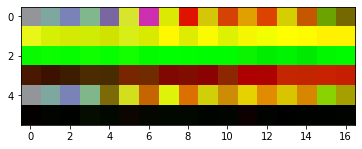

In [46]:
plt.imshow( keypoints_with_scores)

In [47]:
 keypoints_with_scores

array([[[ 5.83553910e-01,  5.85905790e-01,  6.01891518e-01],
        [ 4.97418791e-01,  6.61891341e-01,  6.25117838e-01],
        [ 4.81834710e-01,  5.15161574e-01,  7.19458699e-01],
        [ 5.07743418e-01,  7.19499648e-01,  5.56042135e-01],
        [ 4.81282651e-01,  4.05563623e-01,  6.36241436e-01],
        [ 8.45943868e-01,  9.05475497e-01,  1.75237358e-01],
        [ 8.06540608e-01,  1.86047435e-01,  6.90710008e-01],
        [ 8.64691496e-01,  9.14591253e-01,  1.06139081e-02],
        [ 8.80586207e-01,  7.73101002e-02,  1.27935444e-03],
        [ 8.38498890e-01,  7.81269968e-01,  2.98129618e-02],
        [ 8.31784308e-01,  2.59270430e-01,  1.82693973e-02],
        [ 8.79947066e-01,  6.30580723e-01,  6.78557655e-08],
        [ 8.67524564e-01,  2.63364375e-01,  5.51389802e-11],
        [ 8.36169243e-01,  8.09831500e-01,  5.78087475e-03],
        [ 7.77665019e-01,  3.41540128e-01,  4.18054080e-03],
        [ 4.20017153e-01,  6.42926097e-01,  1.86653589e-04],
        [ 4.63876069e-01

In [48]:
 keypoints_with_scores[0]# first person, high value correspond to higher body low value with lower part of body exple leg

array([[5.8355391e-01, 5.8590579e-01, 6.0189152e-01],
       [4.9741879e-01, 6.6189134e-01, 6.2511784e-01],
       [4.8183471e-01, 5.1516157e-01, 7.1945870e-01],
       [5.0774342e-01, 7.1949965e-01, 5.5604213e-01],
       [4.8128265e-01, 4.0556362e-01, 6.3624144e-01],
       [8.4594387e-01, 9.0547550e-01, 1.7523736e-01],
       [8.0654061e-01, 1.8604743e-01, 6.9071001e-01],
       [8.6469150e-01, 9.1459125e-01, 1.0613908e-02],
       [8.8058621e-01, 7.7310100e-02, 1.2793544e-03],
       [8.3849889e-01, 7.8126997e-01, 2.9812962e-02],
       [8.3178431e-01, 2.5927043e-01, 1.8269397e-02],
       [8.7994707e-01, 6.3058072e-01, 6.7855765e-08],
       [8.6752456e-01, 2.6336437e-01, 5.5138980e-11],
       [8.3616924e-01, 8.0983150e-01, 5.7808748e-03],
       [7.7766502e-01, 3.4154013e-01, 4.1805408e-03],
       [4.2001715e-01, 6.4292610e-01, 1.8665359e-04],
       [4.6387607e-01, 4.0802023e-01, 2.4235672e-03]], dtype=float32)

In [51]:
#Function to loop through each person detected and render
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [63]:
cap = cv2.VideoCapture(0)# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    print(keypoints_with_scores)
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
    
    cv2.imshow('movement', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[[ 6.6025162e-01  6.1838895e-01  6.1630273e-01]
  [ 6.1794883e-01  6.8086207e-01  6.0679692e-01]
  [ 6.0988718e-01  5.6884378e-01  5.7726157e-01]
  [ 6.8641275e-01  7.3498577e-01  6.3160694e-01]
  [ 6.4928186e-01  4.9643710e-01  4.9808198e-01]
  [ 9.0079302e-01  8.0701423e-01  3.4184013e-02]
  [ 8.4977126e-01  3.1012565e-01  1.5172249e-01]
  [ 8.8959056e-01  8.1375140e-01  1.4717747e-04]
  [ 8.7630564e-01  2.1536548e-01  8.1716562e-03]
  [ 8.4662688e-01  6.6364723e-01  1.4834200e-01]
  [ 8.4260523e-01  3.0369675e-01  4.9083505e-02]
  [ 8.9632952e-01  6.3936597e-01  9.6566779e-08]
  [ 8.7286019e-01  4.2120731e-01  3.9145399e-07]
  [ 8.7055928e-01  6.6362393e-01  2.5173456e-03]
  [ 8.2485259e-01  4.3691918e-01  3.2764893e-02]
  [ 5.2285063e-01  4.7787213e-01  2.0900182e-04]
  [ 6.2036973e-01  5.1545727e-01  1.7733430e-03]]

 [[ 3.0975503e-01  7.0007935e-02  2.3182926e-03]
  [ 3.1078002e-01  5.2354388e-02  1.2929513e-03]
  [ 3.0770758e-01  8.0027714e-02  6.6963769e-04]
  [ 3.1189796e-01 

[[[6.47800207e-01 5.25772572e-01 6.04084373e-01]
  [6.14511013e-01 5.80359221e-01 4.55515563e-01]
  [6.11413240e-01 4.78313267e-01 6.21431649e-01]
  [6.84934378e-01 6.24887288e-01 5.02219677e-01]
  [6.72903836e-01 4.07369018e-01 4.88673657e-01]
  [9.00759697e-01 7.66010880e-01 1.77495200e-02]
  [8.83186162e-01 2.33329162e-01 1.19184501e-01]
  [8.96366537e-01 7.87765265e-01 1.18275047e-05]
  [8.73686969e-01 2.09212989e-01 4.86667705e-05]
  [8.55739534e-01 5.87338150e-01 1.27354190e-01]
  [8.78525615e-01 3.34793746e-01 4.40611020e-02]
  [9.05160427e-01 5.85809827e-01 2.52023654e-07]
  [8.83559346e-01 4.07527894e-01 3.71019212e-07]
  [8.47798169e-01 6.05347872e-01 6.67594490e-04]
  [7.96656430e-01 4.55539525e-01 7.46360188e-03]
  [5.25137901e-01 5.72915375e-01 4.40954227e-06]
  [5.23500204e-01 5.09304106e-01 3.90369769e-06]]

 [[2.46090963e-01 9.50204968e-01 9.39617399e-03]
  [2.55022168e-01 9.50685620e-01 5.62984264e-03]
  [2.54097670e-01 9.57627892e-01 4.90721408e-03]
  [2.41825148e-01 

[[[ 6.5125251e-01  4.9602538e-01  5.1172817e-01]
  [ 6.1424464e-01  5.4978746e-01  3.0521455e-01]
  [ 6.1774111e-01  4.4883487e-01  4.7674987e-01]
  [ 6.8730301e-01  6.0216206e-01  5.0750583e-01]
  [ 6.8262064e-01  3.8321468e-01  5.8329701e-01]
  [ 9.0727234e-01  7.4195886e-01  3.2751821e-02]
  [ 8.9064056e-01  2.5708523e-01  1.2281353e-01]
  [ 9.0362525e-01  7.5660914e-01  6.1135928e-05]
  [ 8.7647963e-01  2.2018933e-01  1.2756778e-04]
  [ 8.5125005e-01  5.6381094e-01  3.9938670e-02]
  [ 8.8001049e-01  3.3772844e-01  4.6256240e-02]
  [ 9.0906692e-01  5.5572784e-01  4.8292623e-05]
  [ 8.8941979e-01  3.9858532e-01  3.4308905e-04]
  [ 8.6254209e-01  5.7299465e-01  7.8030396e-04]
  [ 7.9254180e-01  4.5191056e-01  5.7089957e-03]
  [ 5.2059668e-01  5.6439149e-01  1.0366096e-11]
  [ 5.2254361e-01  4.7700089e-01  7.6322920e-11]]

 [[ 1.9443434e-01  8.2662249e-01  7.5025175e-04]
  [ 1.9853222e-01  8.2313335e-01  4.5220504e-04]
  [ 1.9635437e-01  8.3221263e-01  2.6901229e-04]
  [ 2.0416355e-01 

[[[ 6.53025866e-01  5.02330840e-01  5.39955080e-01]
  [ 6.21849835e-01  5.59539318e-01  3.46340984e-01]
  [ 6.18187964e-01  4.56801087e-01  5.53013563e-01]
  [ 6.94305480e-01  6.13997161e-01  5.14216840e-01]
  [ 6.81235731e-01  3.86874586e-01  5.01020193e-01]
  [ 9.08686399e-01  7.42250562e-01  2.74681859e-02]
  [ 8.89346302e-01  2.57495761e-01  1.33621633e-01]
  [ 9.03123200e-01  7.43628442e-01  4.26088191e-05]
  [ 8.73972952e-01  2.05009267e-01  3.02721397e-04]
  [ 8.55754733e-01  5.68519533e-01  6.26039580e-02]
  [ 8.72239947e-01  3.37750673e-01  6.00657985e-02]
  [ 9.11899447e-01  5.43024778e-01  2.16122990e-05]
  [ 8.92639160e-01  3.84896725e-01  1.04920051e-04]
  [ 8.43954504e-01  5.70237577e-01  5.35580446e-04]
  [ 7.40877032e-01  4.71905440e-01  1.02003217e-02]
  [ 5.22718787e-01  5.54338634e-01  1.37613854e-09]
  [ 5.22932649e-01  4.92683589e-01  2.75394751e-09]]

 [[ 2.56276667e-01  9.45762992e-01  1.22464756e-02]
  [ 2.54844069e-01  9.43294942e-01  7.16691604e-03]
  [ 2.5401

[[[ 6.5215147e-01  4.9715567e-01  4.9759910e-01]
  [ 6.1825132e-01  5.5376554e-01  3.8760638e-01]
  [ 6.1654067e-01  4.5174396e-01  4.9575624e-01]
  [ 6.9968617e-01  6.0787451e-01  5.1418459e-01]
  [ 6.8831360e-01  3.8592738e-01  4.1883793e-01]
  [ 9.1094995e-01  7.5777745e-01  2.1821113e-02]
  [ 8.8971317e-01  2.5885907e-01  1.5463540e-01]
  [ 9.0573615e-01  7.4280250e-01  4.1160081e-05]
  [ 8.7598109e-01  2.2002928e-01  1.9257571e-04]
  [ 8.5921448e-01  5.6619650e-01  5.3914618e-02]
  [ 8.7771320e-01  3.3890063e-01  2.0864721e-02]
  [ 9.1426188e-01  5.4276216e-01  6.7101435e-05]
  [ 8.9197063e-01  3.9610454e-01  5.4944633e-04]
  [ 8.4642005e-01  5.6855750e-01  7.3690288e-04]
  [ 7.5742853e-01  4.6522540e-01  1.1613546e-02]
  [ 5.2098906e-01  5.5437952e-01  1.7497373e-10]
  [ 5.2159566e-01  4.9299759e-01  1.1087576e-09]]

 [[ 1.8963845e-01  8.2897705e-01  9.7641605e-04]
  [ 1.9334747e-01  8.2289094e-01  5.1969721e-04]
  [ 1.9080596e-01  8.3487713e-01  2.9678180e-04]
  [ 2.0002972e-01 

[[[ 6.5368110e-01  4.9401414e-01  5.3582925e-01]
  [ 6.1109364e-01  5.5374736e-01  3.8293678e-01]
  [ 6.1830133e-01  4.4827336e-01  5.9402788e-01]
  [ 6.9013125e-01  6.1059386e-01  4.6583018e-01]
  [ 6.8596941e-01  3.8507348e-01  4.9619725e-01]
  [ 9.1060615e-01  7.4445683e-01  2.1975527e-02]
  [ 8.8988531e-01  2.7209908e-01  1.2544324e-01]
  [ 9.0258586e-01  7.4357694e-01  2.5939984e-05]
  [ 8.7694907e-01  2.3552752e-01  6.3658066e-05]
  [ 8.4899902e-01  5.6810808e-01  9.5154583e-02]
  [ 8.8394159e-01  3.3958542e-01  2.8817546e-02]
  [ 9.0807772e-01  5.5604595e-01  5.1196792e-05]
  [ 8.9033222e-01  3.9559034e-01  2.9740419e-04]
  [ 8.4793264e-01  5.7018334e-01  1.0656663e-03]
  [ 7.5595838e-01  4.6627650e-01  1.1369587e-02]
  [ 5.2281803e-01  5.5325574e-01  7.1015645e-11]
  [ 5.2243507e-01  4.9047491e-01  2.6540198e-10]]

 [[ 2.5729382e-01  9.4702911e-01  1.9853864e-02]
  [ 2.5558844e-01  9.4414330e-01  1.1510229e-02]
  [ 2.5466278e-01  9.5196199e-01  1.8472321e-02]
  [ 2.5474420e-01 

[[[ 6.52161896e-01  5.04088640e-01  5.67226827e-01]
  [ 6.12243772e-01  5.60528159e-01  3.10348094e-01]
  [ 6.18330598e-01  4.57598954e-01  6.14461124e-01]
  [ 6.90010130e-01  6.14625216e-01  5.40169120e-01]
  [ 6.85638011e-01  3.86487871e-01  5.39116621e-01]
  [ 9.09700036e-01  7.61628270e-01  2.43409704e-02]
  [ 8.80710185e-01  2.44475633e-01  1.34549484e-01]
  [ 9.04377937e-01  7.70847321e-01  4.70748564e-05]
  [ 8.75053227e-01  2.17549831e-01  2.17604174e-04]
  [ 8.59701872e-01  5.66202581e-01  5.53545766e-02]
  [ 8.77685905e-01  3.40324014e-01  3.28332968e-02]
  [ 9.08461809e-01  5.56874037e-01  6.14989694e-05]
  [ 8.89644027e-01  3.99142683e-01  4.24699712e-04]
  [ 8.63548040e-01  5.68358719e-01  7.20795651e-04]
  [ 7.61445761e-01  4.57075983e-01  1.34621039e-02]
  [ 5.23500800e-01  5.62633276e-01  6.79750561e-11]
  [ 5.23423970e-01  4.90290761e-01  3.77672560e-10]]

 [[ 1.74881727e-01  8.25467825e-01  1.25031231e-03]
  [ 1.78380921e-01  8.23120117e-01  6.18056743e-04]
  [ 1.7566

[[[ 6.53009355e-01  5.02714515e-01  5.58424652e-01]
  [ 6.21410191e-01  5.57111382e-01  3.77297759e-01]
  [ 6.18866265e-01  4.56158876e-01  6.81707501e-01]
  [ 6.86780453e-01  6.09287858e-01  4.89276409e-01]
  [ 6.77342415e-01  3.87341887e-01  4.97043610e-01]
  [ 9.09566939e-01  7.46528924e-01  3.14864181e-02]
  [ 8.88908803e-01  2.71179855e-01  1.19941734e-01]
  [ 9.05079067e-01  7.58755982e-01  5.07304248e-05]
  [ 8.75034809e-01  2.17725784e-01  3.62822087e-04]
  [ 8.52307200e-01  5.65000057e-01  8.52786750e-02]
  [ 8.78908277e-01  3.34397614e-01  3.50737460e-02]
  [ 9.11056876e-01  5.54092109e-01  1.19645147e-05]
  [ 8.90676260e-01  3.84442389e-01  9.92460918e-05]
  [ 8.44972908e-01  5.69241703e-01  9.30489390e-04]
  [ 7.58020759e-01  4.67676818e-01  1.25715584e-02]
  [ 5.21982074e-01  5.74447930e-01  1.90026994e-09]
  [ 5.22607386e-01  4.92393792e-01  4.68776085e-09]]

 [[ 2.59283602e-01  9.53683317e-01  3.67266722e-02]
  [ 2.55435675e-01  9.51198220e-01  3.14665847e-02]
  [ 2.5493

[[[ 6.51622057e-01  5.03841639e-01  5.83875656e-01]
  [ 6.19366229e-01  5.55991113e-01  4.18396801e-01]
  [ 6.18785977e-01  4.55470771e-01  5.43544531e-01]
  [ 6.89221680e-01  6.10266387e-01  4.78075176e-01]
  [ 6.86004698e-01  3.86431545e-01  4.97914314e-01]
  [ 9.07907307e-01  7.63390720e-01  3.26251052e-02]
  [ 8.89945865e-01  2.69735247e-01  1.24205351e-01]
  [ 9.05673265e-01  7.73860931e-01  6.75660340e-05]
  [ 8.74606371e-01  2.18999043e-01  2.11166029e-04]
  [ 8.54253769e-01  5.67198634e-01  6.47229180e-02]
  [ 8.78047526e-01  3.37893695e-01  3.81497480e-02]
  [ 9.12969649e-01  5.67267597e-01  1.40866250e-05]
  [ 8.89322340e-01  3.97023708e-01  1.68742001e-04]
  [ 8.45220029e-01  7.27369606e-01  7.48009654e-04]
  [ 7.62307405e-01  4.60562885e-01  1.08366115e-02]
  [ 5.22842884e-01  5.76427698e-01  1.71951245e-10]
  [ 5.23300827e-01  4.93523002e-01  1.39834000e-09]]

 [[ 2.59336591e-01  9.49474573e-01  1.82953589e-02]
  [ 2.57402092e-01  9.46357250e-01  1.22346487e-02]
  [ 2.5688

[[[6.60522163e-01 5.00024021e-01 5.48670530e-01]
  [6.21983647e-01 5.55147052e-01 3.99050772e-01]
  [6.21772707e-01 4.52062428e-01 5.27737796e-01]
  [6.88808501e-01 6.05267346e-01 4.96675760e-01]
  [6.80428445e-01 3.82077426e-01 5.64106464e-01]
  [9.09173369e-01 7.63118267e-01 2.68545933e-02]
  [8.88316870e-01 2.55773723e-01 1.62961200e-01]
  [9.06461477e-01 7.57743239e-01 3.52745083e-05]
  [8.76562238e-01 2.31800497e-01 7.13694462e-05]
  [8.54293227e-01 5.65506577e-01 5.66126630e-02]
  [8.77620697e-01 3.33336413e-01 3.85307632e-02]
  [9.11778033e-01 5.57086766e-01 8.40897610e-06]
  [8.91176045e-01 3.97555739e-01 8.54281534e-05]
  [8.48648190e-01 5.72464764e-01 9.53833980e-04]
  [7.75768161e-01 4.54384565e-01 9.09173116e-03]
  [5.23256421e-01 5.63643873e-01 9.24437082e-10]
  [5.22771358e-01 4.91910189e-01 5.74011416e-09]]

 [[2.58385062e-01 9.47289824e-01 1.92233659e-02]
  [2.58553445e-01 9.44987833e-01 1.16475644e-02]
  [2.59320945e-01 9.52461600e-01 1.20596942e-02]
  [2.41280928e-01 

[[[ 6.6470802e-01  4.9526909e-01  5.1829845e-01]
  [ 6.2491155e-01  5.5160123e-01  3.4686816e-01]
  [ 6.2593347e-01  4.5058167e-01  4.3639755e-01]
  [ 6.8901598e-01  6.0526687e-01  5.4533142e-01]
  [ 6.7552334e-01  3.8051444e-01  6.0460216e-01]
  [ 9.0962195e-01  7.4414194e-01  2.8661797e-02]
  [ 8.8990843e-01  2.5928569e-01  1.1833316e-01]
  [ 9.0472817e-01  7.5725687e-01  3.8465419e-05]
  [ 8.7677813e-01  2.1560928e-01  1.1005138e-04]
  [ 8.4883201e-01  5.6316781e-01  6.6477545e-02]
  [ 8.7642831e-01  3.4110612e-01  4.4535536e-02]
  [ 9.0876114e-01  5.4592788e-01  8.0282780e-06]
  [ 8.9073265e-01  3.8345528e-01  3.8716178e-05]
  [ 8.4861857e-01  5.7065332e-01  1.0192537e-03]
  [ 7.7536774e-01  4.5385510e-01  1.0327359e-02]
  [ 5.2049178e-01  5.4274726e-01  1.7442166e-07]
  [ 5.2032816e-01  4.9307901e-01  3.7520516e-07]]

 [[ 2.5926933e-01  9.5452416e-01  1.1825682e-02]
  [ 2.5903049e-01  9.5120353e-01  8.3710700e-03]
  [ 2.5837475e-01  9.5948994e-01  7.2947256e-03]
  [ 2.5477713e-01 

[[[6.6239411e-01 4.9332482e-01 5.7432777e-01]
  [6.2112409e-01 5.5325216e-01 4.4211072e-01]
  [6.2612104e-01 4.4735458e-01 4.0361401e-01]
  [6.9125640e-01 6.0866916e-01 4.7634384e-01]
  [6.8196875e-01 3.8147235e-01 5.0892389e-01]
  [9.0954858e-01 7.4533480e-01 3.2028105e-02]
  [8.8791931e-01 2.5818151e-01 1.3372606e-01]
  [9.0315294e-01 7.5785750e-01 4.4710847e-05]
  [8.7885296e-01 2.2926229e-01 1.2274842e-04]
  [8.5096657e-01 5.6433612e-01 5.4732505e-02]
  [8.7677419e-01 3.3748323e-01 4.4655997e-02]
  [9.0990090e-01 5.6062609e-01 5.2042225e-05]
  [8.8879389e-01 3.9598662e-01 3.2604416e-04]
  [8.4824920e-01 5.6725889e-01 1.0239893e-03]
  [7.5689811e-01 4.6485507e-01 1.8640772e-02]
  [5.2242577e-01 5.4312021e-01 1.4612173e-08]
  [5.2268559e-01 4.7632495e-01 3.8142630e-08]]

 [[1.7004749e-01 8.2534522e-01 1.0236911e-03]
  [1.7407128e-01 8.2140905e-01 4.9982016e-04]
  [1.7193845e-01 8.3172590e-01 3.3402015e-04]
  [1.8137243e-01 8.1278962e-01 3.4472762e-04]
  [1.7642616e-01 8.3339196e-01 5

[[[ 6.5558410e-01  4.9839684e-01  4.7780752e-01]
  [ 6.2141830e-01  5.5419606e-01  4.0755278e-01]
  [ 6.2378776e-01  4.5198798e-01  4.3168500e-01]
  [ 6.9397998e-01  6.0766745e-01  4.8154891e-01]
  [ 6.7975378e-01  3.8120207e-01  5.3390539e-01]
  [ 9.0844762e-01  7.5844860e-01  2.4776427e-02]
  [ 8.8931584e-01  2.6065695e-01  9.4903685e-02]
  [ 9.0355581e-01  7.4498314e-01  2.7816146e-05]
  [ 8.7644118e-01  2.1915725e-01  1.0288750e-04]
  [ 8.5042554e-01  5.6226534e-01  5.9808105e-02]
  [ 8.8112152e-01  3.2346860e-01  3.0613238e-02]
  [ 9.0994573e-01  5.4529297e-01  1.7782922e-05]
  [ 8.9046514e-01  3.9604068e-01  1.0325905e-04]
  [ 8.4745270e-01  5.6979454e-01  7.9604273e-04]
  [ 7.5735915e-01  4.6615842e-01  1.3446045e-02]
  [ 5.2177233e-01  5.4448581e-01  3.5689900e-09]
  [ 5.2175981e-01  4.8958620e-01  1.5340856e-08]]

 [[ 2.6427683e-01  9.4804811e-01  1.6459707e-02]
  [ 2.6318514e-01  9.4469941e-01  9.3086055e-03]
  [ 2.6176247e-01  9.5339149e-01  1.2156430e-02]
  [ 2.5855213e-01 

[[[ 6.62552774e-01  4.94729847e-01  5.26068091e-01]
  [ 6.20432436e-01  5.54043293e-01  4.26111728e-01]
  [ 6.23345137e-01  4.49150026e-01  4.58645940e-01]
  [ 6.88754857e-01  6.05840504e-01  4.96035337e-01]
  [ 6.82524800e-01  3.80717069e-01  5.63371003e-01]
  [ 9.06335711e-01  7.59240329e-01  3.84415127e-02]
  [ 8.89766276e-01  2.60133445e-01  1.21464141e-01]
  [ 9.03704166e-01  7.59084880e-01  4.18283962e-05]
  [ 8.80710244e-01  2.17102826e-01  1.26325482e-04]
  [ 8.48156989e-01  5.63170791e-01  7.76268393e-02]
  [ 8.80939364e-01  3.37309778e-01  2.56195515e-02]
  [ 9.10255313e-01  5.58225214e-01  1.28291886e-05]
  [ 8.92608941e-01  3.97331625e-01  1.00471894e-04]
  [ 8.47974777e-01  5.67503035e-01  7.97465094e-04]
  [ 7.55069435e-01  4.67000961e-01  1.61111448e-02]
  [ 5.22886395e-01  5.62875986e-01  3.72926614e-08]
  [ 5.22437036e-01  4.91397083e-01  1.22588204e-07]]

 [[ 1.69190228e-01  8.23455274e-01  1.01403950e-03]
  [ 1.72530070e-01  8.20581496e-01  5.14430460e-04]
  [ 1.6980

[[[6.59084916e-01 4.95696634e-01 5.14653504e-01]
  [6.22952104e-01 5.52326679e-01 4.51329291e-01]
  [6.20856166e-01 4.49658513e-01 5.44296741e-01]
  [6.92086220e-01 6.06114924e-01 4.91118371e-01]
  [6.79809570e-01 3.81038159e-01 5.52696645e-01]
  [9.06768441e-01 7.56677449e-01 3.35205272e-02]
  [8.89123499e-01 2.57262617e-01 1.49915576e-01]
  [9.04698491e-01 7.57406592e-01 5.55366787e-05]
  [8.76591980e-01 2.03245118e-01 2.80189066e-04]
  [8.48980129e-01 5.64132273e-01 3.70553620e-02]
  [8.78190160e-01 3.40973616e-01 2.94603184e-02]
  [9.12287354e-01 5.58001876e-01 1.04989313e-05]
  [8.91163945e-01 3.96921098e-01 1.35896742e-04]
  [8.45504761e-01 5.71055174e-01 1.40905764e-03]
  [7.58397102e-01 4.67365056e-01 8.48711841e-03]
  [5.21052718e-01 5.62412202e-01 4.98975417e-10]
  [5.21156907e-01 4.91528034e-01 4.88234786e-09]]

 [[1.71821848e-01 8.29800308e-01 9.71581961e-04]
  [1.77913979e-01 8.24755549e-01 4.03880083e-04]
  [1.78722486e-01 8.38929474e-01 2.02625568e-04]
  [1.88334227e-01 

[[[6.59550250e-01 5.01385450e-01 5.48645914e-01]
  [6.25291526e-01 5.55467427e-01 3.44083637e-01]
  [6.20233834e-01 4.55784768e-01 5.29732227e-01]
  [6.93916500e-01 6.12820327e-01 5.18429399e-01]
  [6.77823782e-01 3.88030142e-01 5.12075901e-01]
  [9.09021914e-01 7.42947459e-01 2.86029372e-02]
  [8.90161097e-01 2.71590143e-01 1.74595758e-01]
  [9.03958857e-01 7.43406057e-01 5.34500796e-05]
  [8.75939369e-01 2.19079331e-01 4.87968005e-04]
  [8.49338174e-01 5.64468682e-01 6.77874833e-02]
  [8.80376399e-01 3.27144027e-01 3.50825936e-02]
  [9.10366416e-01 5.39354086e-01 3.54793956e-05]
  [8.90891492e-01 3.96766335e-01 2.19487425e-04]
  [8.46559763e-01 5.66393614e-01 1.01869705e-03]
  [7.74767280e-01 4.54514623e-01 1.15734423e-02]
  [5.22077501e-01 5.55241644e-01 1.24638033e-09]
  [5.23215175e-01 4.95662272e-01 5.67141178e-09]]

 [[2.59147674e-01 9.51073110e-01 1.52802989e-02]
  [2.58211821e-01 9.48222041e-01 1.02488361e-02]
  [2.57938981e-01 9.56108570e-01 1.05659766e-02]
  [2.55047530e-01 

[[[6.6604555e-01 5.1533443e-01 5.3595698e-01]
  [6.2815869e-01 5.6911385e-01 3.7481019e-01]
  [6.2207425e-01 4.6915340e-01 6.5283924e-01]
  [6.8837374e-01 6.2033153e-01 6.0892230e-01]
  [6.7280203e-01 3.9952368e-01 5.8960348e-01]
  [9.0855604e-01 7.6048481e-01 6.5086797e-02]
  [8.9001548e-01 2.7640414e-01 9.0427265e-02]
  [9.0430510e-01 7.7083528e-01 2.6965153e-04]
  [8.7720853e-01 2.3348765e-01 6.3026004e-05]
  [8.5359424e-01 5.7456011e-01 7.6507390e-02]
  [8.7924910e-01 3.3399051e-01 7.7294432e-02]
  [9.0733653e-01 5.5393159e-01 5.2294740e-06]
  [8.8912886e-01 3.9710402e-01 1.9471965e-05]
  [8.4388840e-01 5.8249116e-01 9.0217579e-04]
  [7.7585959e-01 4.6610543e-01 1.0372946e-02]
  [5.2285194e-01 5.7154220e-01 1.8182047e-07]
  [5.2320945e-01 5.1126796e-01 4.6526722e-07]]

 [[1.7535162e-01 8.2635349e-01 8.8397373e-04]
  [1.8007445e-01 8.2383800e-01 4.5795986e-04]
  [1.7870077e-01 8.3396322e-01 2.9881726e-04]
  [1.8753809e-01 8.1462950e-01 3.0966205e-04]
  [1.8389688e-01 8.3548731e-01 3

[[[ 6.6572940e-01  6.1717457e-01  5.3367698e-01]
  [ 6.3728368e-01  6.6943908e-01  4.5191261e-01]
  [ 6.1730343e-01  5.7021505e-01  5.8163464e-01]
  [ 7.0306885e-01  7.0227039e-01  5.6258172e-01]
  [ 6.5235829e-01  4.7960356e-01  6.8232590e-01]
  [ 9.1221088e-01  7.6158708e-01  2.0341577e-02]
  [ 8.8421851e-01  2.6886591e-01  1.3551624e-01]
  [ 9.0497279e-01  7.6549882e-01  2.8990618e-05]
  [ 8.6858130e-01  2.5341505e-01  4.4492405e-04]
  [ 8.5832125e-01  6.3299131e-01  1.8244386e-01]
  [ 8.7548971e-01  4.0166095e-01  3.5330880e-02]
  [ 9.0118492e-01  5.9589267e-01  1.0403410e-08]
  [ 8.8818419e-01  3.9568913e-01  4.1278811e-09]
  [ 8.7352389e-01  6.3669991e-01  1.4865885e-03]
  [ 8.4593135e-01  4.4266304e-01  1.5660292e-02]
  [ 5.3866965e-01  6.2051505e-01  5.4899603e-04]
  [ 5.9332931e-01  4.9174225e-01  1.9815327e-03]]

 [[ 1.3654651e-01  8.0712104e-01  8.4581226e-04]
  [ 1.5715182e-01  8.0972618e-01  3.4568930e-04]
  [ 1.3905689e-01  8.1839699e-01  2.9753661e-04]
  [ 1.6615191e-01 

[[[ 6.6288424e-01  5.5973601e-01  5.6934088e-01]
  [ 6.2460089e-01  6.1746055e-01  4.2843992e-01]
  [ 6.1993074e-01  5.1434457e-01  5.7943910e-01]
  [ 6.8876177e-01  6.6149950e-01  6.2888473e-01]
  [ 6.6351712e-01  4.3461210e-01  4.8478901e-01]
  [ 9.1111767e-01  7.7587515e-01  2.7965482e-02]
  [ 8.7702447e-01  2.5475493e-01  2.0983204e-01]
  [ 9.0112102e-01  7.8160894e-01  4.3407359e-05]
  [ 8.7244904e-01  2.0890465e-01  1.3127715e-04]
  [ 8.5469818e-01  6.0066247e-01  1.2348590e-01]
  [ 8.7294644e-01  3.4650758e-01  9.7625926e-02]
  [ 9.0567231e-01  5.8430010e-01  6.1365903e-08]
  [ 8.9126861e-01  3.6727908e-01  8.0041367e-08]
  [ 8.2460028e-01  6.0931695e-01  9.1379543e-04]
  [ 7.9447001e-01  4.6714616e-01  7.4187894e-03]
  [ 5.2272260e-01  5.9760600e-01  3.6510464e-04]
  [ 5.2362251e-01  5.4453754e-01  9.9594443e-05]]

 [[ 2.4916516e-01  9.5815599e-01  6.9873831e-03]
  [ 2.4836406e-01  9.5469946e-01  4.1368688e-03]
  [ 2.4726352e-01  9.6231931e-01  3.6496948e-03]
  [ 2.5134024e-01 

[[[ 6.59441650e-01  5.51069260e-01  5.90455472e-01]
  [ 6.21498466e-01  6.09252393e-01  3.79594117e-01]
  [ 6.14015758e-01  5.04659653e-01  7.13596642e-01]
  [ 6.87050104e-01  6.56823456e-01  5.03725827e-01]
  [ 6.59798443e-01  4.26694274e-01  6.99082553e-01]
  [ 9.02586401e-01  7.77348399e-01  1.27175311e-02]
  [ 8.79159033e-01  2.56441593e-01  2.19592243e-01]
  [ 8.96868348e-01  7.68238485e-01  1.76892881e-05]
  [ 8.72563601e-01  2.18810037e-01  4.64925339e-04]
  [ 8.49193752e-01  6.00616336e-01  1.26485705e-01]
  [ 8.75834167e-01  3.32795262e-01  6.92446753e-02]
  [ 8.99839699e-01  5.72365344e-01  8.50983099e-07]
  [ 8.91510069e-01  3.36498082e-01  1.75299965e-06]
  [ 8.39085758e-01  7.69287825e-01  6.40209939e-04]
  [ 7.72581935e-01  4.94762689e-01  7.71148875e-03]
  [ 5.05553126e-01  6.15559161e-01  4.19632670e-06]
  [ 5.08879125e-01  5.46111166e-01  3.93309438e-06]]

 [[ 1.77616134e-01  8.28891158e-01  6.12716132e-04]
  [ 1.83138683e-01  8.25417817e-01  2.82215828e-04]
  [ 1.8121

[[[ 6.5795875e-01  5.4983169e-01  6.2711811e-01]
  [ 6.2234259e-01  6.0351187e-01  4.7243357e-01]
  [ 6.1486501e-01  5.0294191e-01  7.2219062e-01]
  [ 6.8266398e-01  6.5216506e-01  5.6750739e-01]
  [ 6.6027349e-01  4.2863366e-01  7.1109825e-01]
  [ 9.1246182e-01  7.6376987e-01  3.3207498e-02]
  [ 8.7617379e-01  2.6962271e-01  3.0638996e-01]
  [ 9.0327454e-01  7.6905382e-01  4.0283190e-05]
  [ 8.7081945e-01  2.2083016e-01  5.5928231e-04]
  [ 8.5157651e-01  5.9914684e-01  1.9128764e-01]
  [ 8.7485218e-01  3.3579165e-01  1.3389663e-01]
  [ 9.0715677e-01  5.6908345e-01  2.1581806e-07]
  [ 8.9411157e-01  3.6817101e-01  4.4280068e-07]
  [ 8.4675074e-01  6.0239971e-01  1.2014440e-03]
  [ 7.6014358e-01  4.6866593e-01  6.9401101e-03]
  [ 5.2067590e-01  5.9798300e-01  4.9242808e-04]
  [ 5.2124834e-01  5.2815241e-01  1.2120505e-04]]

 [[ 1.7280348e-01  8.2819086e-01  7.1534910e-04]
  [ 1.7834823e-01  8.2458341e-01  3.3954429e-04]
  [ 1.7637052e-01  8.3565849e-01  2.1913490e-04]
  [ 1.8462689e-01 

[[[ 6.4987302e-01  5.4599905e-01  4.9197561e-01]
  [ 6.1633635e-01  6.0101843e-01  4.3555221e-01]
  [ 6.0978627e-01  5.0105101e-01  5.6901264e-01]
  [ 6.7721170e-01  6.5257102e-01  5.4572386e-01]
  [ 6.5891600e-01  4.2640316e-01  6.7829603e-01]
  [ 9.0245557e-01  7.8119165e-01  1.4025110e-02]
  [ 8.7358117e-01  2.5636685e-01  2.6115334e-01]
  [ 8.9784694e-01  7.8721130e-01  2.1700873e-05]
  [ 8.7066430e-01  2.1781258e-01  9.4971212e-04]
  [ 8.5380924e-01  5.9957260e-01  1.3085885e-01]
  [ 8.7283343e-01  3.3459798e-01  9.7827516e-02]
  [ 9.0625727e-01  5.7515049e-01  3.0695358e-07]
  [ 8.9284325e-01  3.3718422e-01  1.6214883e-06]
  [ 8.3684993e-01  7.9073370e-01  6.4006995e-04]
  [ 7.7554172e-01  4.8142588e-01  7.6294020e-03]
  [ 5.0751990e-01  6.0400242e-01  8.8670995e-06]
  [ 5.0817072e-01  5.4690289e-01  8.9099940e-06]]

 [[ 2.5691473e-01  9.5647800e-01  1.3219020e-02]
  [ 2.5683016e-01  9.5473588e-01  9.9492650e-03]
  [ 2.5642344e-01  9.6219921e-01  7.4291471e-03]
  [ 2.4243943e-01 

[[[6.62764966e-01 5.47469139e-01 5.57207882e-01]
  [6.28230751e-01 6.03887796e-01 3.61056030e-01]
  [6.18638337e-01 5.00115335e-01 6.07743919e-01]
  [6.88177526e-01 6.53313100e-01 6.00643754e-01]
  [6.62048221e-01 4.23129976e-01 6.07115030e-01]
  [9.02189910e-01 7.79222012e-01 1.49211874e-02]
  [8.77799332e-01 2.56958932e-01 2.61022717e-01]
  [8.98498416e-01 7.69336641e-01 2.41201160e-05]
  [8.74343097e-01 2.08407238e-01 4.57282818e-04]
  [8.52424920e-01 5.96681893e-01 1.70327440e-01]
  [8.76839399e-01 3.35637391e-01 1.00533910e-01]
  [9.03841496e-01 5.76401472e-01 1.04695607e-06]
  [8.93680096e-01 3.65446866e-01 1.73194633e-06]
  [8.24261904e-01 6.03439450e-01 6.00594911e-04]
  [7.75350571e-01 4.77810413e-01 1.12851793e-02]
  [5.06755471e-01 5.92425168e-01 1.34832080e-04]
  [5.09461343e-01 5.46951890e-01 6.28276903e-05]]

 [[1.71833336e-01 8.25119555e-01 9.78726894e-04]
  [1.75169274e-01 8.21338415e-01 4.84546268e-04]
  [1.71618670e-01 8.32432985e-01 3.43819527e-04]
  [1.79437622e-01 

[[[ 6.65495813e-01  5.49323499e-01  6.07466519e-01]
  [ 6.28640771e-01  6.03140950e-01  3.69737238e-01]
  [ 6.19334340e-01  5.01476347e-01  6.26496375e-01]
  [ 6.83495402e-01  6.50700986e-01  5.54468155e-01]
  [ 6.59089804e-01  4.26840127e-01  7.45573759e-01]
  [ 9.11464632e-01  7.77943671e-01  3.55620310e-02]
  [ 8.75941813e-01  2.69508809e-01  2.22220182e-01]
  [ 9.02765930e-01  7.83579051e-01  3.14257450e-05]
  [ 8.70290160e-01  2.06287995e-01  2.96740676e-04]
  [ 8.51052463e-01  6.00143135e-01  8.90208408e-02]
  [ 8.77257407e-01  3.35828781e-01  1.03670530e-01]
  [ 9.08118010e-01  5.72801113e-01  1.80484861e-07]
  [ 8.93121123e-01  3.84070307e-01  5.07775383e-07]
  [ 8.44389498e-01  6.05282784e-01  1.02034444e-03]
  [ 7.95684993e-01  4.61753339e-01  7.31805013e-03]
  [ 5.19618928e-01  5.95648468e-01  1.67016900e-04]
  [ 5.20170629e-01  5.44050395e-01  8.58239800e-05]]

 [[ 1.72743514e-01  8.27773690e-01  1.01531926e-03]
  [ 1.78294271e-01  8.24106216e-01  4.87970625e-04]
  [ 1.7630

[[[ 6.64042532e-01  5.49297571e-01  5.78756750e-01]
  [ 6.27844393e-01  6.07725143e-01  3.72464091e-01]
  [ 6.18025780e-01  5.01282215e-01  6.79839730e-01]
  [ 6.84222698e-01  6.53550506e-01  5.47950149e-01]
  [ 6.58782661e-01  4.27643478e-01  7.52834439e-01]
  [ 9.03219581e-01  7.78694928e-01  1.58616398e-02]
  [ 8.76291871e-01  2.74887443e-01  2.68550068e-01]
  [ 8.99977028e-01  7.55207241e-01  4.45906007e-05]
  [ 8.66943240e-01  2.17920542e-01  2.48435582e-03]
  [ 8.49733591e-01  5.98622322e-01  9.08354670e-02]
  [ 8.74906719e-01  3.37008506e-01  1.14995368e-01]
  [ 9.01693285e-01  5.69679379e-01  1.62604147e-06]
  [ 8.96201730e-01  3.39899391e-01  5.79089692e-06]
  [ 8.58778656e-01  7.72830427e-01  8.59935710e-04]
  [ 7.54365742e-01  5.09630084e-01  1.18406704e-02]
  [ 5.05140662e-01  6.16072834e-01  5.83347392e-05]
  [ 5.08405626e-01  5.49907744e-01  3.85647763e-05]]

 [[ 2.54731208e-01  9.58072960e-01  1.38166547e-02]
  [ 2.52826661e-01  9.54766631e-01  1.04212966e-02]
  [ 2.5236

[[[6.54169202e-01 5.29618621e-01 4.65115786e-01]
  [6.16550088e-01 5.85730970e-01 4.31705028e-01]
  [6.10161841e-01 4.85459894e-01 5.78118384e-01]
  [6.73964381e-01 6.42156661e-01 5.15275776e-01]
  [6.53984785e-01 4.14521962e-01 7.18911231e-01]
  [8.99361014e-01 7.77357757e-01 4.52519618e-02]
  [8.74033689e-01 2.57697463e-01 2.70741016e-01]
  [8.97492230e-01 7.85971999e-01 5.17586923e-05]
  [8.70308816e-01 2.02218577e-01 3.19558661e-04]
  [8.49824190e-01 5.91101229e-01 6.97463453e-02]
  [8.71259987e-01 3.24755311e-01 1.29806802e-01]
  [8.98596704e-01 5.75688660e-01 4.07826064e-07]
  [8.83516371e-01 3.93778533e-01 1.15624789e-06]
  [8.74200463e-01 6.48337066e-01 1.13896478e-03]
  [8.30935597e-01 4.27229434e-01 1.26246484e-02]
  [5.06907523e-01 5.82210720e-01 5.04389391e-05]
  [5.08243203e-01 5.17311752e-01 2.75117345e-05]]

 [[1.71293467e-01 8.27265024e-01 1.23384246e-03]
  [1.76503271e-01 8.22909117e-01 5.96117636e-04]
  [1.73571035e-01 8.34179163e-01 3.78605007e-04]
  [1.81726307e-01 

[[[6.14406526e-01 5.25678396e-01 5.40811121e-01]
  [5.71547031e-01 5.96038938e-01 5.61536312e-01]
  [5.64963758e-01 4.75013584e-01 6.44795477e-01]
  [6.37363553e-01 6.53376877e-01 6.27188325e-01]
  [6.19747639e-01 3.88388634e-01 5.09753048e-01]
  [8.92919898e-01 7.71444142e-01 1.15349293e-01]
  [8.78061950e-01 2.20205754e-01 3.09078246e-01]
  [8.92758489e-01 7.65965223e-01 1.95415141e-05]
  [8.78532171e-01 1.68442756e-01 4.05802202e-05]
  [8.50671470e-01 6.76947594e-01 6.58242106e-02]
  [8.62521827e-01 3.29926401e-01 7.67039806e-02]
  [8.98233831e-01 6.09829247e-01 1.45241614e-07]
  [8.75738740e-01 3.90993059e-01 1.69850864e-07]
  [8.46649230e-01 6.50191188e-01 2.10415921e-03]
  [8.19520831e-01 3.96181971e-01 1.00082550e-02]
  [4.19138879e-01 5.85244060e-01 1.88413796e-05]
  [4.24729824e-01 5.05852044e-01 7.17523972e-06]]

 [[1.56608865e-01 8.30653608e-01 5.66017698e-04]
  [1.64328128e-01 8.26832533e-01 1.64889556e-04]
  [1.46734193e-01 8.39522600e-01 1.20639626e-04]
  [1.69829562e-01 

[[[6.52908862e-01 5.73121667e-01 5.47063589e-01]
  [5.78852952e-01 6.60189033e-01 4.96563286e-01]
  [5.63107967e-01 5.08218825e-01 6.32208407e-01]
  [6.31320417e-01 7.24971354e-01 5.71178317e-01]
  [5.83403647e-01 3.91302168e-01 5.44195652e-01]
  [8.74791980e-01 8.09704602e-01 1.76513314e-01]
  [8.72961998e-01 1.98428214e-01 2.76037604e-01]
  [8.68087232e-01 7.95969307e-01 2.55956926e-04]
  [8.75189900e-01 1.04299568e-01 1.66732520e-02]
  [8.32049429e-01 7.07594872e-01 7.18385801e-02]
  [8.53441358e-01 1.69426292e-01 5.42410314e-02]
  [8.85267258e-01 6.15598083e-01 3.27991891e-08]
  [8.76902342e-01 3.28451872e-01 1.91789624e-08]
  [7.51114488e-01 7.00606883e-01 1.49582163e-03]
  [7.87254453e-01 4.14483875e-01 1.73705630e-02]
  [4.27729905e-01 4.74788010e-01 1.54889611e-04]
  [3.70307744e-01 5.23465872e-01 2.69351032e-04]]

 [[6.53197885e-01 5.74473560e-01 4.64883417e-01]
  [5.78852952e-01 6.60189033e-01 4.96563286e-01]
  [5.63107967e-01 5.08218825e-01 6.32208407e-01]
  [6.31320417e-01 

[[[ 6.63356185e-01  5.82513809e-01  4.88712341e-01]
  [ 5.87683856e-01  6.68048978e-01  4.29839820e-01]
  [ 5.72225451e-01  5.09126723e-01  5.26633441e-01]
  [ 6.31919980e-01  7.27980256e-01  5.47221303e-01]
  [ 5.89147210e-01  3.95713866e-01  5.24419785e-01]
  [ 8.72649670e-01  7.82174170e-01  1.94099724e-01]
  [ 8.73508394e-01  2.14013740e-01  2.65769780e-01]
  [ 8.65837634e-01  7.82939136e-01  1.82735536e-03]
  [ 8.64663243e-01  1.33079126e-01  7.88663048e-04]
  [ 8.30709815e-01  6.73615396e-01  3.90744209e-02]
  [ 8.50907683e-01  1.70791492e-01  6.48313910e-02]
  [ 8.85085583e-01  5.99299729e-01  6.91189754e-08]
  [ 8.75727236e-01  3.30353975e-01  2.42754581e-08]
  [ 7.70104706e-01  6.94918454e-01  1.64146617e-03]
  [ 7.87207246e-01  4.29048419e-01  3.15746702e-02]
  [ 4.44063604e-01  4.77317363e-01  2.23529394e-04]
  [ 4.16502953e-01  4.70494866e-01  2.66270421e-04]]

 [[ 6.63356185e-01  5.82513809e-01  4.88712341e-01]
  [ 5.87683856e-01  6.68048978e-01  4.29839820e-01]
  [ 5.7086

[[[6.74158931e-01 5.67086935e-01 5.70056617e-01]
  [5.94716430e-01 6.52867317e-01 3.99441183e-01]
  [5.80550671e-01 5.08585691e-01 6.31216824e-01]
  [6.33728504e-01 7.30257571e-01 4.68264401e-01]
  [5.89449883e-01 3.97876829e-01 5.68558872e-01]
  [8.78655195e-01 8.00486982e-01 2.01777682e-01]
  [8.70100796e-01 2.13520318e-01 3.00188273e-01]
  [8.62743497e-01 7.76012599e-01 1.19845325e-03]
  [8.65989089e-01 1.30699992e-01 1.04589341e-03]
  [8.41441929e-01 7.12221622e-01 1.31855622e-01]
  [8.55118096e-01 1.66696966e-01 6.81898668e-02]
  [8.84889781e-01 6.04330659e-01 2.09022019e-07]
  [8.73721540e-01 3.16067725e-01 8.31738145e-09]
  [8.51311505e-01 7.68604696e-01 4.72237775e-03]
  [7.91711509e-01 3.99125278e-01 2.33942643e-02]
  [4.44710433e-01 4.74964947e-01 3.46782792e-04]
  [4.51296866e-01 4.39327568e-01 4.75662324e-04]]

 [[6.74158931e-01 5.67086935e-01 5.70056617e-01]
  [6.13736212e-01 6.44977510e-01 4.22736211e-03]
  [6.04412913e-01 5.10706067e-01 4.36999509e-03]
  [6.42232835e-01 

[[[6.76341236e-01 5.78197300e-01 4.31736439e-01]
  [5.97165346e-01 6.59731746e-01 4.76820886e-01]
  [5.79956353e-01 5.11438429e-01 6.33299589e-01]
  [6.30849600e-01 7.33970463e-01 4.53969449e-01]
  [5.85669637e-01 4.00178015e-01 5.12147605e-01]
  [8.73005152e-01 7.88810015e-01 2.14705095e-01]
  [8.69464338e-01 2.16282785e-01 2.50474483e-01]
  [8.66471887e-01 7.86200821e-01 3.79670574e-03]
  [8.69925678e-01 1.29501387e-01 1.91416219e-03]
  [8.20448518e-01 6.86159194e-01 3.26068252e-02]
  [8.56496632e-01 1.80127874e-01 5.81089035e-02]
  [8.84400010e-01 5.84658325e-01 1.47189823e-07]
  [8.75480473e-01 2.94923067e-01 4.11702779e-08]
  [8.51573646e-01 7.69384742e-01 4.56298469e-03]
  [7.88840771e-01 4.02019203e-01 1.97384339e-02]
  [4.44514304e-01 4.75847781e-01 2.91893724e-04]
  [4.72410947e-01 4.26724166e-01 5.15474763e-04]]

 [[6.74891829e-01 5.75592220e-01 4.81908947e-01]
  [6.20018721e-01 6.50871098e-01 2.01813877e-03]
  [6.12244129e-01 5.09545147e-01 1.21377455e-03]
  [6.47415757e-01 

[[[ 6.74614489e-01  5.75516522e-01  5.45346916e-01]
  [ 6.00088835e-01  6.59804463e-01  4.43303406e-01]
  [ 5.77373862e-01  5.14487445e-01  5.48412085e-01]
  [ 6.36899292e-01  7.29778230e-01  4.61664349e-01]
  [ 5.87551951e-01  4.01638359e-01  5.05650461e-01]
  [ 8.72208893e-01  7.80327678e-01  1.74104288e-01]
  [ 8.70281041e-01  2.14065015e-01  2.80232906e-01]
  [ 8.61392319e-01  7.73013473e-01  2.03184737e-03]
  [ 8.67200196e-01  1.30147099e-01  9.99480952e-04]
  [ 8.31789136e-01  6.79301143e-01  8.36101323e-02]
  [ 8.51682067e-01  1.83249176e-01  5.18724173e-02]
  [ 8.83429229e-01  5.63843310e-01  2.41259244e-08]
  [ 8.76381040e-01  3.15989912e-01  8.60562466e-09]
  [ 8.35954130e-01  7.22895026e-01  2.70261592e-03]
  [ 7.92046845e-01  3.97136182e-01  2.30101161e-02]
  [ 4.55190957e-01  4.62906063e-01  3.11864686e-04]
  [ 4.59788829e-01  4.35254335e-01  4.08060761e-04]]

 [[ 6.74614489e-01  5.75516522e-01  5.45346916e-01]
  [ 6.00088835e-01  6.59804463e-01  4.43303406e-01]
  [ 5.7737

[[[ 6.71250999e-01  5.81333339e-01  4.44237530e-01]
  [ 5.95093369e-01  6.62050366e-01  4.69899803e-01]
  [ 5.69585323e-01  5.13926804e-01  5.84693372e-01]
  [ 6.34297490e-01  7.32439399e-01  4.21242505e-01]
  [ 5.83575428e-01  4.02308136e-01  5.15896738e-01]
  [ 8.76521230e-01  7.87331462e-01  1.96130529e-01]
  [ 8.73930156e-01  2.12498128e-01  3.20708305e-01]
  [ 8.68939042e-01  7.80382335e-01  7.39864889e-04]
  [ 8.68084729e-01  1.30394757e-01  4.20996745e-04]
  [ 8.39816868e-01  7.07733929e-01  4.96800058e-02]
  [ 8.50765824e-01  1.88697070e-01  6.21970855e-02]
  [ 8.85019779e-01  5.81597388e-01  8.47787796e-09]
  [ 8.73786032e-01  3.27204764e-01  3.11588422e-09]
  [ 8.50629985e-01  7.56441891e-01  2.86257500e-03]
  [ 7.92844296e-01  3.99026603e-01  1.96805131e-02]
  [ 4.43433672e-01  4.77372319e-01  1.87178724e-04]
  [ 4.60004658e-01  4.37911391e-01  3.63515806e-04]]

 [[ 6.70485198e-01  5.82273424e-01  4.91130114e-01]
  [ 5.95651209e-01  6.62493706e-01  3.73200327e-01]
  [ 5.6958

[[[6.62961602e-01 5.70008814e-01 5.61324894e-01]
  [5.89779556e-01 6.64115489e-01 5.93931377e-01]
  [5.69958985e-01 5.06438255e-01 6.04166627e-01]
  [6.33016407e-01 7.27088690e-01 6.00475192e-01]
  [5.77856183e-01 3.98831218e-01 5.14689147e-01]
  [8.81678045e-01 7.86706090e-01 3.05111080e-01]
  [8.72225523e-01 2.11851522e-01 3.51112932e-01]
  [8.71412277e-01 7.82366574e-01 3.75846471e-03]
  [8.66222262e-01 1.29378423e-01 1.43296539e-03]
  [8.41594338e-01 7.09152102e-01 6.24809451e-02]
  [8.57310474e-01 1.56796619e-01 1.17326498e-01]
  [8.89856339e-01 5.62635183e-01 3.97338169e-07]
  [8.76036823e-01 3.27650100e-01 6.55947607e-09]
  [8.55034888e-01 7.42678583e-01 3.21230851e-03]
  [7.90561378e-01 4.03372794e-01 2.00296659e-02]
  [4.44742024e-01 4.76143956e-01 1.96461406e-04]
  [4.51179057e-01 4.39977288e-01 3.49334121e-04]]

 [[6.63219392e-01 5.70552826e-01 3.99308294e-01]
  [6.12104237e-01 6.38027132e-01 7.54066685e-04]
  [6.06763482e-01 5.06946146e-01 5.74788835e-04]
  [6.52413964e-01 

[[[ 6.6208303e-01  5.5938929e-01  5.8271712e-01]
  [ 5.9093285e-01  6.4601493e-01  4.6247837e-01]
  [ 5.7412887e-01  4.9760419e-01  5.1227438e-01]
  [ 6.4158052e-01  7.2914517e-01  6.4322287e-01]
  [ 5.9057391e-01  3.9782867e-01  5.0512034e-01]
  [ 8.8288963e-01  7.9647255e-01  2.6434729e-01]
  [ 8.7131464e-01  2.0985663e-01  2.6541835e-01]
  [ 8.6909944e-01  7.8473961e-01  9.9161617e-04]
  [ 8.7020141e-01  1.2929435e-01  8.7750837e-04]
  [ 8.4163713e-01  7.0214963e-01  4.6849508e-02]
  [ 8.5516077e-01  1.7590168e-01  4.8639894e-02]
  [ 8.8935119e-01  6.1756277e-01  5.6320712e-08]
  [ 8.7521565e-01  3.2700714e-01  4.4968626e-08]
  [ 8.5243195e-01  7.5259876e-01  2.3265984e-03]
  [ 7.8061926e-01  4.3070918e-01  4.1236021e-02]
  [ 3.7118554e-01  5.9254736e-01  1.5071273e-04]
  [ 4.3560737e-01  4.5683908e-01  1.6979565e-04]]

 [[ 6.6208303e-01  5.5938929e-01  5.8271712e-01]
  [ 6.0857534e-01  6.3630939e-01  4.8732539e-03]
  [ 5.9961981e-01  5.0578165e-01  4.8529715e-03]
  [ 6.4558166e-01 

[[[ 6.6725874e-01  5.1774329e-01  5.3872710e-01]
  [ 5.8931410e-01  6.1306638e-01  4.6263570e-01]
  [ 5.8003515e-01  4.6810856e-01  5.9447742e-01]
  [ 6.2669253e-01  7.1785790e-01  5.6850374e-01]
  [ 5.7600856e-01  3.8828045e-01  3.3473018e-01]
  [ 8.8072038e-01  7.8678256e-01  3.1767026e-01]
  [ 8.7677538e-01  1.9974928e-01  3.1260464e-01]
  [ 8.6803526e-01  7.8654313e-01  3.9946456e-03]
  [ 8.6826342e-01  1.2663113e-01  9.3419629e-04]
  [ 8.3191049e-01  6.6764176e-01  9.6733727e-02]
  [ 8.5764825e-01  1.6076390e-01  1.3030221e-01]
  [ 8.8781357e-01  6.1466742e-01  5.5821067e-07]
  [ 8.7696767e-01  3.0220336e-01  1.6360550e-08]
  [ 8.5484093e-01  7.2355819e-01  6.8421126e-03]
  [ 8.2428443e-01  3.7160474e-01  9.5304949e-03]
  [ 3.9433593e-01  5.8838338e-01  1.8474602e-04]
  [ 4.3143809e-01  2.8629482e-01  1.3404411e-04]]

 [[ 1.6131904e-02  2.4725306e-03  0.0000000e+00]
  [ 9.7366981e-03  1.4611406e-02  0.0000000e+00]
  [-3.2228264e-03  7.8007965e-03  0.0000000e+00]
  [ 2.3539724e-02 

[[[ 6.64526582e-01  5.83701432e-01  5.15436113e-01]
  [ 5.89064837e-01  6.65389359e-01  4.51115072e-01]
  [ 5.70416868e-01  5.14704704e-01  5.59857428e-01]
  [ 6.35263801e-01  7.30029643e-01  4.90245968e-01]
  [ 5.87872148e-01  3.99593264e-01  5.36549032e-01]
  [ 8.76412570e-01  7.90729105e-01  1.69924095e-01]
  [ 8.72907162e-01  2.11911932e-01  3.02454799e-01]
  [ 8.67235541e-01  7.84591258e-01  1.28806825e-03]
  [ 8.66612852e-01  1.28719687e-01  6.91609806e-04]
  [ 8.32640648e-01  6.76355422e-01  3.50080989e-02]
  [ 8.51822674e-01  1.85630068e-01  5.09432517e-02]
  [ 8.88958395e-01  5.82479596e-01  2.19027125e-08]
  [ 8.75737965e-01  3.25540721e-01  1.71657195e-08]
  [ 8.34595144e-01  6.91192865e-01  2.39379704e-03]
  [ 7.92489409e-01  3.96564096e-01  1.34111214e-02]
  [ 4.42480743e-01  4.76033121e-01  1.95341112e-04]
  [ 4.48560864e-01  4.41336483e-01  4.21638018e-04]]

 [[ 6.64526582e-01  5.83701432e-01  5.15436113e-01]
  [ 5.89064837e-01  6.65389359e-01  4.51115072e-01]
  [ 5.6662

[[[ 6.64118767e-01  5.83085537e-01  5.41676998e-01]
  [ 5.92035711e-01  6.65111780e-01  4.42746222e-01]
  [ 5.71344972e-01  5.18179357e-01  5.05647004e-01]
  [ 6.44728422e-01  7.30647981e-01  5.15650094e-01]
  [ 5.90827763e-01  4.02742773e-01  5.19002438e-01]
  [ 8.79280627e-01  7.93505728e-01  1.24516383e-01]
  [ 8.73121142e-01  2.12386072e-01  3.21766943e-01]
  [ 8.67258430e-01  7.88517177e-01  6.46092289e-04]
  [ 8.67004156e-01  1.30816147e-01  1.27542019e-03]
  [ 8.25043142e-01  6.85026228e-01  2.96687838e-02]
  [ 8.53964329e-01  1.83630332e-01  4.93856370e-02]
  [ 8.84527564e-01  5.81694067e-01  2.05069867e-07]
  [ 8.72482240e-01  3.06197315e-01  2.08554368e-07]
  [ 7.70817578e-01  6.92247450e-01  1.72072311e-03]
  [ 7.86944389e-01  4.26671863e-01  1.91737115e-02]
  [ 4.17002439e-01  4.92869526e-01  6.46335684e-05]
  [ 4.19908732e-01  4.62157041e-01  9.55949872e-05]]

 [[ 6.64118767e-01  5.83085537e-01  5.41676998e-01]
  [ 5.92035711e-01  6.65111780e-01  4.42746222e-01]
  [ 5.6626

[[[6.65598154e-01 5.77103138e-01 4.26199615e-01]
  [5.94889402e-01 6.47873223e-01 4.21296865e-01]
  [5.75744092e-01 5.17700613e-01 5.22959411e-01]
  [6.37233138e-01 7.32970476e-01 4.35458153e-01]
  [5.85420907e-01 4.03557211e-01 5.45491040e-01]
  [8.80485952e-01 7.92415857e-01 1.31497443e-01]
  [8.73684704e-01 2.14378372e-01 2.74642378e-01]
  [8.72035265e-01 7.86920190e-01 1.34474540e-03]
  [8.68988156e-01 1.28176257e-01 9.96172894e-04]
  [7.77613819e-01 6.74192965e-01 3.55005600e-02]
  [8.58261943e-01 1.72592506e-01 6.04345612e-02]
  [8.87753546e-01 5.64083219e-01 5.99798211e-09]
  [8.75610471e-01 3.11557680e-01 5.46882317e-09]
  [8.20522726e-01 6.75806284e-01 2.45484686e-03]
  [8.00258696e-01 3.53301018e-01 1.04561886e-02]
  [4.28339571e-01 4.94674116e-01 8.21266294e-05]
  [4.34759080e-01 4.52421844e-01 7.86469609e-05]]

 [[6.66018307e-01 5.76677680e-01 3.63704145e-01]
  [6.15276873e-01 6.55896544e-01 9.62509401e-03]
  [6.03247464e-01 5.20874381e-01 3.96988029e-03]
  [6.46650553e-01 

[[[ 6.66793346e-01  5.73196709e-01  5.47098398e-01]
  [ 5.92532575e-01  6.54280603e-01  5.26247859e-01]
  [ 5.73761344e-01  5.07433772e-01  5.70303440e-01]
  [ 6.34990752e-01  7.23633826e-01  5.16669452e-01]
  [ 5.87258399e-01  3.98882151e-01  5.38312078e-01]
  [ 8.77665341e-01  7.89060831e-01  2.01175317e-01]
  [ 8.70364130e-01  2.14593992e-01  3.59758407e-01]
  [ 8.65554869e-01  7.78438270e-01  1.68197346e-03]
  [ 8.66582096e-01  1.32201135e-01  1.79911638e-03]
  [ 8.23346555e-01  6.83365047e-01  5.68044037e-02]
  [ 8.57237637e-01  1.71771273e-01  5.87159060e-02]
  [ 8.86301458e-01  6.15754724e-01  1.68824261e-08]
  [ 8.74707639e-01  3.24675620e-01  1.57085864e-08]
  [ 8.34420323e-01  7.18348920e-01  3.81505932e-03]
  [ 7.87217081e-01  4.28206503e-01  3.81560996e-02]
  [ 4.42574799e-01  4.76166546e-01  2.57602980e-04]
  [ 4.49324101e-01  4.38462585e-01  4.07272106e-04]]

 [[ 6.66793346e-01  5.73196709e-01  5.47098398e-01]
  [ 5.92532575e-01  6.54280603e-01  5.26247859e-01]
  [ 5.7376

[[[6.68470621e-01 5.82750320e-01 4.77000684e-01]
  [5.94613671e-01 6.61706746e-01 4.64707851e-01]
  [5.73897362e-01 5.13299227e-01 5.59922099e-01]
  [6.49498582e-01 7.29577124e-01 4.43231910e-01]
  [5.90748906e-01 3.94720852e-01 5.55124223e-01]
  [8.78896773e-01 7.87456393e-01 1.26396596e-01]
  [8.68724346e-01 2.29848534e-01 3.30123812e-01]
  [8.66282403e-01 7.79960930e-01 1.35989697e-03]
  [8.64916325e-01 1.32261813e-01 1.32731546e-03]
  [8.32953751e-01 6.82747006e-01 5.37720881e-02]
  [8.52899134e-01 1.53686672e-01 9.26394984e-02]
  [8.87456477e-01 5.62517881e-01 1.70563794e-07]
  [8.76018643e-01 2.96752393e-01 2.16114159e-07]
  [7.73032904e-01 6.98178649e-01 2.09389091e-03]
  [7.89177120e-01 4.24127162e-01 1.99816134e-02]
  [3.68480086e-01 5.87842822e-01 1.29555498e-04]
  [3.84652346e-01 5.10326803e-01 8.88625218e-05]]

 [[6.68470621e-01 5.82750320e-01 4.77000684e-01]
  [5.94613671e-01 6.61706746e-01 4.64707851e-01]
  [5.73897362e-01 5.13299227e-01 5.59922099e-01]
  [6.49498582e-01 

[[[6.56274080e-01 5.77507496e-01 3.63935351e-01]
  [5.88499606e-01 6.55922890e-01 4.33861047e-01]
  [5.69866538e-01 5.09479821e-01 5.56854308e-01]
  [6.42755330e-01 7.28698671e-01 3.51221174e-01]
  [5.87201953e-01 3.96003902e-01 5.16756415e-01]
  [8.80847633e-01 7.88020611e-01 8.99152383e-02]
  [8.67980540e-01 2.14177355e-01 2.53188908e-01]
  [8.69769573e-01 7.90465355e-01 1.22250046e-03]
  [8.67093801e-01 1.31188676e-01 1.54682598e-03]
  [8.32681358e-01 6.61469162e-01 3.96398716e-02]
  [8.58079195e-01 1.55805796e-01 8.61354768e-02]
  [8.85245085e-01 5.65042078e-01 7.55053620e-09]
  [8.76364350e-01 3.10043007e-01 1.31850140e-08]
  [8.12200129e-01 6.81229413e-01 3.43066035e-03]
  [7.92828202e-01 3.69191498e-01 1.68367084e-02]
  [4.40607250e-01 4.75056350e-01 2.05393764e-04]
  [4.46006268e-01 4.38377023e-01 2.79145694e-04]]

 [[6.57762647e-01 5.78014672e-01 3.51076365e-01]
  [5.88499606e-01 6.55922890e-01 4.33861047e-01]
  [5.69866538e-01 5.09479821e-01 5.56854308e-01]
  [6.42755330e-01 

[[[ 6.6097713e-01  5.8447433e-01  4.4177884e-01]
  [ 5.9093422e-01  6.6097641e-01  4.3648610e-01]
  [ 5.6916410e-01  5.1045322e-01  4.4857243e-01]
  [ 6.4630723e-01  7.2920614e-01  4.1288340e-01]
  [ 5.9525537e-01  3.9773893e-01  5.2104521e-01]
  [ 8.7420678e-01  7.7990127e-01  1.4318545e-01]
  [ 8.6897111e-01  2.3293787e-01  2.8685862e-01]
  [ 8.6132318e-01  7.7170795e-01  4.8113540e-03]
  [ 8.6468261e-01  1.3372216e-01  4.2588040e-03]
  [ 8.2622600e-01  6.8582112e-01  4.3690231e-02]
  [ 8.5581136e-01  1.6965735e-01  9.4827533e-02]
  [ 8.8790709e-01  5.8021355e-01  1.7922915e-06]
  [ 8.7315637e-01  3.2726073e-01  2.2902227e-06]
  [ 7.5126266e-01  7.0441765e-01  2.7613358e-03]
  [ 7.2949874e-01  4.5063499e-01  3.8372584e-02]
  [ 4.4153613e-01  4.7565231e-01  2.0700767e-04]
  [ 4.4806850e-01  4.3747452e-01  3.1820778e-04]]

 [[ 6.6097713e-01  5.8447433e-01  4.4177884e-01]
  [ 5.9093422e-01  6.6097641e-01  4.3648610e-01]
  [ 5.7027596e-01  5.1166576e-01  4.3835536e-01]
  [ 6.4630723e-01 

[[[6.60619676e-01 5.72031319e-01 5.29762626e-01]
  [5.93775511e-01 6.57134771e-01 4.89016891e-01]
  [5.69682837e-01 5.06885767e-01 4.88274693e-01]
  [6.51083887e-01 7.30962873e-01 4.12783802e-01]
  [5.81012607e-01 3.93776715e-01 5.15793800e-01]
  [8.83636415e-01 8.03144157e-01 1.67246252e-01]
  [8.72473180e-01 2.13722199e-01 2.84231901e-01]
  [8.70638967e-01 7.89376259e-01 6.91111840e-04]
  [8.64549875e-01 1.35410428e-01 8.93585326e-04]
  [8.47165227e-01 7.23442733e-01 4.65727560e-02]
  [8.54087472e-01 1.55502304e-01 1.11583143e-01]
  [8.87721062e-01 5.81543267e-01 1.69594898e-07]
  [8.76084387e-01 2.97847301e-01 2.67090048e-08]
  [8.34028900e-01 7.17298031e-01 3.32162180e-03]
  [7.83274114e-01 4.00777012e-01 1.60968732e-02]
  [3.68861884e-01 5.88358641e-01 7.10190216e-05]
  [4.38057721e-01 4.44466889e-01 1.14414113e-04]]

 [[6.60619676e-01 5.72031319e-01 5.29762626e-01]
  [6.17805064e-01 6.65681243e-01 9.89797805e-03]
  [5.98649681e-01 5.03814638e-01 2.07045628e-03]
  [6.55436516e-01 

[[[ 6.66562200e-01  5.75177431e-01  5.17983377e-01]
  [ 5.93364835e-01  6.56998456e-01  5.19787252e-01]
  [ 5.73445797e-01  5.10637045e-01  5.76877534e-01]
  [ 6.45281971e-01  7.28513956e-01  4.86402780e-01]
  [ 5.82156420e-01  3.97691637e-01  4.90069389e-01]
  [ 8.80232155e-01  7.88441360e-01  1.50640562e-01]
  [ 8.71346176e-01  2.18820557e-01  2.57982790e-01]
  [ 8.64269853e-01  7.72559524e-01  1.20803027e-03]
  [ 8.65051866e-01  1.34209037e-01  1.90925284e-03]
  [ 8.49458516e-01  7.05872297e-01  7.87807480e-02]
  [ 8.50389719e-01  1.58114314e-01  1.19999029e-01]
  [ 8.88960660e-01  5.83022654e-01  4.23116262e-08]
  [ 8.74945939e-01  3.16845626e-01  7.79257476e-08]
  [ 8.51769745e-01  7.67886698e-01  2.26219022e-03]
  [ 7.88701117e-01  4.24685806e-01  3.47292535e-02]
  [ 3.80412519e-01  5.90740979e-01  1.84546749e-04]
  [ 4.21023488e-01  4.62950587e-01  1.59419535e-04]]

 [[ 6.66465640e-01  5.76147139e-01  4.14980710e-01]
  [ 6.25642002e-01  6.65780604e-01  3.26492894e-03]
  [ 6.1171

[[[ 6.6311347e-01  5.8018702e-01  5.4484236e-01]
  [ 5.9559649e-01  6.6438240e-01  4.9542034e-01]
  [ 5.7179874e-01  5.1506364e-01  6.0470009e-01]
  [ 6.5136194e-01  7.3227388e-01  3.5320628e-01]
  [ 5.9278399e-01  4.0113488e-01  5.2913225e-01]
  [ 8.7764710e-01  7.7735168e-01  1.7876057e-01]
  [ 8.6382574e-01  2.4618381e-01  3.2556087e-01]
  [ 8.6657923e-01  7.7603376e-01  2.6597453e-03]
  [ 8.6496073e-01  1.3462016e-01  2.0903968e-03]
  [ 8.2605070e-01  6.8181103e-01  4.5242529e-02]
  [ 8.5123909e-01  1.6471250e-01  8.9661233e-02]
  [ 8.8676220e-01  5.8328396e-01  2.5443956e-07]
  [ 8.7662709e-01  3.3076587e-01  2.3408695e-07]
  [ 7.9857308e-01  6.8364525e-01  2.2701367e-03]
  [ 7.8345722e-01  4.2948738e-01  5.2341193e-02]
  [ 3.9416590e-01  5.6243175e-01  1.5306512e-04]
  [ 4.4962466e-01  4.4140336e-01  2.3638460e-04]]

 [[ 6.6311347e-01  5.8018702e-01  5.4484236e-01]
  [ 6.1259228e-01  6.6118336e-01  7.7860467e-03]
  [ 5.9801382e-01  5.2183872e-01  3.1427208e-03]
  [ 6.5549964e-01 

[[[ 6.64227366e-01  5.79592526e-01  4.98283297e-01]
  [ 5.94288051e-01  6.65474355e-01  4.78189319e-01]
  [ 5.72892129e-01  5.12439072e-01  5.99033773e-01]
  [ 6.49429977e-01  7.32631385e-01  4.24190342e-01]
  [ 5.90641022e-01  3.99680287e-01  5.45064867e-01]
  [ 8.80726814e-01  7.74547756e-01  1.44504339e-01]
  [ 8.68489683e-01  2.44447544e-01  3.09076488e-01]
  [ 8.68708432e-01  7.71921813e-01  1.06913061e-03]
  [ 8.63530338e-01  1.37399971e-01  6.76448166e-04]
  [ 8.29248488e-01  6.86097443e-01  3.65599543e-02]
  [ 8.52930248e-01  1.66348487e-01  1.29308730e-01]
  [ 8.89362872e-01  6.11099422e-01  1.32412836e-07]
  [ 8.76638710e-01  3.29735488e-01  1.29272536e-07]
  [ 7.50994980e-01  6.97811604e-01  1.11583446e-03]
  [ 7.84433603e-01  4.28814828e-01  5.02061471e-02]
  [ 3.67980510e-01  6.00241840e-01  3.94880364e-04]
  [ 3.87854278e-01  5.12848914e-01  1.15515810e-04]]

 [[ 6.64227366e-01  5.79592526e-01  4.98283297e-01]
  [ 5.94288051e-01  6.65474355e-01  4.78189319e-01]
  [ 5.7289

[[[6.59809053e-01 5.74591458e-01 4.76662725e-01]
  [5.94610989e-01 6.56350911e-01 4.78586406e-01]
  [5.71352899e-01 5.10056734e-01 5.14423132e-01]
  [6.49190724e-01 7.26689100e-01 4.72300410e-01]
  [5.88652730e-01 3.94870818e-01 5.76169491e-01]
  [8.80498230e-01 7.89559782e-01 2.07541227e-01]
  [8.70010316e-01 2.17946693e-01 2.57371962e-01]
  [8.70784342e-01 7.86840856e-01 8.26110132e-04]
  [8.65484118e-01 1.31792217e-01 2.18914705e-03]
  [8.41815114e-01 6.97259426e-01 3.83642018e-02]
  [8.51276994e-01 1.66257471e-01 9.47211385e-02]
  [8.85761678e-01 5.83776832e-01 1.37388810e-07]
  [8.75632882e-01 3.27933699e-01 1.58009499e-07]
  [8.39489162e-01 7.34453321e-01 1.23237993e-03]
  [7.84772515e-01 4.26678419e-01 4.69727255e-02]
  [3.68633121e-01 5.89324892e-01 2.92529701e-04]
  [4.01241988e-01 4.76763278e-01 1.68808750e-04]]

 [[6.59809053e-01 5.74591458e-01 4.76662725e-01]
  [6.17882431e-01 6.59896731e-01 1.09056048e-02]
  [5.96389771e-01 5.19713819e-01 1.72681583e-03]
  [6.54222846e-01 

[[[ 6.61378324e-01  5.68810940e-01  4.52263385e-01]
  [ 5.95028162e-01  6.40871406e-01  4.25568134e-01]
  [ 5.73199451e-01  5.06650984e-01  6.00287080e-01]
  [ 6.44619048e-01  7.19590008e-01  4.04156387e-01]
  [ 5.81245720e-01  3.94652992e-01  5.05491853e-01]
  [ 8.77089202e-01  7.82951415e-01  1.60829902e-01]
  [ 8.70766342e-01  2.32230783e-01  2.40953922e-01]
  [ 8.67084026e-01  7.81179845e-01  1.33026019e-03]
  [ 8.63352954e-01  1.37771949e-01  3.72955343e-03]
  [ 8.45045269e-01  6.98365211e-01  7.29650334e-02]
  [ 8.56066406e-01  1.63996935e-01  8.12974796e-02]
  [ 8.83167148e-01  5.86508334e-01  4.06238883e-07]
  [ 8.73235941e-01  3.17754477e-01  4.45768848e-07]
  [ 8.39477837e-01  7.17730165e-01  1.56882906e-03]
  [ 7.94134140e-01  4.28578764e-01  2.65066493e-02]
  [ 3.79399419e-01  5.89452088e-01  1.35989161e-04]
  [ 4.20858800e-01  4.61469650e-01  1.65035191e-04]]

 [[ 6.61378324e-01  5.68810940e-01  4.52263385e-01]
  [ 5.95028162e-01  6.40871406e-01  4.25568134e-01]
  [ 5.7319

[[[ 6.66710615e-01  5.73432028e-01  4.56952393e-01]
  [ 5.91599226e-01  6.55121624e-01  4.25547272e-01]
  [ 5.73387504e-01  5.10412931e-01  5.47439218e-01]
  [ 6.42323911e-01  7.24241018e-01  4.09927577e-01]
  [ 5.85984230e-01  3.94584596e-01  4.89101022e-01]
  [ 8.77264798e-01  7.83826292e-01  1.28366768e-01]
  [ 8.73142004e-01  2.13024914e-01  3.04933935e-01]
  [ 8.68032396e-01  7.86766171e-01  9.40910715e-04]
  [ 8.62830162e-01  1.35984510e-01  1.30260631e-03]
  [ 8.26953888e-01  6.58437669e-01  4.83384840e-02]
  [ 8.54501009e-01  1.55537039e-01  7.90177509e-02]
  [ 8.85517776e-01  5.82522929e-01  1.71785484e-08]
  [ 8.75919402e-01  3.28979820e-01  1.15478924e-08]
  [ 8.37140739e-01  7.15541959e-01  3.83970002e-03]
  [ 7.86899328e-01  4.14294243e-01  2.09419914e-02]
  [ 4.43445146e-01  4.77808565e-01  2.10554412e-04]
  [ 4.49285895e-01  4.40870076e-01  2.75046797e-04]]

 [[ 6.66710615e-01  5.73432028e-01  4.56952393e-01]
  [ 5.91599226e-01  6.55121624e-01  4.25547272e-01]
  [ 5.7338

[[[ 6.7697781e-01  5.7138854e-01  4.9504092e-01]
  [ 5.9427118e-01  6.5489411e-01  4.0833417e-01]
  [ 5.7761896e-01  5.0659317e-01  6.3838571e-01]
  [ 6.3312888e-01  7.2602212e-01  4.0997088e-01]
  [ 5.9021473e-01  3.8991666e-01  5.7323939e-01]
  [ 8.7574863e-01  7.9335374e-01  1.3725609e-01]
  [ 8.7198883e-01  2.1310194e-01  2.5129202e-01]
  [ 8.7072706e-01  7.9233593e-01  3.3030138e-04]
  [ 8.6409694e-01  1.3251400e-01  1.2598580e-03]
  [ 8.2641590e-01  6.7353672e-01  3.4682386e-02]
  [ 8.5564333e-01  1.8083754e-01  5.3072605e-02]
  [ 8.8658440e-01  6.1660057e-01  2.5986933e-09]
  [ 8.7492657e-01  3.2793483e-01  2.3575841e-09]
  [ 8.5350585e-01  7.6503962e-01  2.0276462e-03]
  [ 7.8439730e-01  4.1681984e-01  1.8174905e-02]
  [ 4.4438088e-01  4.7561947e-01  1.2174431e-04]
  [ 4.3579671e-01  4.4611844e-01  2.0025013e-04]]

 [[ 6.7697781e-01  5.7138854e-01  4.9504092e-01]
  [ 5.9427118e-01  6.5489411e-01  4.0833417e-01]
  [ 5.7761896e-01  5.0659317e-01  6.3838571e-01]
  [ 6.3312888e-01 

[[[6.82919085e-01 5.15730619e-01 4.69754726e-01]
  [6.04332447e-01 5.98089993e-01 4.73098874e-01]
  [5.89170098e-01 4.63726193e-01 6.45054281e-01]
  [6.24711812e-01 7.05009818e-01 5.40013850e-01]
  [5.81700861e-01 3.67967188e-01 4.10434842e-01]
  [8.79519463e-01 7.87731528e-01 2.31776968e-01]
  [8.76123607e-01 1.82313100e-01 3.99070382e-01]
  [8.70775640e-01 7.81309366e-01 5.39202068e-04]
  [8.71203303e-01 1.14829890e-01 1.91962661e-03]
  [8.40668559e-01 7.07932889e-01 6.91829249e-02]
  [8.60062420e-01 1.71814740e-01 4.49064150e-02]
  [8.87806475e-01 6.02095366e-01 2.31998979e-06]
  [8.75166774e-01 2.99983859e-01 4.03839385e-06]
  [8.49010229e-01 7.23547935e-01 8.89455900e-03]
  [7.98271894e-01 3.86966079e-01 1.59612522e-02]
  [3.65479946e-01 5.92545450e-01 5.99262188e-04]
  [4.51290995e-01 4.04684722e-01 5.55371007e-05]]

 [[2.25536242e-01 9.67787385e-01 4.18363977e-03]
  [2.26995066e-01 9.67022002e-01 1.90490857e-03]
  [2.25656137e-01 9.74610627e-01 1.22774206e-03]
  [2.28789762e-01 

[[[ 6.76770508e-01  5.37876606e-01  6.71321213e-01]
  [ 6.00605845e-01  6.19249701e-01  4.79865730e-01]
  [ 5.95061302e-01  4.77697194e-01  6.28110111e-01]
  [ 6.19338453e-01  7.09445775e-01  5.27650833e-01]
  [ 5.80829263e-01  3.79601508e-01  3.92409056e-01]
  [ 8.77913058e-01  7.67451286e-01  2.92417496e-01]
  [ 8.72533798e-01  1.99203074e-01  4.21526462e-01]
  [ 8.66510987e-01  7.57938683e-01  4.79890080e-03]
  [ 8.67475450e-01  1.26452431e-01  3.52205569e-03]
  [ 8.46901059e-01  7.31142581e-01  6.60879090e-02]
  [ 8.63201261e-01  1.57046795e-01  8.42649490e-02]
  [ 8.87640297e-01  6.17212653e-01  2.05939983e-07]
  [ 8.77927065e-01  3.00053418e-01  3.43723400e-07]
  [ 8.59693587e-01  7.64475465e-01  7.63938064e-03]
  [ 7.98197210e-01  4.16067004e-01  2.62289289e-02]
  [ 3.64280462e-01  5.94566584e-01  1.07427279e-03]
  [ 4.66741383e-01  4.04224217e-01  3.31407849e-04]]

 [[ 6.76770508e-01  5.37876606e-01  6.71321213e-01]
  [ 6.17543399e-01  6.13964140e-01  2.13602209e-03]
  [ 6.1415

[[[ 6.78824723e-01  5.38208663e-01  6.53852820e-01]
  [ 5.98793745e-01  6.23233914e-01  4.03286189e-01]
  [ 5.91536045e-01  4.76874292e-01  6.51955009e-01]
  [ 6.26722336e-01  7.08969057e-01  5.86409509e-01]
  [ 5.83605230e-01  3.78963709e-01  4.54053789e-01]
  [ 8.76547277e-01  7.72255361e-01  2.66160965e-01]
  [ 8.73176992e-01  1.96738139e-01  4.45707947e-01]
  [ 8.64077449e-01  7.70621181e-01  1.21556141e-03]
  [ 8.67930532e-01  1.23339742e-01  5.30618383e-03]
  [ 8.38516951e-01  7.10547984e-01  6.56615645e-02]
  [ 8.61678720e-01  1.70306817e-01  3.97668034e-02]
  [ 8.85446787e-01  6.01538599e-01  4.73675243e-07]
  [ 8.73861909e-01  2.98076302e-01  9.04815977e-07]
  [ 8.54480803e-01  7.62867630e-01  5.78416372e-03]
  [ 7.99863458e-01  3.84110332e-01  3.17657106e-02]
  [ 3.66888255e-01  5.96450269e-01  6.28187612e-04]
  [ 4.54384536e-01  4.17749256e-01  2.12202154e-04]]

 [[ 6.78824723e-01  5.38208663e-01  6.53852820e-01]
  [ 6.16215110e-01  6.18752539e-01  7.65962014e-03]
  [ 6.1653

[[[6.64697289e-01 5.59528947e-01 4.40157473e-01]
  [5.87366104e-01 6.45984232e-01 5.75743139e-01]
  [5.72752833e-01 4.92555767e-01 5.95372379e-01]
  [6.30097449e-01 7.16968358e-01 5.85726202e-01]
  [5.92006028e-01 3.85546744e-01 5.54404438e-01]
  [8.82681668e-01 7.91122019e-01 2.05055475e-01]
  [8.73677135e-01 1.98726371e-01 2.69656241e-01]
  [8.73397410e-01 7.86530614e-01 1.41198607e-03]
  [8.66901219e-01 1.27312511e-01 1.63167005e-03]
  [8.20783556e-01 6.84597611e-01 3.69920135e-02]
  [8.54791522e-01 1.70400843e-01 7.14220032e-02]
  [8.85727465e-01 6.25442505e-01 7.34117194e-08]
  [8.76174271e-01 3.31860423e-01 7.02084648e-08]
  [8.37553680e-01 7.23404229e-01 2.25820369e-03]
  [7.78618395e-01 4.19574469e-01 5.64758740e-02]
  [3.64651799e-01 5.96516550e-01 6.72427122e-04]
  [3.84592324e-01 4.94920224e-01 1.09991328e-04]]

 [[6.65224433e-01 5.60349345e-01 3.70592326e-01]
  [6.17235184e-01 6.41756654e-01 1.17809942e-03]
  [6.10355198e-01 4.93312955e-01 1.05336390e-03]
  [6.48380339e-01 

[[[ 6.70185328e-01  5.54250777e-01  4.81962502e-01]
  [ 5.98137736e-01  6.29698753e-01  4.06194121e-01]
  [ 5.82771361e-01  4.92486060e-01  6.35372996e-01]
  [ 6.30437374e-01  7.16378331e-01  5.28425694e-01]
  [ 5.87270617e-01  3.86295408e-01  4.45268601e-01]
  [ 8.82866621e-01  7.86775649e-01  1.86586916e-01]
  [ 8.72485042e-01  1.98353663e-01  3.44423383e-01]
  [ 8.68065119e-01  7.74041057e-01  2.09930516e-03]
  [ 8.69243562e-01  1.27182171e-01  3.52793233e-03]
  [ 8.38064611e-01  7.08896816e-01  5.75108938e-02]
  [ 8.61649573e-01  1.60067216e-01  8.89899582e-02]
  [ 8.81950915e-01  6.07748628e-01  1.13378746e-07]
  [ 8.75621140e-01  2.98758656e-01  1.15160397e-07]
  [ 8.53210509e-01  7.60585368e-01  3.12475790e-03]
  [ 7.80418813e-01  4.17256653e-01  5.96028678e-02]
  [ 3.64529759e-01  6.06122077e-01  7.04188948e-04]
  [ 4.34603393e-01  4.29475844e-01  1.78145448e-04]]

 [[ 6.70132577e-01  5.55351675e-01  4.94595110e-01]
  [ 6.17389500e-01  6.29276395e-01  2.41375272e-03]
  [ 6.1026

[[[ 6.74072087e-01  5.54496169e-01  5.15023947e-01]
  [ 6.02436423e-01  6.28289104e-01  4.80222195e-01]
  [ 5.84285736e-01  4.88555461e-01  5.58421791e-01]
  [ 6.33352160e-01  7.15614915e-01  5.02332985e-01]
  [ 5.82481146e-01  3.88099670e-01  4.25202757e-01]
  [ 8.85472596e-01  7.87683666e-01  1.47816896e-01]
  [ 8.74997258e-01  1.99173942e-01  3.64326090e-01]
  [ 8.70906532e-01  7.73231924e-01  1.14028889e-03]
  [ 8.68198752e-01  1.27175510e-01  2.13021738e-03]
  [ 8.31648231e-01  6.74126208e-01  4.59875315e-02]
  [ 8.64119411e-01  1.68548271e-01  5.85197844e-02]
  [ 8.83406997e-01  5.97979426e-01  5.58290374e-08]
  [ 8.72274995e-01  3.13588768e-01  5.32482041e-08]
  [ 8.49295020e-01  7.36697018e-01  3.26073193e-03]
  [ 7.86999583e-01  4.17409092e-01  4.63288613e-02]
  [ 3.66219342e-01  6.07336521e-01  6.55320589e-04]
  [ 4.53001976e-01  4.19048965e-01  1.76657151e-04]]

 [[ 1.79836117e-02  2.66891159e-03  0.00000000e+00]
  [ 1.17920032e-02  1.55464606e-02  0.00000000e+00]
  [-2.7966

[[[6.68259740e-01 5.54213822e-01 5.47601402e-01]
  [5.99950850e-01 6.24280691e-01 4.51189578e-01]
  [5.80801666e-01 4.89621371e-01 6.51182711e-01]
  [6.27561092e-01 7.12180853e-01 4.98470873e-01]
  [5.78494489e-01 3.92272145e-01 4.44095939e-01]
  [8.84286463e-01 7.80648232e-01 2.31431156e-01]
  [8.73408854e-01 2.13015527e-01 3.66001785e-01]
  [8.68216753e-01 7.66691267e-01 8.37992318e-03]
  [8.64764452e-01 1.30514503e-01 2.35928036e-03]
  [8.44961762e-01 7.07157254e-01 9.10205767e-02]
  [8.54686081e-01 1.52845919e-01 1.20719843e-01]
  [8.83828402e-01 6.13765776e-01 1.51334578e-04]
  [8.75275195e-01 3.19408625e-01 1.90506952e-08]
  [8.52912188e-01 7.52170503e-01 7.32545787e-03]
  [7.98251927e-01 4.30952907e-01 3.12713869e-02]
  [3.78331482e-01 6.00033879e-01 7.49848725e-04]
  [4.61982965e-01 4.13100809e-01 3.32275056e-04]]

 [[6.67683423e-01 5.53347170e-01 5.19618452e-01]
  [6.00713551e-01 6.19383335e-01 3.91449243e-01]
  [5.80801666e-01 4.89621371e-01 6.51182711e-01]
  [6.27561092e-01 

[[[ 6.69387460e-01  5.65321147e-01  5.33909261e-01]
  [ 5.94355404e-01  6.48631692e-01  4.41805661e-01]
  [ 5.79907596e-01  4.98747796e-01  5.85937500e-01]
  [ 6.29484832e-01  7.18477905e-01  5.13439000e-01]
  [ 5.95103741e-01  3.87058288e-01  4.55769062e-01]
  [ 8.76782656e-01  7.91366935e-01  2.37463519e-01]
  [ 8.72818232e-01  2.10070983e-01  3.01507235e-01]
  [ 8.67708087e-01  7.76825726e-01  3.72788613e-03]
  [ 8.66676569e-01  1.28961697e-01  2.81037204e-03]
  [ 8.34293365e-01  6.92585707e-01  4.95923907e-02]
  [ 8.54406893e-01  2.07179740e-01  3.95728275e-02]
  [ 8.86587858e-01  6.00214064e-01  1.93981791e-07]
  [ 8.75943482e-01  3.29142213e-01  1.23199840e-07]
  [ 8.41817558e-01  7.24150658e-01  1.52454164e-03]
  [ 7.83415198e-01  4.19027627e-01  5.87113239e-02]
  [ 3.77003789e-01  5.73224247e-01  3.88839951e-04]
  [ 4.32100475e-01  4.41195518e-01  4.17901058e-04]]

 [[ 6.69972718e-01  5.66708326e-01  4.90316093e-01]
  [ 5.94355404e-01  6.48631692e-01  4.41805661e-01]
  [ 5.7990

[[[6.6400015e-01 5.5903727e-01 5.3633541e-01]
  [5.9172398e-01 6.4152503e-01 5.3813815e-01]
  [5.7821202e-01 4.9568337e-01 5.0063533e-01]
  [6.3002521e-01 7.1659237e-01 5.2788484e-01]
  [5.9120095e-01 3.9076829e-01 4.6511692e-01]
  [8.8349402e-01 8.0089527e-01 2.3236895e-01]
  [8.7554860e-01 1.9676223e-01 3.7674221e-01]
  [8.6590683e-01 7.7854741e-01 1.1788768e-03]
  [8.6658585e-01 1.2914622e-01 3.1770701e-03]
  [8.3838707e-01 7.0544571e-01 5.6151465e-02]
  [8.4805465e-01 2.0654921e-01 3.8051121e-02]
  [8.8540024e-01 6.1664635e-01 3.4110147e-07]
  [8.7375081e-01 3.3092889e-01 2.7347343e-07]
  [8.5294485e-01 7.6847374e-01 2.1835812e-03]
  [7.8639388e-01 4.1911128e-01 7.8532889e-02]
  [3.6522010e-01 5.9635431e-01 4.8669815e-04]
  [4.1727218e-01 4.5861202e-01 2.9127489e-04]]

 [[6.6400015e-01 5.5903727e-01 5.3633541e-01]
  [6.0981405e-01 6.3646585e-01 3.3786928e-03]
  [6.0101497e-01 5.0370884e-01 3.8632213e-03]
  [6.3778925e-01 7.0800656e-01 1.3194212e-01]
  [6.1894310e-01 3.9262438e-01 3

[[[ 6.64902449e-01  5.71115196e-01  4.32761639e-01]
  [ 5.92535317e-01  6.41334534e-01  4.07265961e-01]
  [ 5.75788796e-01  5.05286753e-01  5.60751796e-01]
  [ 6.40252888e-01  7.19842613e-01  3.20662946e-01]
  [ 5.95616937e-01  3.88778389e-01  4.94945824e-01]
  [ 8.77237558e-01  7.93543339e-01  1.19725317e-01]
  [ 8.72539997e-01  1.95083886e-01  3.23376417e-01]
  [ 8.66042554e-01  7.84754634e-01  2.04105442e-03]
  [ 8.67909968e-01  1.25207037e-01  6.88824896e-03]
  [ 7.95472145e-01  6.62216067e-01  3.70854475e-02]
  [ 8.56461167e-01  1.85999647e-01  3.67629938e-02]
  [ 8.84020090e-01  6.02138996e-01  4.04465908e-07]
  [ 8.76035392e-01  3.25635195e-01  4.92688343e-07]
  [ 7.72862375e-01  6.95079982e-01  1.64372486e-03]
  [ 7.87969172e-01  4.15402591e-01  2.94203516e-02]
  [ 3.67986351e-01  5.84136248e-01  2.00983675e-04]
  [ 3.86187822e-01  5.10594070e-01  1.39315816e-04]]

 [[ 1.90948136e-02  8.41239467e-04  0.00000000e+00]
  [ 1.31650176e-02  1.41258761e-02  0.00000000e+00]
  [-1.1770

[[[ 6.7009777e-01  5.6555480e-01  5.1155514e-01]
  [ 6.0143787e-01  6.4202350e-01  4.9560156e-01]
  [ 5.8287489e-01  5.0225091e-01  5.5016339e-01]
  [ 6.3669503e-01  7.1947271e-01  4.5242664e-01]
  [ 5.8990180e-01  3.8924414e-01  4.8544079e-01]
  [ 8.7858570e-01  7.8507876e-01  2.8056750e-01]
  [ 8.7450606e-01  1.9863403e-01  3.5165724e-01]
  [ 8.6338866e-01  7.7428138e-01  1.9262710e-03]
  [ 8.6636281e-01  1.2818353e-01  1.7048211e-03]
  [ 8.3848619e-01  7.0719856e-01  6.5943189e-02]
  [ 8.5435474e-01  1.9033819e-01  4.5814928e-02]
  [ 8.8275790e-01  5.8040655e-01  2.8317443e-08]
  [ 8.7546790e-01  3.1482357e-01  9.6502077e-09]
  [ 8.5390174e-01  7.6624256e-01  3.3092606e-03]
  [ 7.8358650e-01  4.2126212e-01  4.2684730e-02]
  [ 3.6822459e-01  6.0086399e-01  4.5867590e-04]
  [ 4.3581146e-01  4.4303709e-01  2.8466215e-04]]

 [[ 6.7009777e-01  5.6555480e-01  5.1155514e-01]
  [ 6.1628014e-01  6.3903254e-01  8.5954359e-03]
  [ 6.0777920e-01  5.0814170e-01  1.1733796e-02]
  [ 6.4458311e-01 

[[[ 6.76251411e-01  5.63162327e-01  4.68231589e-01]
  [ 6.02666259e-01  6.39631093e-01  5.50897837e-01]
  [ 5.80561161e-01  4.98916626e-01  5.57023227e-01]
  [ 6.32023215e-01  7.19364226e-01  4.96820927e-01]
  [ 5.82827091e-01  3.90230805e-01  4.82055604e-01]
  [ 8.77826273e-01  7.86026835e-01  2.63974309e-01]
  [ 8.74980092e-01  1.98237002e-01  3.73764277e-01]
  [ 8.64365458e-01  7.76096344e-01  1.51384086e-03]
  [ 8.67942810e-01  1.27415359e-01  1.77872786e-03]
  [ 8.38583589e-01  7.08011568e-01  8.95245001e-02]
  [ 8.55981410e-01  2.09899232e-01  4.29937504e-02]
  [ 8.82153571e-01  6.13994956e-01  3.03077847e-08]
  [ 8.73184681e-01  3.13190550e-01  5.10412512e-09]
  [ 8.55329037e-01  7.70632505e-01  6.32453989e-03]
  [ 7.92564332e-01  4.18915629e-01  2.83858832e-02]
  [ 3.77585232e-01  5.90862095e-01  2.39020170e-04]
  [ 4.61363673e-01  4.22971904e-01  2.96796992e-04]]

 [[ 6.75361216e-01  5.61657429e-01  5.09555101e-01]
  [ 6.20331109e-01  6.38958216e-01  1.07717020e-02]
  [ 6.1138

[[[ 6.65044725e-01  5.66379905e-01  4.72331434e-01]
  [ 5.92284858e-01  6.43385291e-01  4.01247382e-01]
  [ 5.80245554e-01  4.92506802e-01  7.24191546e-01]
  [ 6.32478476e-01  7.19958007e-01  4.15837884e-01]
  [ 6.01613522e-01  3.86828572e-01  4.32993591e-01]
  [ 8.74983430e-01  7.84686208e-01  1.01482987e-01]
  [ 8.70959520e-01  1.99810028e-01  2.48923987e-01]
  [ 8.70946348e-01  7.89179504e-01  2.48898845e-03]
  [ 8.65943253e-01  1.31084397e-01  4.42735571e-03]
  [ 8.01092267e-01  6.59161747e-01  3.26284654e-02]
  [ 8.59965026e-01  1.44389361e-01  5.32380044e-02]
  [ 8.82079244e-01  6.19251490e-01  1.77277764e-06]
  [ 8.70718360e-01  3.24846983e-01  3.37847018e-06]
  [ 7.48371482e-01  7.08876193e-01  1.70552509e-03]
  [ 7.41260231e-01  4.38117832e-01  6.85518309e-02]
  [ 3.66041571e-01  5.98416686e-01  2.49844685e-04]
  [ 4.04091775e-01  4.64344591e-01  6.96657735e-05]]

 [[ 2.74303049e-01  1.01221120e+00  4.00960416e-04]
  [ 2.97999084e-01  1.02548134e+00  7.11998800e-05]
  [ 2.8475

[[[ 6.71760738e-01  5.57973385e-01  3.13400477e-01]
  [ 5.95644891e-01  6.43547773e-01  3.10881853e-01]
  [ 5.80112875e-01  4.92211401e-01  6.05952442e-01]
  [ 6.38296247e-01  7.21864283e-01  3.69676054e-01]
  [ 5.89466214e-01  3.89237195e-01  4.54652309e-01]
  [ 8.78293574e-01  7.95402288e-01  1.08486764e-01]
  [ 8.70018601e-01  1.97558939e-01  3.12375993e-01]
  [ 8.67291331e-01  7.86077678e-01  1.11227215e-03]
  [ 8.72959435e-01  1.17020458e-01  4.37458865e-02]
  [ 8.24098706e-01  6.72319651e-01  4.02262174e-02]
  [ 8.59016597e-01  1.56429157e-01  4.70149033e-02]
  [ 8.85643959e-01  6.02108002e-01  2.94784769e-07]
  [ 8.72085392e-01  3.26883644e-01  5.79811058e-07]
  [ 8.35753500e-01  7.18319595e-01  1.46324874e-03]
  [ 7.80418634e-01  4.13817137e-01  4.08542268e-02]
  [ 3.67140353e-01  5.89733183e-01  3.16311402e-04]
  [ 4.35775995e-01  4.41361040e-01  2.41937581e-04]]

 [[ 3.28219146e-01  1.02248728e+00  2.26576842e-04]
  [ 3.39562446e-01  1.03105927e+00  4.74267617e-05]
  [ 3.1181

[[[6.0758150e-01 5.3533006e-01 5.3233790e-01]
  [5.6780374e-01 6.0237956e-01 5.1713401e-01]
  [5.5965191e-01 4.8762092e-01 4.6060929e-01]
  [6.3043958e-01 6.5657932e-01 5.7730728e-01]
  [6.1256051e-01 4.0454686e-01 5.5464393e-01]
  [8.9275175e-01 7.5179130e-01 1.2409431e-01]
  [8.7355787e-01 2.3428613e-01 3.7556282e-01]
  [8.9258230e-01 7.2240788e-01 1.9586418e-05]
  [8.7691426e-01 1.7378414e-01 2.2413554e-04]
  [8.4455878e-01 6.3028371e-01 7.5029097e-02]
  [8.7076002e-01 2.7475375e-01 8.5162953e-02]
  [8.9526820e-01 6.0578990e-01 4.0763723e-08]
  [8.7656212e-01 3.7707174e-01 7.5607304e-08]
  [8.5934478e-01 6.3232052e-01 3.2277310e-03]
  [8.0797809e-01 4.1017929e-01 9.6264929e-03]
  [4.3155614e-01 5.8087760e-01 7.0268032e-04]
  [4.3661401e-01 5.0067711e-01 6.8273868e-05]]

 [[6.0758150e-01 5.3533006e-01 5.3233790e-01]
  [5.6780374e-01 6.0237956e-01 5.1713401e-01]
  [5.5965191e-01 4.8762092e-01 4.6060929e-01]
  [6.3043958e-01 6.5657932e-01 5.7730728e-01]
  [6.1336970e-01 4.0437686e-01 5

[[[6.49031162e-01 5.47170699e-01 4.87837762e-01]
  [6.24681711e-01 6.03394926e-01 3.21084023e-01]
  [6.18611753e-01 5.05381942e-01 5.65696955e-01]
  [7.06581235e-01 6.56104147e-01 4.67280924e-01]
  [6.78118289e-01 4.37079936e-01 4.93920922e-01]
  [9.11640346e-01 7.76131570e-01 2.37256512e-02]
  [8.92793357e-01 3.08131874e-01 1.31722897e-01]
  [9.03331101e-01 7.67540574e-01 5.52320489e-05]
  [8.82172167e-01 2.79891819e-01 3.54826392e-04]
  [8.55541468e-01 6.06379926e-01 6.56270981e-02]
  [8.86501551e-01 3.64643425e-01 4.47042920e-02]
  [9.03982520e-01 5.68728685e-01 6.90907036e-05]
  [8.95477891e-01 3.98088187e-01 2.39406887e-04]
  [7.96302855e-01 5.94223797e-01 1.76371040e-03]
  [7.52967834e-01 4.89601314e-01 4.02199663e-03]
  [5.50171494e-01 6.01735950e-01 1.25863175e-09]
  [5.47047973e-01 5.07529616e-01 8.86236418e-10]]

 [[1.74743071e-01 8.24172378e-01 2.07269471e-03]
  [1.77227765e-01 8.23485732e-01 1.16708374e-03]
  [1.74419373e-01 8.34006190e-01 8.58994841e-04]
  [1.80684820e-01 

[[[ 6.50720239e-01  5.38010657e-01  5.47253549e-01]
  [ 6.18650675e-01  5.93787909e-01  2.36618534e-01]
  [ 6.16868854e-01  4.95773792e-01  5.05559206e-01]
  [ 6.98312938e-01  6.49132788e-01  4.76929516e-01]
  [ 6.80471003e-01  4.27546889e-01  5.36376953e-01]
  [ 9.04052496e-01  7.65892267e-01  6.55978546e-03]
  [ 8.85203779e-01  3.06214184e-01  7.64865354e-02]
  [ 9.00137305e-01  7.53638327e-01  1.54725658e-05]
  [ 8.79746735e-01  2.93793827e-01  1.94017601e-04]
  [ 8.53815913e-01  5.96730590e-01  8.96855518e-02]
  [ 8.83350134e-01  3.67828459e-01  6.69152662e-02]
  [ 8.98424566e-01  5.69309771e-01  5.96332284e-05]
  [ 8.91249001e-01  3.83337438e-01  1.73462642e-04]
  [ 8.24379683e-01  6.01118088e-01  1.16842426e-03]
  [ 7.34845638e-01  5.10838389e-01  6.14898419e-03]
  [ 5.36550879e-01  5.85766017e-01  3.62777083e-12]
  [ 5.36800146e-01  5.05976081e-01  1.23435871e-11]]

 [[ 1.53913304e-01  8.22596014e-01  7.75609456e-04]
  [ 1.58311605e-01  8.21796238e-01  3.00827262e-04]
  [ 1.5457

[[[ 6.24097705e-01  5.56645572e-01  5.34995437e-01]
  [ 6.01409793e-01  6.16066396e-01  3.62770796e-01]
  [ 5.99052310e-01  5.15248299e-01  5.73125362e-01]
  [ 6.88486278e-01  6.66408122e-01  5.56033790e-01]
  [ 6.65161192e-01  4.43255037e-01  4.73408520e-01]
  [ 9.01353717e-01  7.76979864e-01  1.21218199e-02]
  [ 8.82475555e-01  2.89162278e-01  1.13088258e-01]
  [ 8.95615578e-01  7.81709492e-01  3.20972249e-05]
  [ 8.76908481e-01  2.34673634e-01  1.16961554e-03]
  [ 8.54685426e-01  6.13650739e-01  1.23171456e-01]
  [ 8.78618538e-01  3.53004038e-01  9.55968350e-02]
  [ 8.98996353e-01  5.68390131e-01  7.31727914e-06]
  [ 8.93581390e-01  3.44797343e-01  1.70116491e-05]
  [ 7.81218529e-01  6.08890235e-01  1.14419591e-03]
  [ 7.73987114e-01  4.85827804e-01  6.10586116e-03]
  [ 5.22554636e-01  6.00113332e-01  8.51737752e-07]
  [ 5.21591663e-01  5.35928845e-01  3.19751706e-07]]

 [[ 2.56516427e-01  9.56717193e-01  1.92223005e-02]
  [ 2.55290985e-01  9.54579353e-01  1.50006413e-02]
  [ 2.5401

[[[ 5.86913407e-01  5.69050431e-01  5.04939616e-01]
  [ 5.68631232e-01  6.25198066e-01  4.24303472e-01]
  [ 5.61608255e-01  5.23129344e-01  5.34055591e-01]
  [ 6.51215553e-01  6.74252093e-01  5.48499346e-01]
  [ 6.31048262e-01  4.52847362e-01  5.05393088e-01]
  [ 8.98960829e-01  7.55534768e-01  2.00710952e-01]
  [ 8.67243290e-01  2.56291986e-01  2.38959730e-01]
  [ 9.01615441e-01  7.63832092e-01  1.45622005e-04]
  [ 8.63362312e-01  2.20941201e-01  3.15218838e-03]
  [ 8.58752191e-01  6.38598204e-01  1.11332066e-01]
  [ 8.59533012e-01  3.05676967e-01  3.44750807e-02]
  [ 9.09258604e-01  6.15548074e-01  1.83493398e-06]
  [ 8.79270673e-01  3.96017462e-01  4.27564100e-06]
  [ 8.60113204e-01  6.46940768e-01  2.83748750e-03]
  [ 8.39976728e-01  3.00222486e-01  8.01526383e-03]
  [ 5.24095058e-01  5.65223873e-01  2.84984824e-04]
  [ 5.57515979e-01  4.82005715e-01  8.55233613e-03]]

 [[ 2.51040667e-01  9.60204482e-01  1.29451314e-02]
  [ 2.51314968e-01  9.57919955e-01  8.12881067e-03]
  [ 2.5030

[[[5.4855645e-01 5.6973320e-01 4.8608705e-01]
  [5.2492905e-01 6.2948984e-01 4.8699820e-01]
  [5.2085000e-01 5.2436179e-01 6.0700649e-01]
  [6.1356944e-01 6.8010163e-01 6.0484171e-01]
  [5.9226918e-01 4.4446114e-01 5.9931988e-01]
  [8.7873876e-01 7.8214288e-01 4.5504194e-01]
  [8.5293376e-01 2.5588661e-01 2.8988123e-01]
  [8.8619316e-01 8.1419700e-01 9.3149440e-04]
  [8.5396874e-01 1.8574484e-01 4.1825422e-03]
  [8.5091501e-01 7.1894908e-01 1.5293835e-01]
  [8.4623086e-01 2.9000846e-01 4.5528993e-02]
  [8.9536709e-01 6.8066806e-01 5.9656166e-05]
  [8.7726498e-01 4.0212759e-01 4.9798382e-05]
  [8.7393355e-01 7.4530816e-01 6.0384828e-03]
  [8.2616407e-01 2.8820008e-01 7.3594167e-03]
  [4.5747328e-01 4.1220430e-01 1.9680370e-04]
  [5.2774638e-01 4.8286548e-01 2.1226235e-02]]

 [[2.3746623e-01 9.5892960e-01 5.6971759e-03]
  [2.3851475e-01 9.5805258e-01 3.3559788e-03]
  [2.3652817e-01 9.6411085e-01 2.8885147e-03]
  [2.4088815e-01 9.4723374e-01 1.8446875e-03]
  [2.3630223e-01 9.5714873e-01 3

[[[ 5.29450119e-01  5.84058464e-01  5.02103150e-01]
  [ 5.12950599e-01  6.37565494e-01  4.40680623e-01]
  [ 5.01194417e-01  5.34844220e-01  5.25568247e-01]
  [ 5.98205984e-01  6.89564049e-01  5.98861277e-01]
  [ 5.79649329e-01  4.44896221e-01  5.25156856e-01]
  [ 8.80113840e-01  7.98212826e-01  4.65242505e-01]
  [ 8.48751962e-01  2.42855012e-01  2.52667069e-01]
  [ 8.81924212e-01  7.99959242e-01  4.55853855e-03]
  [ 8.51645768e-01  1.83237016e-01  9.55816824e-03]
  [ 8.11519504e-01  6.34974003e-01  5.95041551e-02]
  [ 8.32235754e-01  2.85798043e-01  3.87377627e-02]
  [ 8.98348927e-01  6.94098175e-01  4.18276002e-04]
  [ 8.73978496e-01  4.13635105e-01  1.26642535e-05]
  [ 8.67193341e-01  7.42121100e-01  3.71641340e-03]
  [ 7.96463251e-01  3.57697845e-01  4.76635061e-03]
  [ 4.43524122e-01  4.32475477e-01  2.97540711e-04]
  [ 5.08138120e-01  4.86995488e-01  1.04191918e-02]]

 [[ 2.48685867e-01  9.66140866e-01  8.43633153e-03]
  [ 2.49107614e-01  9.65870798e-01  4.30354709e-03]
  [ 2.4760

[[[5.63987732e-01 5.44813156e-01 5.27493000e-01]
  [5.29001772e-01 6.02660060e-01 4.46722448e-01]
  [5.27342319e-01 4.99779880e-01 5.60623825e-01]
  [6.11831665e-01 6.61746681e-01 7.35363007e-01]
  [5.94379604e-01 4.27339673e-01 6.49555206e-01]
  [8.83022189e-01 7.63902068e-01 3.33002180e-01]
  [8.56874585e-01 2.33794004e-01 4.41785306e-01]
  [8.88639450e-01 8.00923109e-01 2.84057809e-04]
  [8.55711102e-01 1.83239952e-01 3.04444274e-03]
  [8.58665824e-01 6.84739172e-01 6.43336326e-02]
  [8.48242521e-01 2.98444480e-01 3.91959623e-02]
  [8.97620499e-01 6.66446090e-01 2.99120384e-05]
  [8.79727542e-01 3.86260927e-01 4.15414324e-05]
  [8.71891797e-01 7.24921167e-01 5.20647969e-03]
  [7.98201740e-01 3.81552219e-01 4.57887352e-03]
  [4.37925637e-01 5.85233152e-01 1.42079499e-03]
  [5.24932921e-01 4.59721893e-01 2.01534224e-03]]

 [[1.55799568e-01 8.95812690e-01 1.89223106e-03]
  [1.75341427e-01 8.99336636e-01 4.68401733e-04]
  [1.71749219e-01 9.12033200e-01 3.45710665e-04]
  [1.80293724e-01 

[[[5.9283572e-01 5.1984841e-01 6.2344277e-01]
  [5.5712628e-01 5.7325375e-01 5.0722438e-01]
  [5.5404884e-01 4.7466972e-01 6.4115101e-01]
  [6.2790471e-01 6.2998235e-01 6.9070256e-01]
  [6.1760789e-01 4.1460404e-01 5.3452492e-01]
  [8.9023042e-01 7.4561077e-01 2.8119957e-01]
  [8.6615282e-01 2.2150773e-01 5.5079448e-01]
  [8.9829969e-01 7.7537936e-01 1.9146616e-04]
  [8.6999339e-01 1.9657752e-01 2.9771481e-04]
  [8.6694598e-01 6.6712356e-01 3.2356359e-02]
  [8.5849899e-01 3.2168165e-01 1.6959310e-02]
  [9.0801084e-01 6.3440520e-01 2.4873641e-06]
  [8.8528836e-01 3.6736196e-01 1.1952200e-05]
  [8.7472397e-01 7.0174867e-01 4.3662628e-03]
  [8.4295487e-01 3.6151403e-01 6.1176638e-03]
  [4.8935878e-01 5.7252198e-01 2.2618198e-03]
  [5.3635913e-01 4.3279892e-01 7.8633742e-04]]

 [[1.4191237e-01 8.1093794e-01 1.4683524e-03]
  [1.4920202e-01 8.0984557e-01 5.0408306e-04]
  [1.4453897e-01 8.2467234e-01 3.8732766e-04]
  [1.6873755e-01 8.0238050e-01 3.5570259e-04]
  [1.6131058e-01 8.3035290e-01 2

[[[ 5.90918601e-01  5.07235885e-01  5.42623162e-01]
  [ 5.60717762e-01  5.60739458e-01  4.90644813e-01]
  [ 5.65276265e-01  4.63828355e-01  6.88840151e-01]
  [ 6.41416728e-01  6.16506398e-01  6.83679342e-01]
  [ 6.33862853e-01  4.01196688e-01  5.27749240e-01]
  [ 8.91350746e-01  7.13146567e-01  3.18818301e-01]
  [ 8.69517863e-01  2.24582717e-01  4.20172185e-01]
  [ 8.99991751e-01  7.35517502e-01  1.77029418e-04]
  [ 8.71887743e-01  2.06296578e-01  5.15633030e-04]
  [ 8.62699389e-01  6.15543187e-01  3.65924612e-02]
  [ 8.60099912e-01  3.36906135e-01  2.53027175e-02]
  [ 9.08661425e-01  6.13684177e-01  4.99181215e-06]
  [ 8.85859430e-01  3.81740630e-01  1.87357546e-05]
  [ 8.81077409e-01  6.78011894e-01  4.01626993e-03]
  [ 8.45652461e-01  3.24009448e-01  8.23066104e-03]
  [ 5.04413545e-01  5.50247073e-01  1.39077939e-03]
  [ 5.32280028e-01  4.33951050e-01  1.34624599e-03]]

 [[ 1.54619724e-01  8.10408294e-01  9.99906100e-04]
  [ 1.59603059e-01  8.06532860e-01  4.38182033e-04]
  [ 1.4412

[[[5.9327084e-01 5.0553888e-01 5.5266243e-01]
  [5.6132340e-01 5.6329733e-01 4.8068976e-01]
  [5.6738567e-01 4.6186849e-01 7.3765528e-01]
  [6.4355135e-01 6.1376107e-01 6.4415234e-01]
  [6.3610601e-01 3.9948568e-01 5.8008540e-01]
  [8.8949817e-01 7.2874796e-01 2.5545225e-01]
  [8.7241960e-01 2.1680230e-01 4.4589826e-01]
  [8.9651150e-01 7.8102946e-01 2.4698299e-04]
  [8.7495565e-01 1.9743809e-01 1.9042498e-04]
  [8.6737740e-01 6.2616086e-01 4.1388799e-02]
  [8.6804390e-01 3.2243872e-01 1.4075271e-02]
  [9.0645552e-01 6.0958630e-01 5.9243471e-06]
  [8.8572961e-01 3.6962754e-01 2.4980563e-05]
  [8.7812197e-01 6.7886531e-01 2.7856161e-03]
  [8.3571362e-01 3.3449534e-01 8.7564643e-03]
  [4.8833448e-01 5.4539877e-01 8.8353647e-04]
  [4.8827529e-01 4.7100648e-01 1.8429969e-04]]

 [[1.4003630e-01 8.0789864e-01 1.0236887e-03]
  [1.5881686e-01 8.0563068e-01 3.9666571e-04]
  [1.4326108e-01 8.1959504e-01 2.7519860e-04]
  [1.6393170e-01 7.9370809e-01 2.7904569e-04]
  [1.5773407e-01 8.2447368e-01 3

[[[5.93691766e-01 5.04654288e-01 5.20157099e-01]
  [5.61689258e-01 5.63920915e-01 4.72498596e-01]
  [5.67733169e-01 4.59906399e-01 6.27452314e-01]
  [6.45691097e-01 6.14737630e-01 5.72463632e-01]
  [6.35646343e-01 3.97690922e-01 5.64873576e-01]
  [8.95142198e-01 7.07931161e-01 2.17549503e-01]
  [8.74260724e-01 2.18695626e-01 4.24066663e-01]
  [9.02044952e-01 7.39393234e-01 9.37237201e-05]
  [8.72293174e-01 2.03924462e-01 3.19423096e-04]
  [8.62122893e-01 6.09290838e-01 6.70003593e-02]
  [8.63632083e-01 3.35218549e-01 2.72220597e-02]
  [9.07143712e-01 6.08422041e-01 5.35198888e-06]
  [8.85151982e-01 3.68115276e-01 2.72798679e-05]
  [8.74372661e-01 6.41374826e-01 2.37243972e-03]
  [8.37620378e-01 3.28713328e-01 7.44641619e-03]
  [4.88826901e-01 5.44503570e-01 1.10988633e-03]
  [5.34416616e-01 4.30365682e-01 4.14689130e-04]]

 [[1.51719674e-01 8.06625068e-01 9.19068931e-04]
  [1.55659929e-01 8.04035366e-01 4.06836392e-04]
  [1.51894167e-01 8.16332042e-01 3.43302992e-04]
  [1.63953468e-01 

[[[5.9074050e-01 5.0554955e-01 5.0402379e-01]
  [5.6133181e-01 5.6397372e-01 4.9362805e-01]
  [5.6713557e-01 4.6256199e-01 6.2148744e-01]
  [6.4783150e-01 6.1866260e-01 5.3006428e-01]
  [6.3901454e-01 4.0113798e-01 5.2163565e-01]
  [8.9559764e-01 7.3247153e-01 1.8288223e-01]
  [8.7579221e-01 2.1648169e-01 3.8961333e-01]
  [9.0109891e-01 7.8252447e-01 2.0291800e-04]
  [8.7372273e-01 2.0428647e-01 3.3968675e-04]
  [8.6344004e-01 6.1158830e-01 4.9995303e-02]
  [8.7135929e-01 2.8595078e-01 1.3298906e-02]
  [9.0766042e-01 6.0869324e-01 1.2545576e-05]
  [8.8329816e-01 3.8076341e-01 6.0788523e-05]
  [8.7265944e-01 6.4042735e-01 2.2121987e-03]
  [8.3831328e-01 3.2860783e-01 5.7419487e-03]
  [4.8915151e-01 5.4498816e-01 4.2513819e-04]
  [5.3253406e-01 4.3748444e-01 9.2572227e-05]]

 [[1.5120603e-01 8.0487353e-01 5.3918693e-04]
  [1.5331830e-01 8.0368114e-01 2.4315293e-04]
  [1.3657777e-01 8.1178951e-01 2.2323789e-04]
  [1.6103680e-01 7.9745293e-01 2.0460332e-04]
  [1.5189764e-01 8.1549484e-01 3

[[[5.9587777e-01 5.0992268e-01 5.7008779e-01]
  [5.6700671e-01 5.6440759e-01 4.4098288e-01]
  [5.7059187e-01 4.6381775e-01 6.2198341e-01]
  [6.4513028e-01 6.1460030e-01 5.9936947e-01]
  [6.3343465e-01 3.9822277e-01 5.2302557e-01]
  [8.9033836e-01 7.1476841e-01 2.5375980e-01]
  [8.7636018e-01 2.1069279e-01 3.3898911e-01]
  [9.0096551e-01 7.4361420e-01 2.7810861e-04]
  [8.7731987e-01 1.9326802e-01 5.0502375e-04]
  [8.5153002e-01 5.9023637e-01 5.0974570e-02]
  [8.6096174e-01 3.3196464e-01 5.3385142e-02]
  [9.0480137e-01 6.0695970e-01 7.6834249e-06]
  [8.8093358e-01 3.8178772e-01 1.9095523e-05]
  [8.7647474e-01 6.5939569e-01 2.6639430e-03]
  [8.4896344e-01 3.7874106e-01 6.7988685e-03]
  [5.0273013e-01 5.4832739e-01 1.9420079e-03]
  [5.3296447e-01 4.3723008e-01 1.1387963e-03]]

 [[1.5467019e-01 8.0756330e-01 1.4792074e-03]
  [1.5813166e-01 8.0496591e-01 6.8881089e-04]
  [1.5421376e-01 8.1622016e-01 5.5739324e-04]
  [1.6190964e-01 7.9651308e-01 5.1350304e-04]
  [1.5397862e-01 8.1818908e-01 9

[[[ 5.73953271e-01  4.90958422e-01  5.90559185e-01]
  [ 5.42890787e-01  5.36640644e-01  5.47896206e-01]
  [ 5.47340453e-01  4.41913635e-01  5.52735209e-01]
  [ 6.14524484e-01  6.00319088e-01  6.71177983e-01]
  [ 6.22389734e-01  3.74513924e-01  5.98790646e-01]
  [ 8.83544028e-01  7.53057003e-01  5.31580687e-01]
  [ 8.64123344e-01  2.14927435e-01  5.09190559e-01]
  [ 8.94249558e-01  7.69396067e-01  2.79495935e-03]
  [ 8.65831614e-01  1.54461026e-01  4.99034300e-03]
  [ 8.36008370e-01  5.74104548e-01  2.25135535e-02]
  [ 8.75871539e-01  2.04984471e-01  3.33840214e-02]
  [ 8.92567337e-01  6.37860119e-01  2.12265859e-05]
  [ 8.74774933e-01  3.93045902e-01  2.35058724e-05]
  [ 8.61889362e-01  6.57692790e-01  6.99348422e-03]
  [ 8.20579410e-01  3.12273681e-01  1.11002130e-02]
  [ 4.71634030e-01  5.36522031e-01  3.26909218e-03]
  [ 4.67670888e-01  4.78036642e-01  1.45789038e-03]]

 [[ 1.36402413e-01  8.09929013e-01  1.48845860e-03]
  [ 1.44246981e-01  8.07347894e-01  5.05984586e-04]
  [ 1.4001

[[[2.32163548e-01 4.88606185e-01 6.47984028e-01]
  [1.95787191e-01 5.41819930e-01 5.15721858e-01]
  [2.03243077e-01 4.27208871e-01 6.42646790e-01]
  [2.70491242e-01 6.10428035e-01 5.78431606e-01]
  [2.88751781e-01 3.55386525e-01 7.72358418e-01]
  [6.07373774e-01 8.25750709e-01 7.23429978e-01]
  [5.84243357e-01 1.43514410e-01 4.33275074e-01]
  [8.68684590e-01 9.47189331e-01 6.49637282e-02]
  [8.56529355e-01 1.74294338e-02 1.60090700e-02]
  [8.54414582e-01 7.81094551e-01 1.05733126e-01]
  [8.09113443e-01 2.29078263e-01 2.18169224e-02]
  [8.86048377e-01 7.05556870e-01 9.39591700e-05]
  [8.79256368e-01 3.67246538e-01 1.66097458e-03]
  [8.60023022e-01 9.48024929e-01 3.56937498e-02]
  [8.48267138e-01 2.53709033e-02 1.03533044e-02]
  [6.46096528e-01 3.63639534e-01 1.81837729e-03]
  [6.76123202e-01 6.35164917e-01 1.35496061e-03]]

 [[6.42463326e-01 8.85050774e-01 2.81951819e-02]
  [6.33255124e-01 8.80781353e-01 1.34530226e-02]
  [6.33445740e-01 8.80050540e-01 8.29428155e-03]
  [6.17103517e-01 

[[[ 4.11108404e-01  5.21596789e-01  6.17265403e-01]
  [ 3.83819312e-01  5.70879936e-01  5.96178055e-01]
  [ 3.89491588e-01  4.69930947e-01  6.80218816e-01]
  [ 4.53849494e-01  6.28290713e-01  6.86516762e-01]
  [ 4.70429569e-01  3.95774513e-01  7.68446445e-01]
  [ 7.62772381e-01  8.27780724e-01  4.61307973e-01]
  [ 7.26659358e-01  2.16113478e-01  6.06372297e-01]
  [ 8.64397764e-01  9.47737157e-01  2.25613505e-01]
  [ 8.65336597e-01  6.45213425e-02  6.68509528e-02]
  [ 8.07772458e-01  8.57924998e-01  1.91774797e-02]
  [ 7.51784563e-01  2.89414674e-01  3.05638369e-02]
  [ 8.84087145e-01  6.63720012e-01  4.78976872e-03]
  [ 8.71543884e-01  3.87503356e-01  2.79145222e-02]
  [ 7.56407082e-01  8.29471529e-01  1.68432500e-02]
  [ 7.65002310e-01  1.59759372e-01  2.30518002e-02]
  [ 5.65047979e-01  4.99472529e-01  5.57695239e-05]
  [ 5.70475101e-01  5.04804850e-01  9.54377989e-04]]

 [[ 6.53451622e-01  5.40704072e-01  1.86310772e-05]
  [ 6.36469722e-01  6.16575658e-01  4.18878153e-06]
  [ 6.2828

[[[ 4.7760671e-01  5.2604771e-01  7.2496110e-01]
  [ 4.4925156e-01  5.7515866e-01  6.1134607e-01]
  [ 4.5823991e-01  4.7949210e-01  6.8263930e-01]
  [ 5.2328563e-01  6.2630868e-01  4.8012966e-01]
  [ 5.3094321e-01  4.2101583e-01  6.4376116e-01]
  [ 8.0596179e-01  8.1177747e-01  7.1131915e-01]
  [ 7.7411205e-01  2.1730365e-01  5.5141145e-01]
  [ 8.6974818e-01  8.6688870e-01  1.4628926e-01]
  [ 8.7361407e-01  1.1879065e-01  4.6681654e-02]
  [ 8.4157711e-01  6.8603963e-01  3.5434436e-02]
  [ 8.6611873e-01  2.3925112e-01  2.1038847e-02]
  [ 8.8593012e-01  6.5201062e-01  1.5827714e-04]
  [ 8.7308347e-01  3.6881974e-01  1.5029164e-03]
  [ 8.0344647e-01  7.9913020e-01  2.4070811e-02]
  [ 8.0411065e-01  1.6197096e-01  3.6522396e-02]
  [ 5.9666055e-01  4.3572745e-01  8.8010056e-05]
  [ 6.2892097e-01  5.5370420e-01  3.4224142e-03]]

 [[ 6.1261898e-01  4.9268132e-01  4.9560462e-05]
  [ 5.9651482e-01  5.0475490e-01  2.2378263e-06]
  [ 5.8716094e-01  4.4547933e-01  7.5007665e-06]
  [ 6.3372672e-01 

[[[ 5.00578880e-01  5.41215599e-01  6.95112169e-01]
  [ 4.76308882e-01  5.90587795e-01  5.38631797e-01]
  [ 4.71042603e-01  4.96698171e-01  7.26604462e-01]
  [ 5.38190126e-01  6.40505910e-01  5.31245351e-01]
  [ 5.35980523e-01  4.30368423e-01  7.69473195e-01]
  [ 8.31112683e-01  8.17710400e-01  6.47060394e-01]
  [ 7.93162942e-01  2.30818525e-01  4.85686868e-01]
  [ 8.68383348e-01  8.68395090e-01  5.63037815e-03]
  [ 8.70000899e-01  1.47615433e-01  1.19257467e-02]
  [ 8.23851705e-01  7.27054954e-01  3.37938331e-02]
  [ 8.24305117e-01  2.92255074e-01  2.09369287e-02]
  [ 8.83511662e-01  6.69401586e-01  4.31180903e-04]
  [ 8.72964263e-01  3.83669138e-01  3.65615333e-03]
  [ 8.22339296e-01  8.12712789e-01  3.40841413e-02]
  [ 7.89227188e-01  2.03540117e-01  2.15817448e-02]
  [ 5.99658668e-01  5.04568100e-01  7.43151395e-05]
  [ 6.31230175e-01  5.68515778e-01  1.10543473e-03]]

 [[ 6.27099812e-01  4.63866591e-01  1.11017136e-04]
  [ 6.48124635e-01  5.78170836e-01  3.33326079e-06]
  [ 6.0630

[[[ 4.82411951e-01  5.72060287e-01  6.40067637e-01]
  [ 4.50314432e-01  6.22383535e-01  5.88415027e-01]
  [ 4.47034985e-01  5.20987511e-01  7.39214599e-01]
  [ 5.15067518e-01  6.75946236e-01  6.25729442e-01]
  [ 5.07268727e-01  4.50516164e-01  7.47253001e-01]
  [ 8.26403260e-01  8.48594248e-01  5.04253447e-01]
  [ 7.82767355e-01  2.43435532e-01  4.26148951e-01]
  [ 8.72100174e-01  9.00035501e-01  8.16789363e-03]
  [ 8.70829344e-01  1.43477231e-01  1.15211504e-02]
  [ 8.49731743e-01  7.58911967e-01  3.51687744e-02]
  [ 8.37081373e-01  3.40844661e-01  2.30995882e-02]
  [ 8.89426112e-01  6.71809316e-01  4.79431183e-04]
  [ 8.74825776e-01  3.69084328e-01  2.83047301e-03]
  [ 8.24981868e-01  8.27807486e-01  1.58550143e-02]
  [ 7.80887246e-01  2.07133293e-01  3.41485776e-02]
  [ 5.81132412e-01  5.22167981e-01  8.10205893e-05]
  [ 5.85511923e-01  5.46892047e-01  2.39238120e-03]]

 [[ 6.17111385e-01  5.14192939e-01  8.56451661e-05]
  [ 5.96497953e-01  5.41239977e-01  2.29427064e-06]
  [ 6.1732

[[[ 4.81775790e-01  5.59468389e-01  6.51902556e-01]
  [ 4.48984742e-01  6.07286334e-01  5.65217257e-01]
  [ 4.43897694e-01  5.05956590e-01  7.67594099e-01]
  [ 5.10817468e-01  6.62426710e-01  5.77248633e-01]
  [ 5.05461335e-01  4.32070673e-01  8.22454572e-01]
  [ 8.26608956e-01  8.45136523e-01  5.15874088e-01]
  [ 7.80604243e-01  2.18159214e-01  4.62088078e-01]
  [ 8.69533658e-01  8.88306558e-01  5.10073360e-03]
  [ 8.73745620e-01  1.28417566e-01  5.27354842e-03]
  [ 8.53102863e-01  7.50521362e-01  2.31352784e-02]
  [ 8.24100971e-01  3.23336393e-01  2.00690720e-02]
  [ 8.94523859e-01  6.69473350e-01  2.10651138e-04]
  [ 8.74270439e-01  3.89442384e-01  2.47470941e-03]
  [ 8.17860961e-01  8.46891761e-01  2.05189623e-02]
  [ 7.86145627e-01  1.77381471e-01  2.46998239e-02]
  [ 5.82923532e-01  5.16504467e-01  7.44412464e-05]
  [ 5.99045098e-01  5.67846835e-01  6.56867574e-04]]

 [[ 9.26681995e-01  9.73781824e-01  3.16891819e-02]
  [ 8.35778117e-01  9.05317783e-01  7.56996730e-03]
  [ 8.3461

[[[ 4.8475921e-01  5.5550820e-01  6.8268508e-01]
  [ 4.4696310e-01  6.0764253e-01  5.9395528e-01]
  [ 4.4625461e-01  5.0543386e-01  6.7663735e-01]
  [ 5.0424975e-01  6.6055745e-01  5.9070039e-01]
  [ 5.0336772e-01  4.2928186e-01  8.7338281e-01]
  [ 8.2734764e-01  8.4358841e-01  5.4702413e-01]
  [ 7.9321247e-01  2.1885195e-01  4.8022348e-01]
  [ 8.7026173e-01  8.9246571e-01  1.2953610e-02]
  [ 8.7221313e-01  1.2817778e-01  5.3524729e-03]
  [ 8.3206862e-01  7.4880475e-01  2.9440993e-02]
  [ 8.1170255e-01  3.0511606e-01  2.2945227e-02]
  [ 8.8763016e-01  6.7139131e-01  3.3589863e-04]
  [ 8.7643522e-01  4.0219215e-01  2.3755906e-03]
  [ 8.2443357e-01  8.2981396e-01  2.0429458e-02]
  [ 7.8429103e-01  1.8897296e-01  2.1828542e-02]
  [ 5.8330816e-01  5.0556350e-01  9.8789285e-05]
  [ 5.9987044e-01  5.6666613e-01  9.8871998e-04]]

 [[ 6.5324414e-01  4.6829015e-01  8.7246131e-05]
  [ 6.4732796e-01  5.2740288e-01  3.9747511e-06]
  [ 6.3913292e-01  4.2674974e-01  1.1135665e-05]
  [ 6.5941030e-01 

[[[ 4.79878098e-01  5.67755222e-01  6.20767891e-01]
  [ 4.47504997e-01  6.18408382e-01  6.94111407e-01]
  [ 4.43006963e-01  5.14906347e-01  6.83406293e-01]
  [ 5.06750524e-01  6.63342535e-01  5.53820908e-01]
  [ 5.04369378e-01  4.35939133e-01  8.03350091e-01]
  [ 8.23540568e-01  8.48747551e-01  5.00809431e-01]
  [ 7.79595971e-01  2.22546801e-01  4.74031091e-01]
  [ 8.68808210e-01  8.91173780e-01  5.19912504e-03]
  [ 8.73869002e-01  1.26223177e-01  6.53432123e-03]
  [ 8.51055920e-01  7.62558222e-01  3.29200700e-02]
  [ 8.26517403e-01  3.35596323e-01  2.06259694e-02]
  [ 8.90915692e-01  6.67273462e-01  2.04944547e-04]
  [ 8.73465717e-01  3.89440894e-01  2.44832132e-03]
  [ 8.22680235e-01  8.45545828e-01  2.61188187e-02]
  [ 7.79273272e-01  1.87652260e-01  2.18675546e-02]
  [ 5.83098888e-01  5.20753860e-01  1.12502305e-04]
  [ 6.24598324e-01  5.71612179e-01  1.51614845e-03]]

 [[ 6.33901775e-01  5.14146805e-01  7.88943507e-05]
  [ 6.15635991e-01  5.26475728e-01  3.08954600e-06]
  [ 6.1829

[[[ 4.71276134e-01  5.65279841e-01  6.20544136e-01]
  [ 4.42814112e-01  6.14507377e-01  6.39193714e-01]
  [ 4.40861106e-01  5.10065496e-01  7.42761314e-01]
  [ 5.05066633e-01  6.60930693e-01  5.49495876e-01]
  [ 5.06769419e-01  4.37458962e-01  8.11515272e-01]
  [ 8.22159886e-01  8.45491707e-01  5.06495059e-01]
  [ 7.79082716e-01  2.32358962e-01  4.88411129e-01]
  [ 8.66852522e-01  8.90510559e-01  1.42208850e-02]
  [ 8.72716486e-01  1.26289770e-01  1.26870228e-02]
  [ 8.43673170e-01  7.46851563e-01  3.31198126e-02]
  [ 8.24338615e-01  3.23327184e-01  2.08492093e-02]
  [ 8.85673106e-01  6.70654416e-01  1.58856070e-04]
  [ 8.76075327e-01  3.86277884e-01  2.54466874e-03]
  [ 8.13862205e-01  8.28390956e-01  2.21520662e-02]
  [ 7.68709958e-01  2.04858065e-01  3.87100764e-02]
  [ 5.83786070e-01  5.20028234e-01  9.36655124e-05]
  [ 6.01537824e-01  5.67626417e-01  2.09600665e-03]]

 [[ 6.38929486e-01  4.64055836e-01  6.89837398e-05]
  [ 5.97335696e-01  5.24864256e-01  3.36023345e-06]
  [ 6.2392

[[[ 4.7001234e-01  5.6128275e-01  6.5120345e-01]
  [ 4.4212171e-01  6.1185485e-01  6.1677086e-01]
  [ 4.3440920e-01  5.1150721e-01  6.4370573e-01]
  [ 5.0372225e-01  6.5950549e-01  5.4448581e-01]
  [ 5.0010991e-01  4.3450612e-01  7.6463282e-01]
  [ 8.2498950e-01  8.4585023e-01  5.4285121e-01]
  [ 7.8273463e-01  2.2024542e-01  5.0088859e-01]
  [ 8.6801755e-01  8.8603902e-01  4.1600363e-03]
  [ 8.7182009e-01  1.2741853e-01  6.5596742e-03]
  [ 8.4141093e-01  7.4721688e-01  4.0129188e-02]
  [ 8.2413256e-01  3.4053773e-01  1.9860832e-02]
  [ 8.8994247e-01  6.5151519e-01  1.1364309e-04]
  [ 8.7767118e-01  3.8989234e-01  1.6879725e-03]
  [ 8.2294428e-01  8.2633042e-01  2.1029567e-02]
  [ 7.8299797e-01  1.7835264e-01  2.4967792e-02]
  [ 5.8552766e-01  5.2030897e-01  4.1038049e-05]
  [ 6.0127491e-01  5.5484045e-01  1.7716725e-03]]

 [[ 6.3653135e-01  4.7325274e-01  6.6189365e-05]
  [ 6.3390315e-01  5.0500655e-01  3.4636548e-06]
  [ 6.1120093e-01  4.1519612e-01  9.4598690e-06]
  [ 6.5999860e-01 

[[[ 4.64114726e-01  5.62633038e-01  6.30462289e-01]
  [ 4.38076228e-01  6.07995391e-01  5.08989155e-01]
  [ 4.32390809e-01  5.08142710e-01  6.42191768e-01]
  [ 5.06546021e-01  6.57732904e-01  5.45413256e-01]
  [ 5.05087256e-01  4.34203506e-01  8.00209165e-01]
  [ 8.23186755e-01  8.45488846e-01  5.42412281e-01]
  [ 7.89254725e-01  2.19722271e-01  4.75483626e-01]
  [ 8.71041596e-01  8.91634822e-01  7.16037117e-03]
  [ 8.72676611e-01  1.28706321e-01  9.47780814e-03]
  [ 8.28340411e-01  7.47741401e-01  3.60095762e-02]
  [ 8.25661063e-01  3.38647097e-01  1.98177975e-02]
  [ 8.91121626e-01  6.66428506e-01  1.23964506e-04]
  [ 8.77785027e-01  3.89586300e-01  1.67792512e-03]
  [ 8.15978885e-01  8.32207441e-01  1.83233581e-02]
  [ 7.80504465e-01  1.88637689e-01  2.30936296e-02]
  [ 5.71794033e-01  5.19685864e-01  5.42976122e-05]
  [ 5.86048007e-01  5.68949223e-01  1.09046302e-03]]

 [[ 9.29461062e-01  9.71192777e-01  4.23845910e-02]
  [ 8.36820424e-01  9.03566957e-01  1.17167011e-02]
  [ 8.3586

[[[ 4.6654072e-01  5.5534893e-01  6.5061331e-01]
  [ 4.4200629e-01  6.0308385e-01  5.2783453e-01]
  [ 4.3161529e-01  5.0485051e-01  6.4816242e-01]
  [ 5.1033765e-01  6.5270835e-01  5.6882596e-01]
  [ 5.0665814e-01  4.3138376e-01  8.1468016e-01]
  [ 8.2720858e-01  8.4240377e-01  5.2149194e-01]
  [ 7.8228337e-01  2.2109501e-01  4.8204717e-01]
  [ 8.6940783e-01  8.8857520e-01  7.8881355e-03]
  [ 8.7245303e-01  1.2948228e-01  9.9886330e-03]
  [ 8.3117712e-01  7.4365634e-01  2.7478993e-02]
  [ 8.1322640e-01  3.0416298e-01  1.7256379e-02]
  [ 8.8677680e-01  6.5684706e-01  8.6232153e-04]
  [ 8.7208223e-01  3.8247043e-01  4.6607233e-03]
  [ 8.1474048e-01  8.2787156e-01  2.5147809e-02]
  [ 7.8115064e-01  1.8756352e-01  2.7614117e-02]
  [ 5.8381158e-01  5.1789975e-01  5.3290729e-05]
  [ 5.8385825e-01  5.5708158e-01  1.3075765e-03]]

 [[ 9.2494464e-01  9.6896338e-01  3.7392862e-02]
  [ 8.3530414e-01  9.0200114e-01  8.0226650e-03]
  [ 8.3400679e-01  9.0118939e-01  6.7230589e-03]
  [ 8.1750411e-01 

[[[ 4.6677798e-01  5.5637330e-01  6.6404176e-01]
  [ 4.3493834e-01  6.1064357e-01  5.6614429e-01]
  [ 4.3277335e-01  5.0526476e-01  6.4008301e-01]
  [ 5.0145018e-01  6.5557754e-01  5.3058869e-01]
  [ 5.0747019e-01  4.2957953e-01  8.5306877e-01]
  [ 8.2549489e-01  8.4542245e-01  5.8142054e-01]
  [ 7.8750235e-01  2.1896152e-01  4.9776721e-01]
  [ 8.6809921e-01  8.8472992e-01  8.8595837e-02]
  [ 8.7175214e-01  1.2920336e-01  6.9375848e-03]
  [ 8.4068251e-01  7.4678046e-01  3.7522931e-02]
  [ 8.2277304e-01  3.2256210e-01  1.7651964e-02]
  [ 8.8849497e-01  6.7201674e-01  2.1487514e-04]
  [ 8.7412208e-01  3.6918297e-01  1.9065260e-03]
  [ 8.1619948e-01  8.2911927e-01  2.0134013e-02]
  [ 7.8543615e-01  1.7686778e-01  2.4763063e-02]
  [ 4.7158939e-01  4.7156221e-01  5.6611927e-05]
  [ 5.8783197e-01  5.5426103e-01  1.0918387e-03]]

 [[ 9.2898142e-01  9.7307497e-01  3.4869485e-02]
  [ 8.3679694e-01  9.0377808e-01  6.1052348e-03]
  [ 8.3550757e-01  9.0520054e-01  6.1273789e-03]
  [ 8.1685841e-01 

[[[ 4.67327267e-01  5.55014610e-01  6.47563517e-01]
  [ 4.40264553e-01  6.07390761e-01  5.15519440e-01]
  [ 4.30841893e-01  5.04223883e-01  6.83789074e-01]
  [ 5.11282682e-01  6.54144406e-01  5.48267543e-01]
  [ 5.03938258e-01  4.30032462e-01  8.52262259e-01]
  [ 8.23979020e-01  8.41318071e-01  5.50435662e-01]
  [ 7.87872493e-01  2.17965603e-01  4.26124841e-01]
  [ 8.68824482e-01  8.86647284e-01  6.15811581e-03]
  [ 8.71654749e-01  1.29181996e-01  1.24640446e-02]
  [ 8.50778043e-01  7.49803960e-01  2.75013968e-02]
  [ 8.24387848e-01  3.26679260e-01  1.81280058e-02]
  [ 8.86758208e-01  6.69954360e-01  2.69993005e-04]
  [ 8.74248743e-01  3.68866950e-01  3.11428984e-03]
  [ 8.18227708e-01  8.30999732e-01  1.19147534e-02]
  [ 7.82434940e-01  1.86826557e-01  2.48305220e-02]
  [ 4.71373558e-01  4.70987409e-01  4.54724104e-05]
  [ 5.86600840e-01  5.55811465e-01  1.27782102e-03]]

 [[ 6.17533803e-01  4.73515511e-01  5.27256125e-05]
  [ 6.46123588e-01  5.28051496e-01  1.58666091e-06]
  [ 6.1636

[[[ 4.66307223e-01  5.57402492e-01  6.47382081e-01]
  [ 4.37938899e-01  6.05867803e-01  5.52237213e-01]
  [ 4.32791650e-01  5.05077064e-01  6.37102842e-01]
  [ 5.04592061e-01  6.56426907e-01  5.22739351e-01]
  [ 5.04688740e-01  4.29432154e-01  8.56423020e-01]
  [ 8.28383327e-01  8.40400100e-01  5.38126409e-01]
  [ 7.93788552e-01  2.21183822e-01  5.03719747e-01]
  [ 8.70051205e-01  8.88529658e-01  5.50220162e-03]
  [ 8.70753825e-01  1.30913928e-01  9.81573761e-03]
  [ 8.28790843e-01  7.45085835e-01  3.38080339e-02]
  [ 8.09476197e-01  3.07206869e-01  1.81346666e-02]
  [ 8.85210454e-01  6.68507576e-01  3.60041886e-04]
  [ 8.72777343e-01  3.85327727e-01  2.84355530e-03]
  [ 8.17292869e-01  8.29410434e-01  1.95869692e-02]
  [ 7.78250217e-01  2.02948228e-01  2.82174330e-02]
  [ 5.83743036e-01  5.17780840e-01  5.07855475e-05]
  [ 5.85842848e-01  5.59314668e-01  1.06625259e-03]]

 [[ 9.23072994e-01  9.71427679e-01  3.13372016e-02]
  [ 8.36373568e-01  9.03715551e-01  9.02296323e-03]
  [ 8.3505

[[[ 4.6935031e-01  5.5696332e-01  7.1107566e-01]
  [ 4.4409052e-01  6.0562122e-01  5.7359964e-01]
  [ 4.3597069e-01  5.0651896e-01  6.7181194e-01]
  [ 5.0536829e-01  6.5556729e-01  5.2347392e-01]
  [ 5.0287139e-01  4.3088987e-01  8.4907687e-01]
  [ 8.2460046e-01  8.4230047e-01  5.4338038e-01]
  [ 7.8806370e-01  2.1943362e-01  4.6743533e-01]
  [ 8.7043852e-01  8.9146668e-01  6.2591606e-03]
  [ 8.7129897e-01  1.2970838e-01  1.0292831e-02]
  [ 8.3046371e-01  7.4679941e-01  3.2375459e-02]
  [ 8.1329197e-01  3.0263114e-01  2.1114452e-02]
  [ 8.8612431e-01  6.6785258e-01  2.6777392e-04]
  [ 8.7369859e-01  3.8486630e-01  2.2779391e-03]
  [ 8.1710523e-01  8.3007574e-01  2.2140689e-02]
  [ 7.8005016e-01  1.8683955e-01  2.3997491e-02]
  [ 4.7152352e-01  4.7045457e-01  5.3776352e-05]
  [ 5.8598286e-01  5.5795282e-01  1.7566769e-03]]

 [[ 6.1967444e-01  4.7496119e-01  6.2696199e-05]
  [ 6.4718014e-01  5.2854609e-01  2.6049388e-06]
  [ 6.1848599e-01  4.5202321e-01  6.2076779e-06]
  [ 6.2998116e-01 

[[[ 4.65613395e-01  5.52651763e-01  6.79104030e-01]
  [ 4.38921303e-01  6.02359533e-01  5.56539059e-01]
  [ 4.30512965e-01  5.03311515e-01  7.04252481e-01]
  [ 5.07544935e-01  6.52632296e-01  5.50201237e-01]
  [ 5.02706110e-01  4.31103915e-01  8.33549678e-01]
  [ 8.27702582e-01  8.41537476e-01  4.97127861e-01]
  [ 7.82523632e-01  2.28447393e-01  4.93813992e-01]
  [ 8.68355632e-01  8.86403561e-01  7.48642813e-03]
  [ 8.70560706e-01  1.30741805e-01  1.08325239e-02]
  [ 8.48062694e-01  7.52751231e-01  3.35356817e-02]
  [ 8.23806107e-01  3.23620379e-01  2.11829804e-02]
  [ 8.88634861e-01  6.54404819e-01  7.30924075e-04]
  [ 8.73725891e-01  3.69259030e-01  3.72113637e-03]
  [ 8.17387402e-01  8.29400599e-01  1.91718806e-02]
  [ 7.81216860e-01  1.88975841e-01  3.32227089e-02]
  [ 4.70664978e-01  4.70240653e-01  4.37541057e-05]
  [ 5.84294498e-01  5.52654982e-01  1.59928598e-03]]

 [[ 9.28101540e-01  9.72283363e-01  3.99005003e-02]
  [ 8.37052107e-01  9.03228641e-01  6.94334647e-03]
  [ 8.3573

[[[ 4.6539363e-01  5.5414331e-01  6.7879379e-01]
  [ 4.3616867e-01  6.0416782e-01  5.7320815e-01]
  [ 4.3266699e-01  5.0440460e-01  6.3033885e-01]
  [ 5.0313926e-01  6.5698314e-01  5.0294870e-01]
  [ 5.0735599e-01  4.3004486e-01  8.5493565e-01]
  [ 8.3269745e-01  8.4210980e-01  5.1704025e-01]
  [ 7.9373711e-01  2.1894464e-01  4.6986392e-01]
  [ 8.6888140e-01  8.8588023e-01  5.0080759e-03]
  [ 8.7072414e-01  1.2968059e-01  7.0374301e-03]
  [ 8.3030671e-01  7.4617159e-01  2.9959137e-02]
  [ 8.1321996e-01  2.9291922e-01  2.8511470e-02]
  [ 8.8749743e-01  6.7086029e-01  1.5631517e-04]
  [ 8.7639147e-01  4.0152150e-01  1.2292962e-03]
  [ 8.1830502e-01  8.2989430e-01  2.1144636e-02]
  [ 7.8236198e-01  2.0279993e-01  2.1273531e-02]
  [ 4.4936055e-01  4.7362977e-01  5.2455271e-05]
  [ 4.6074522e-01  6.0481763e-01  7.9799083e-04]]

 [[ 6.3306493e-01  4.6860266e-01  4.2795888e-05]
  [ 6.4587015e-01  5.2627009e-01  1.9457207e-06]
  [ 6.0662258e-01  4.2251307e-01  5.5214659e-06]
  [ 6.3066810e-01 

[[[ 4.63449270e-01  5.57002723e-01  7.14991212e-01]
  [ 4.36798424e-01  6.05097711e-01  5.59078097e-01]
  [ 4.32173193e-01  5.05081236e-01  6.43261909e-01]
  [ 5.04116833e-01  6.53423786e-01  5.17352223e-01]
  [ 5.04422545e-01  4.30057555e-01  8.48736048e-01]
  [ 8.30267131e-01  8.41678441e-01  5.14887154e-01]
  [ 7.87772596e-01  2.20426410e-01  4.77213591e-01]
  [ 8.65871966e-01  8.84858370e-01  7.94682652e-03]
  [ 8.70127201e-01  1.28075108e-01  9.77202225e-03]
  [ 8.48522305e-01  7.51758277e-01  3.37242819e-02]
  [ 8.11796665e-01  3.05572331e-01  2.00559851e-02]
  [ 8.87950540e-01  6.69194579e-01  2.16140455e-04]
  [ 8.75276208e-01  3.84446204e-01  2.16960185e-03]
  [ 8.24929059e-01  8.28767300e-01  1.80212893e-02]
  [ 7.81485379e-01  1.88175544e-01  2.60026455e-02]
  [ 5.84667027e-01  5.18825412e-01  4.28891872e-05]
  [ 5.64435840e-01  5.64923942e-01  1.32258853e-03]]

 [[ 9.26521242e-01  9.72283304e-01  3.88281681e-02]
  [ 8.36910367e-01  9.04494762e-01  7.72496918e-03]
  [ 8.3548

[[[ 4.65723842e-01  5.54762840e-01  6.69183433e-01]
  [ 4.39214766e-01  6.04862273e-01  5.15149176e-01]
  [ 4.36597258e-01  5.02807975e-01  7.10169196e-01]
  [ 5.03335118e-01  6.55911386e-01  5.34750640e-01]
  [ 5.10133982e-01  4.33210611e-01  7.47426629e-01]
  [ 8.25709462e-01  8.41241300e-01  5.53566515e-01]
  [ 7.81350315e-01  2.28167132e-01  4.76033390e-01]
  [ 8.69828880e-01  8.90815198e-01  9.45847556e-02]
  [ 8.66406620e-01  1.50225312e-01  8.07349011e-03]
  [ 8.27052593e-01  7.50354409e-01  2.82532331e-02]
  [ 8.25355411e-01  3.40573698e-01  2.56428700e-02]
  [ 8.90130341e-01  6.66703820e-01  3.26229056e-04]
  [ 8.75636160e-01  3.87350559e-01  2.59601139e-03]
  [ 8.14474046e-01  8.30579817e-01  1.97920576e-02]
  [ 7.71793664e-01  2.04258576e-01  2.64107455e-02]
  [ 5.82953990e-01  5.18036604e-01  3.41990890e-05]
  [ 5.64167202e-01  5.65894783e-01  9.98690259e-04]]

 [[ 9.25374091e-01  9.71241534e-01  4.56533059e-02]
  [ 8.35843146e-01  9.04716432e-01  1.19587639e-02]
  [ 8.3476

[[[ 4.71578449e-01  5.67939997e-01  6.50849879e-01]
  [ 4.34713900e-01  6.30055428e-01  5.88120639e-01]
  [ 4.32659477e-01  5.18163204e-01  6.27150357e-01]
  [ 5.03856897e-01  6.79316700e-01  6.79725111e-01]
  [ 4.90921110e-01  4.44462329e-01  8.71188104e-01]
  [ 8.15064788e-01  8.48586202e-01  4.48200554e-01]
  [ 7.63580620e-01  2.33678699e-01  6.08977020e-01]
  [ 8.70676994e-01  9.20115471e-01  5.28384885e-03]
  [ 8.68146479e-01  1.29523546e-01  1.53043987e-02]
  [ 8.50760520e-01  7.59236395e-01  4.34120335e-02]
  [ 8.24029863e-01  3.56621504e-01  2.61717830e-02]
  [ 8.90761375e-01  6.40245616e-01  1.48499769e-03]
  [ 8.72517705e-01  3.71717960e-01  4.24272800e-03]
  [ 8.10038209e-01  7.90052474e-01  1.26202945e-02]
  [ 7.69975603e-01  1.83994085e-01  2.74459943e-02]
  [ 5.85364759e-01  5.27436674e-01  4.55023728e-05]
  [ 5.88473976e-01  5.32954454e-01  4.11286764e-03]]

 [[ 6.48317158e-01  5.24779499e-01  6.76267227e-05]
  [ 6.50608420e-01  5.46200275e-01  5.20978620e-06]
  [ 6.3862

[[[ 4.87206370e-01  5.87631047e-01  7.26759970e-01]
  [ 4.51915920e-01  6.50387406e-01  5.49360991e-01]
  [ 4.35363293e-01  5.45281410e-01  6.77708030e-01]
  [ 5.15578210e-01  7.05834806e-01  6.74782276e-01]
  [ 4.72928852e-01  4.68685538e-01  6.04282141e-01]
  [ 8.16253006e-01  8.65222037e-01  5.19167781e-01]
  [ 7.67223835e-01  2.46872097e-01  5.89602411e-01]
  [ 8.70617747e-01  9.24234569e-01  7.30963796e-02]
  [ 8.74348164e-01  1.35451585e-01  8.41299351e-03]
  [ 8.51200044e-01  7.71473467e-01  4.80009727e-02]
  [ 8.21702242e-01  3.58840138e-01  2.81847958e-02]
  [ 8.91427994e-01  6.25957429e-01  1.02137460e-03]
  [ 8.73775005e-01  3.58646482e-01  2.69916630e-03]
  [ 8.12561750e-01  7.51814127e-01  1.06983697e-02]
  [ 7.61991680e-01  2.08223954e-01  5.76089956e-02]
  [ 4.42417592e-01  5.14950156e-01  6.42406594e-05]
  [ 4.39383328e-01  4.95272547e-01  3.91453691e-03]]

 [[ 6.31743848e-01  5.46564102e-01  6.15662721e-05]
  [ 6.33557916e-01  5.56980312e-01  4.24089512e-06]
  [ 6.2000

[[[ 4.8482576e-01  5.6862193e-01  6.4063197e-01]
  [ 4.4742566e-01  6.3745248e-01  6.0065275e-01]
  [ 4.3574262e-01  5.2431911e-01  6.3674444e-01]
  [ 5.0696582e-01  6.9752920e-01  6.5279388e-01]
  [ 4.8578072e-01  4.5662573e-01  7.3592865e-01]
  [ 8.2912910e-01  8.6824894e-01  3.9616138e-01]
  [ 7.7578032e-01  2.5129896e-01  6.9780278e-01]
  [ 8.7007767e-01  9.2197460e-01  4.4101682e-02]
  [ 8.7240160e-01  1.4506625e-01  4.8511066e-03]
  [ 8.4712774e-01  7.7046263e-01  4.1472089e-02]
  [ 8.1881100e-01  3.5861930e-01  2.6749136e-02]
  [ 8.8841975e-01  6.3922060e-01  1.0448396e-03]
  [ 8.7204105e-01  3.5986033e-01  2.8494354e-03]
  [ 8.2600933e-01  7.3934233e-01  9.0827085e-03]
  [ 7.7707815e-01  2.0522493e-01  3.2847516e-02]
  [ 4.4494289e-01  5.0319362e-01  3.2493801e-05]
  [ 4.5363528e-01  4.8873189e-01  6.9234986e-03]]

 [[ 6.5154749e-01  5.2926487e-01  1.0914052e-04]
  [ 6.3605952e-01  5.5317760e-01  8.4644244e-06]
  [ 6.6100627e-01  4.4301385e-01  1.8781504e-05]
  [ 6.5816402e-01 

[[[4.8519096e-01 5.6989050e-01 7.1140504e-01]
  [4.4494534e-01 6.3586634e-01 5.7432419e-01]
  [4.3991414e-01 5.2549404e-01 6.2840402e-01]
  [5.0345445e-01 6.9910210e-01 6.4263409e-01]
  [4.8669037e-01 4.5838332e-01 7.7284414e-01]
  [8.3031219e-01 8.7516779e-01 4.0057331e-01]
  [7.7388078e-01 2.5092649e-01 7.0333838e-01]
  [8.6804968e-01 9.1868132e-01 2.2665828e-03]
  [8.7594962e-01 1.3509595e-01 3.6389595e-03]
  [8.5088670e-01 7.7565557e-01 3.6993910e-02]
  [8.1932062e-01 3.5961324e-01 2.7458103e-02]
  [8.9233851e-01 6.3730180e-01 2.0674405e-04]
  [8.7462974e-01 3.5856265e-01 1.3644759e-03]
  [8.2448941e-01 8.0677253e-01 7.1246927e-03]
  [7.6315534e-01 2.0853835e-01 3.3376113e-02]
  [4.5989123e-01 5.0179017e-01 2.3161872e-05]
  [4.4974521e-01 4.9068546e-01 1.8721602e-03]]

 [[6.3610816e-01 5.3170645e-01 9.2121489e-05]
  [6.3635653e-01 5.5456483e-01 7.0383699e-06]
  [6.2188262e-01 4.8898959e-01 1.5118676e-05]
  [6.7178059e-01 6.0902196e-01 5.3663574e-05]
  [6.4980227e-01 3.6589912e-01 2

[[[ 4.86613750e-01  5.57567477e-01  6.68158889e-01]
  [ 4.48456854e-01  6.23004079e-01  6.18021131e-01]
  [ 4.42899108e-01  5.15151203e-01  7.15722322e-01]
  [ 5.10466814e-01  6.95475638e-01  6.59349144e-01]
  [ 4.91094649e-01  4.55111414e-01  7.23294318e-01]
  [ 8.28493714e-01  8.60495329e-01  4.78359789e-01]
  [ 7.74748445e-01  2.50659794e-01  6.70868754e-01]
  [ 8.71284902e-01  9.18835640e-01  1.93929567e-03]
  [ 8.72606814e-01  1.45303547e-01  5.87509712e-03]
  [ 8.47545266e-01  7.64383554e-01  4.09876145e-02]
  [ 8.20998669e-01  3.42902929e-01  2.83547211e-02]
  [ 8.86560321e-01  6.54571652e-01  2.19304886e-04]
  [ 8.74250174e-01  3.61368626e-01  1.24857714e-03]
  [ 8.27908754e-01  7.20963180e-01  9.00756195e-03]
  [ 7.65610278e-01  2.05884069e-01  3.57687920e-02]
  [ 4.42660779e-01  5.08080125e-01  4.65594676e-05]
  [ 4.53546375e-01  4.86282051e-01  4.65195347e-03]]

 [[ 6.53562248e-01  4.86134171e-01  9.50876783e-05]
  [ 6.36080265e-01  5.23817480e-01  5.32648392e-06]
  [ 6.1958

[[[ 4.94942546e-01  5.70723057e-01  6.36916876e-01]
  [ 4.51320261e-01  6.33685768e-01  5.94772339e-01]
  [ 4.46934670e-01  5.24597287e-01  7.17261851e-01]
  [ 5.04954934e-01  6.94210351e-01  7.22442031e-01]
  [ 4.88130122e-01  4.51362908e-01  6.44461930e-01]
  [ 8.23928893e-01  8.66552651e-01  3.85642976e-01]
  [ 7.72342801e-01  2.47916922e-01  5.90641558e-01]
  [ 8.70930135e-01  9.20960426e-01  4.93143732e-03]
  [ 8.72829080e-01  1.47913128e-01  8.92522559e-03]
  [ 8.48732233e-01  7.42504239e-01  3.58840674e-02]
  [ 8.18751991e-01  3.57136250e-01  2.70609241e-02]
  [ 8.89903784e-01  6.55236542e-01  5.77644445e-04]
  [ 8.70300412e-01  3.73690248e-01  3.44712310e-03]
  [ 8.25005531e-01  7.53250241e-01  9.75431781e-03]
  [ 7.64487982e-01  2.07657278e-01  3.54296677e-02]
  [ 4.45056170e-01  5.02279043e-01  4.29689826e-05]
  [ 4.57920343e-01  4.81165498e-01  3.07468092e-03]]

 [[ 6.36128545e-01  5.29039860e-01  1.19813354e-04]
  [ 6.53459668e-01  5.50057590e-01  7.87326371e-06]
  [ 6.4463

[[[ 4.91986811e-01  5.76772094e-01  6.06155515e-01]
  [ 4.47600722e-01  6.36680722e-01  6.55874729e-01]
  [ 4.41323012e-01  5.27943134e-01  6.91224813e-01]
  [ 5.00815630e-01  6.89665079e-01  6.10745668e-01]
  [ 4.87986207e-01  4.51409370e-01  7.17607379e-01]
  [ 8.23280513e-01  8.64400625e-01  3.99153322e-01]
  [ 7.72977829e-01  2.47031733e-01  6.11136913e-01]
  [ 8.69209409e-01  9.19704497e-01  5.34976739e-03]
  [ 8.72857809e-01  1.44841895e-01  6.35053683e-03]
  [ 8.46339226e-01  7.62893021e-01  3.04872617e-02]
  [ 8.17636073e-01  3.56782943e-01  2.09266674e-02]
  [ 8.94757152e-01  6.39377773e-01  5.62890200e-04]
  [ 8.74338746e-01  3.71518016e-01  1.91213971e-03]
  [ 8.23945999e-01  8.08132172e-01  7.51322228e-03]
  [ 7.61240423e-01  2.08269238e-01  4.06531319e-02]
  [ 4.60598201e-01  5.01225054e-01  3.50735863e-05]
  [ 5.26338637e-01  5.20673096e-01  1.16804207e-03]]

 [[ 6.18141711e-01  5.30098379e-01  1.22038917e-04]
  [ 6.00536585e-01  5.43674409e-01  3.75042214e-06]
  [ 6.4147

[[[4.87523913e-01 5.72938085e-01 6.91749215e-01]
  [4.45408165e-01 6.32622421e-01 6.74509704e-01]
  [4.40866530e-01 5.22653818e-01 7.55702853e-01]
  [5.01223326e-01 6.84396148e-01 6.27863586e-01]
  [4.92056131e-01 4.46583211e-01 8.27972591e-01]
  [8.25614929e-01 8.60988438e-01 4.50285137e-01]
  [7.72020221e-01 2.50936419e-01 6.83899522e-01]
  [8.69514287e-01 9.14810419e-01 5.52409748e-03]
  [8.71924520e-01 1.47266880e-01 8.51772539e-03]
  [8.49742591e-01 7.62445092e-01 3.53075415e-02]
  [8.06549489e-01 3.25157821e-01 2.14525852e-02]
  [8.92379880e-01 6.69198573e-01 2.46548589e-04]
  [8.72758269e-01 3.84948254e-01 2.33587995e-03]
  [8.12724054e-01 8.09491694e-01 1.22851348e-02]
  [7.63910055e-01 2.05968753e-01 5.75279668e-02]
  [4.60722029e-01 4.98859882e-01 3.19781284e-05]
  [5.45547009e-01 5.42975605e-01 7.95998785e-04]]

 [[7.97467589e-01 4.89908367e-01 1.77742448e-04]
  [7.80945241e-01 5.80264449e-01 2.94023630e-05]
  [7.53905475e-01 4.79278296e-01 4.69094266e-05]
  [7.72660613e-01 

[[[ 4.89506751e-01  5.74382424e-01  6.71389699e-01]
  [ 4.45275307e-01  6.34173930e-01  6.76453114e-01]
  [ 4.42051977e-01  5.25529265e-01  6.89661980e-01]
  [ 4.97820646e-01  6.90540135e-01  5.97618699e-01]
  [ 4.90448236e-01  4.48129296e-01  8.02166283e-01]
  [ 8.27852488e-01  8.62946749e-01  3.94285291e-01]
  [ 7.73183107e-01  2.48526677e-01  6.21597469e-01]
  [ 8.70865881e-01  9.18008387e-01  4.82026720e-03]
  [ 8.72642338e-01  1.47371098e-01  5.11873467e-03]
  [ 8.52831542e-01  7.67131627e-01  3.04204840e-02]
  [ 8.18406343e-01  3.58123332e-01  2.79280972e-02]
  [ 8.92275453e-01  6.81976676e-01  1.84220989e-04]
  [ 8.72237563e-01  3.86063248e-01  2.34503509e-03]
  [ 8.24442327e-01  8.08223605e-01  1.11515773e-02]
  [ 7.64009714e-01  2.05807447e-01  3.42739671e-02]
  [ 5.83315670e-01  5.35604298e-01  3.10231007e-05]
  [ 5.84409535e-01  5.37599742e-01  1.33638829e-03]]

 [[ 6.18402719e-01  5.30183613e-01  1.07255779e-04]
  [ 6.37127817e-01  5.25122702e-01  4.86639419e-06]
  [ 6.4210

KeyboardInterrupt: 

In [64]:
cap = cv2.VideoCapture('novak.mp4')# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 384,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

In [61]:
frame.shape

(480, 640, 3)

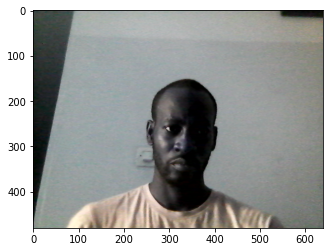

In [60]:
plt.imshow(frame)

# 3.Draw keypoints

In [49]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

# 4.Draw Edges

In [53]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [55]:
def draw_connections(frame, keypoints, edges, confidence_threshold):# draw (dessiner connexions)
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

In [ ]:
frame

In [ ]:
plt.imshow(frame)

In [ ]:
cap = cv2.VideoCapture(r"C:\v_data\novak.mp4')# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('novak.mp4')# establish connection
while cap.isOpened():
    ret, frame = cap.read() # return value(ret) frame ( is the image you want)
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 384,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cv2.namedWindow("lll")
cap = cv2.VideoCapture(1)
while( cap.isOpened() ) :
    ret,img = cap.read()
    cv2.imshow("lll",img)
    k = cv2.waitKey(10)
    if k == 12:
        break

In [ ]:
 #Function to loop through each person detected and render
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [ ]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

In [ ]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)